<a href="https://colab.research.google.com/github/priciliaaudy/Leukemia-prediction-code/blob/main/leukemia_asr_incidence_and_mortality_prediction_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LEUKEMIA PROJECT**

---




In [ ]:
import pandas as pd
import numpy as np
import random
import sklearn

np.random.seed(0)

#import data
leukemia_dataset = pd.read_csv("/content/leukemiadata.csv")
print(leukemia_dataset)

     Cancer id Cancer label  Population code (ISO/UN)   Population Code  \
0           36    Leukaemia                         4  Afghanistan  AFG   
1           36    Leukaemia                         8      Albania  ALB   
2           36    Leukaemia                        12      Algeria  DZA   
3           36    Leukaemia                        24       Angola  AGO   
4           36    Leukaemia                        32    Argentina  ARG   
..         ...          ...                       ...          ...  ...   
180         36    Leukaemia                       862    Venezuela  VEN   
181         36    Leukaemia                       704     Viet Nam  VNM   
182         36    Leukaemia                       887        Yemen  YEM   
183         36    Leukaemia                       894       Zambia  ZMB   
184         36    Leukaemia                       716     Zimbabwe  ZWE   

     ASR.inc  ASR.mort  HDI.Level  Health.Exp   GDP  Household.Pollution  \
0       2.66      1.53 

In [ ]:
#DEFINE DATA
leukemia = leukemia_dataset.iloc[:,5:16]
leukemia.head()

ASR.inc  ASR.mort  HDI.Level  Health.Exp   GDP  Household.Pollution  \
0     2.66      1.53        1.0       21.83   NaN                 35.4   
1     5.12      0.73        3.0        7.27  4.86                 83.7   
2     2.60      0.87        3.0        5.53  3.20                 99.7   
3     0.94      0.48        2.0        2.96  3.05                 50.0   
4     3.84      1.41        4.0        9.71  4.96                 99.9   

   overweight.age.below.five  not.using.safe.water  Stunting  \
0                        3.7            28776116.0      33.1   
1                        NaN              831774.9       8.3   
2                       11.9            13202477.0       8.6   
3                        3.9                   NaN      43.6   
4                       12.6                   NaN       9.5   

   overweight.age.five.to.nineteen      UV  
0                         8.462432  4132.0  
1                        75.226262  2542.0  
2                        15.259528  3253.0  
3                        44.370919  5287.0  
4                        20.272213  3476.0

In [ ]:
#CHECK DATA TYPES
leukemia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ASR.inc                          185 non-null    float64
 1   ASR.mort                         185 non-null    float64
 2   HDI.Level                        162 non-null    float64
 3   Health.Exp                       159 non-null    float64
 4   GDP                              171 non-null    float64
 5   Household.Pollution              170 non-null    float64
 6   overweight.age.below.five        152 non-null    float64
 7   not.using.safe.water             121 non-null    float64
 8   Stunting                         136 non-null    float64
 9   overweight.age.five.to.nineteen  161 non-null    float64
 10  UV                               157 non-null    float64
dtypes: float64(11)
memory usage: 16.0 KB


In [ ]:
print(leukemia.describe())

          ASR.inc    ASR.mort   HDI.Level  Health.Exp         GDP  \
count  185.000000  185.000000  162.000000  159.000000  171.000000   
mean     3.214108    0.948324    2.648148    7.011321    4.307895   
std      1.790502    0.736326    1.197680    3.220566    6.653209   
min      0.000000    0.000000    0.000000    0.000000  -29.100000   
25%      1.730000    0.470000    2.000000    4.640000    2.440000   
50%      3.480000    0.750000    3.000000    6.800000    3.930000   
75%      4.610000    1.340000    4.000000    9.165000    5.720000   
max      7.880000    3.610000    4.000000   21.830000   63.370000   

       Household.Pollution  overweight.age.below.five  not.using.safe.water  \
count           170.000000                 152.000000          1.210000e+02   
mean             67.003824                   6.663816          2.040640e+07   
std              37.859405                   4.260547          3.488055e+07   
min               0.000000                   0.800000         

**DATA PRE-PROCESSING**

---





**1. Missing Values Detection and Handling**


In [ ]:
#number of missing values
leukemia.isnull().sum()

ASR.inc                             0
ASR.mort                            0
HDI.Level                          23
Health.Exp                         26
GDP                                14
Household.Pollution                15
overweight.age.below.five          33
not.using.safe.water               64
Stunting                           49
overweight.age.five.to.nineteen    24
UV                                 28
dtype: int64

<Axes: >

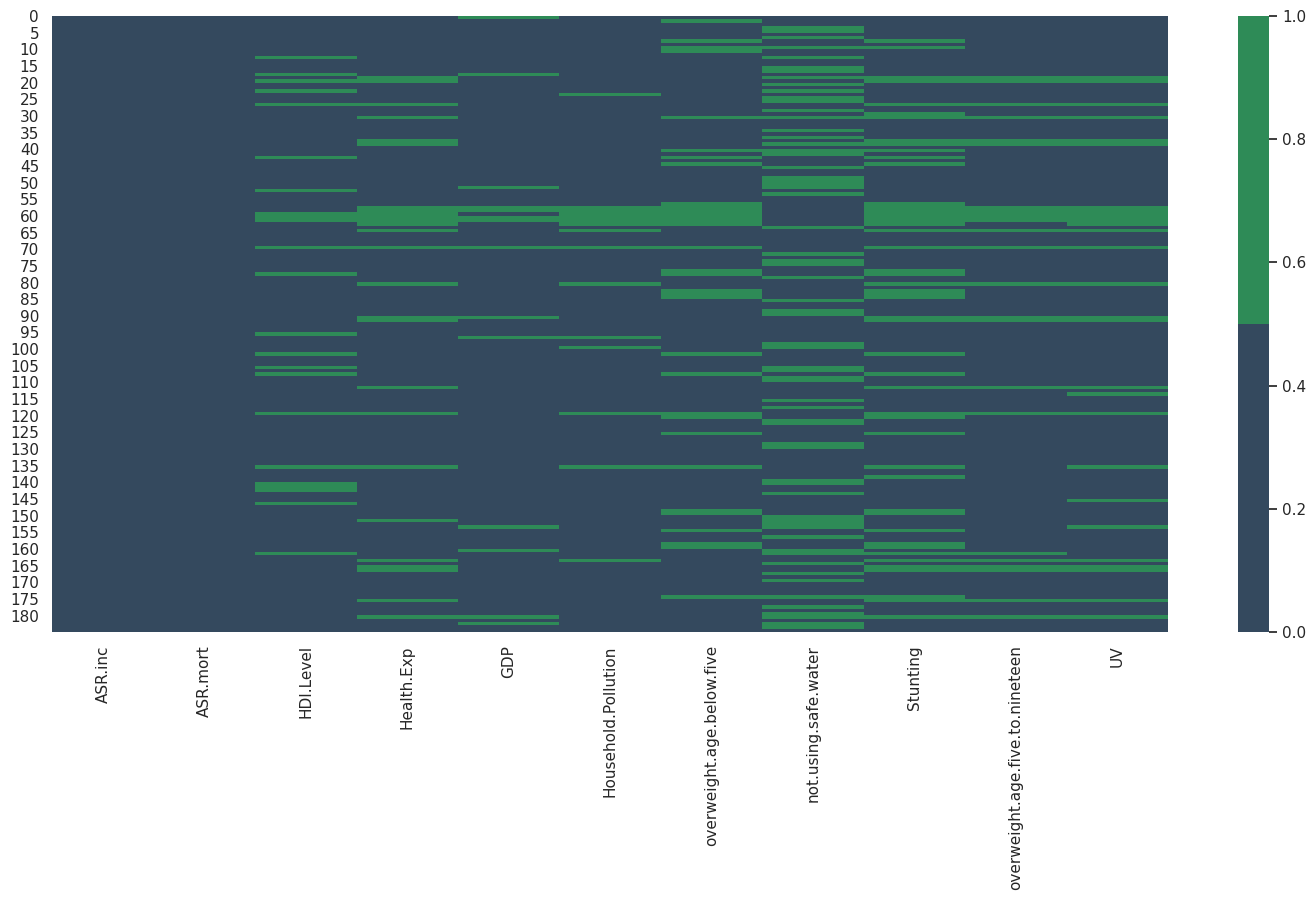

In [ ]:
#plot to visualize missing values
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,8))
colours = ['#34495E', 'seagreen']
sns.heatmap(leukemia.isnull(), cmap=sns.color_palette(colours))

In [ ]:
#!pip install missingno
#import missingno as msno
#msno.matrix(leukemia, figsize=(10,5), fontsize=12, color=(0.375, 0.38, 0.45));

In [ ]:
#msno.heatmap(leukemia, figsize=(10,5), fontsize=12);

In [ ]:
#msno.dendrogram(leukemia)

In [ ]:
#replace missing values with mean
leukemia.fillna(leukemia.mean(), inplace = True)
print(leukemia)

     ASR.inc  ASR.mort  HDI.Level  Health.Exp       GDP  Household.Pollution  \
0       2.66      1.53        1.0   21.830000  4.307895                 35.4   
1       5.12      0.73        3.0    7.270000  4.860000                 83.7   
2       2.60      0.87        3.0    5.530000  3.200000                 99.7   
3       0.94      0.48        2.0    2.960000  3.050000                 50.0   
4       3.84      1.41        4.0    9.710000  4.960000                 99.9   
..       ...       ...        ...         ...       ...                  ...   
180     4.27      1.96        2.0    7.011321  4.307895                 95.5   
181     5.57      2.44        3.0    4.590000  8.020000                 96.1   
182     2.09      1.23        1.0    0.000000  4.307895                 61.3   
183     1.10      0.54        2.0    6.620000  5.250000                 10.2   
184     1.33      0.77        2.0    2.790000  6.520000                 30.3   

     overweight.age.below.five  not.usi

In [ ]:
#replace missing values with median
#leukemia.fillna(leukemia.median(), inplace = True)
#print(leukemia)

In [ ]:
#recheck
leukemia.isnull().sum()

ASR.inc                            0
ASR.mort                           0
HDI.Level                          0
Health.Exp                         0
GDP                                0
Household.Pollution                0
overweight.age.below.five          0
not.using.safe.water               0
Stunting                           0
overweight.age.five.to.nineteen    0
UV                                 0
dtype: int64

**2. Outlier Detection and Handling**

<Axes: >

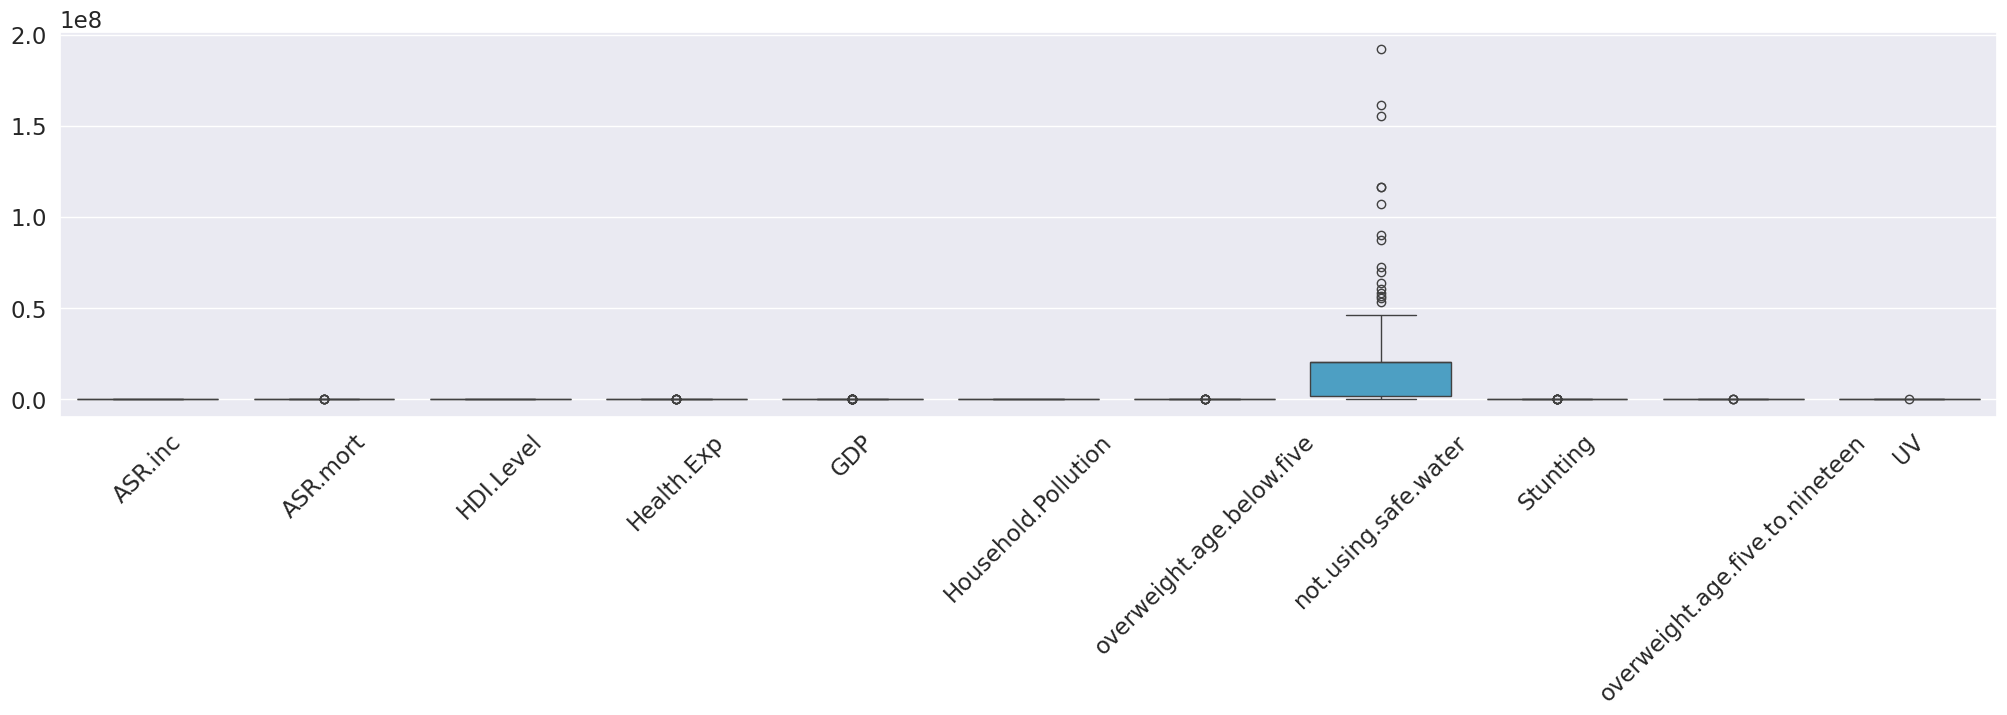

In [ ]:
#outlier detection
sns.set_theme(rc={'figure.figsize':(25,5)})
sns.set(font_scale=1.5)
plt.xticks(rotation=45)
sns.boxplot(leukemia)

In [ ]:
#outlier handling
print("Old Shape: ", leukemia.shape)

#1) HDI Level
##using IQR
Q1_hdi = leukemia['HDI.Level'].quantile(0.25)
Q3_hdi = leukemia['HDI.Level'].quantile(0.75)
IQR_hdi = Q3_hdi - Q1_hdi
lower_hdi = Q1_hdi - 1.5*IQR_hdi
upper_hdi = Q3_hdi + 1.5*IQR_hdi
##Create arrays of Boolean values indicating the outlier rows
upper_array_hdi = np.where(leukemia['HDI.Level'] >= upper_hdi)[0]
lower_array_hdi = np.where(leukemia['HDI.Level'] <= lower_hdi)[0]
##Removing the outliers
leukemia.drop(index=leukemia.index[upper_array_hdi], inplace=True)
leukemia.drop(index=leukemia.index[lower_array_hdi], inplace=True)

#2) Health Expenditure
##using IQR
Q1_healthexp = leukemia['Health.Exp'].quantile(0.25)
Q3_healthexp = leukemia['Health.Exp'].quantile(0.75)
IQR_healthexp = Q3_healthexp - Q1_healthexp
lower_healthexp = Q1_healthexp - 1.5*IQR_healthexp
upper_healthexp = Q3_healthexp + 1.5*IQR_healthexp
##Create arrays of Boolean values indicating the outlier rows
upper_array_healthexp = np.where(leukemia['Health.Exp'] >= upper_healthexp)[0]
lower_array_healthexp = np.where(leukemia['Health.Exp'] <= lower_healthexp)[0]
##Removing the outliers
leukemia.drop(index=leukemia.index[upper_array_healthexp], inplace=True)
leukemia.drop(index=leukemia.index[lower_array_healthexp], inplace=True)

#3) GDP
##using IQR
Q1_gdp = leukemia['GDP'].quantile(0.25)
Q3_gdp = leukemia['GDP'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp
lower_gdp = Q1_gdp - 1.5*IQR_gdp
upper_gdp = Q3_gdp + 1.5*IQR_gdp
##Create arrays of Boolean values indicating the outlier rows
upper_array_gdp = np.where(leukemia['GDP'] >= upper_gdp)[0]
lower_array_gdp = np.where(leukemia['GDP'] <= lower_gdp)[0]
##Removing the outliers
leukemia.drop(index=leukemia.index[upper_array_gdp], inplace=True)
leukemia.drop(index=leukemia.index[lower_array_gdp], inplace=True)

#4) Overweight Age Below 5
##using IQR
Q1_oab5 = leukemia['overweight.age.below.five'].quantile(0.25)
Q3_oab5 = leukemia['overweight.age.below.five'].quantile(0.75)
IQR_oab5 = Q3_oab5 - Q1_oab5
lower_oab5 = Q1_oab5 - 1.5*IQR_oab5
upper_oab5 = Q3_oab5 + 1.5*IQR_oab5
##Create arrays of Boolean values indicating the outlier rows
upper_array_oab5 = np.where(leukemia['overweight.age.below.five'] >= upper_oab5)[0]
lower_array_oab5 = np.where(leukemia['overweight.age.below.five'] <= lower_oab5)[0]
##Removing the outliers
leukemia.drop(index=leukemia.index[upper_array_oab5], inplace=True)
leukemia.drop(index=leukemia.index[lower_array_oab5], inplace=True)

#5) Not using safe water
##using IQR
Q1_nusw = leukemia['not.using.safe.water'].quantile(0.25)
Q3_nusw = leukemia['not.using.safe.water'].quantile(0.75)
IQR_nusw = Q3_nusw - Q1_nusw
lower_nusw = Q1_nusw - 1.5*IQR_nusw
upper_nusw = Q3_nusw + 1.5*IQR_nusw
##Create arrays of Boolean values indicating the outlier rows
upper_array_nusw = np.where(leukemia['not.using.safe.water'] >= upper_nusw)[0]
lower_array_nusw = np.where(leukemia['not.using.safe.water'] <= lower_nusw)[0]
##Removing the outliers
leukemia.drop(index=leukemia.index[upper_array_nusw], inplace=True)
leukemia.drop(index=leukemia.index[lower_array_nusw], inplace=True)

#6) Stunting
##using IQR
Q1_stunting = leukemia['Stunting'].quantile(0.25)
Q3_stunting = leukemia['Stunting'].quantile(0.75)
IQR_stunting = Q3_stunting - Q1_stunting
lower_stunting = Q1_stunting - 1.5*IQR_stunting
upper_stunting = Q3_stunting + 1.5*IQR_stunting
##Create arrays of Boolean values indicating the outlier rows
upper_array_stunting = np.where(leukemia['Stunting'] >= upper_stunting)[0]
lower_array_stunting = np.where(leukemia['Stunting'] <= lower_stunting)[0]
##Removing the outliers
leukemia.drop(index=leukemia.index[upper_array_stunting], inplace=True)
leukemia.drop(index=leukemia.index[lower_array_stunting], inplace=True)

#7) Overweight Age Five to Nineteen
##using IQR
Q1_oa5t9 = leukemia['overweight.age.five.to.nineteen'].quantile(0.25)
Q3_oa5t9 = leukemia['overweight.age.five.to.nineteen'].quantile(0.75)
IQR_oa5t9 = Q3_oa5t9 - Q1_oa5t9
lower_oa5t9 = Q1_oa5t9 - 1.5*IQR_oa5t9
upper_oa5t9 = Q3_oa5t9 + 1.5*IQR_oa5t9
##Create arrays of Boolean values indicating the outlier rows
upper_array_oa5t9 = np.where(leukemia['overweight.age.five.to.nineteen'] >= upper_oa5t9)[0]
lower_array_oa5t9 = np.where(leukemia['overweight.age.five.to.nineteen'] <= lower_oa5t9)[0]
##Removing the outliers
leukemia.drop(index=leukemia.index[upper_array_oa5t9], inplace=True)
leukemia.drop(index=leukemia.index[lower_array_oa5t9], inplace=True)

#7) UV
##using IQR
Q1_uv = leukemia['UV'].quantile(0.25)
Q3_uv = leukemia['UV'].quantile(0.75)
IQR_uv = Q3_uv - Q1_uv
lower_uv = Q1_uv - 1.5*IQR_uv
upper_uv = Q3_uv + 1.5*IQR_uv
##Create arrays of Boolean values indicating the outlier rows
upper_array_uv = np.where(leukemia['UV'] >= upper_uv)[0]
lower_array_uv = np.where(leukemia['UV'] <= lower_uv)[0]
##Removing the outliers
leukemia.drop(index=leukemia.index[upper_array_uv], inplace=True)
leukemia.drop(index=leukemia.index[lower_array_uv], inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", leukemia.shape)

Old Shape:  (170, 11)
New Shape:  (131, 11)


<Axes: >

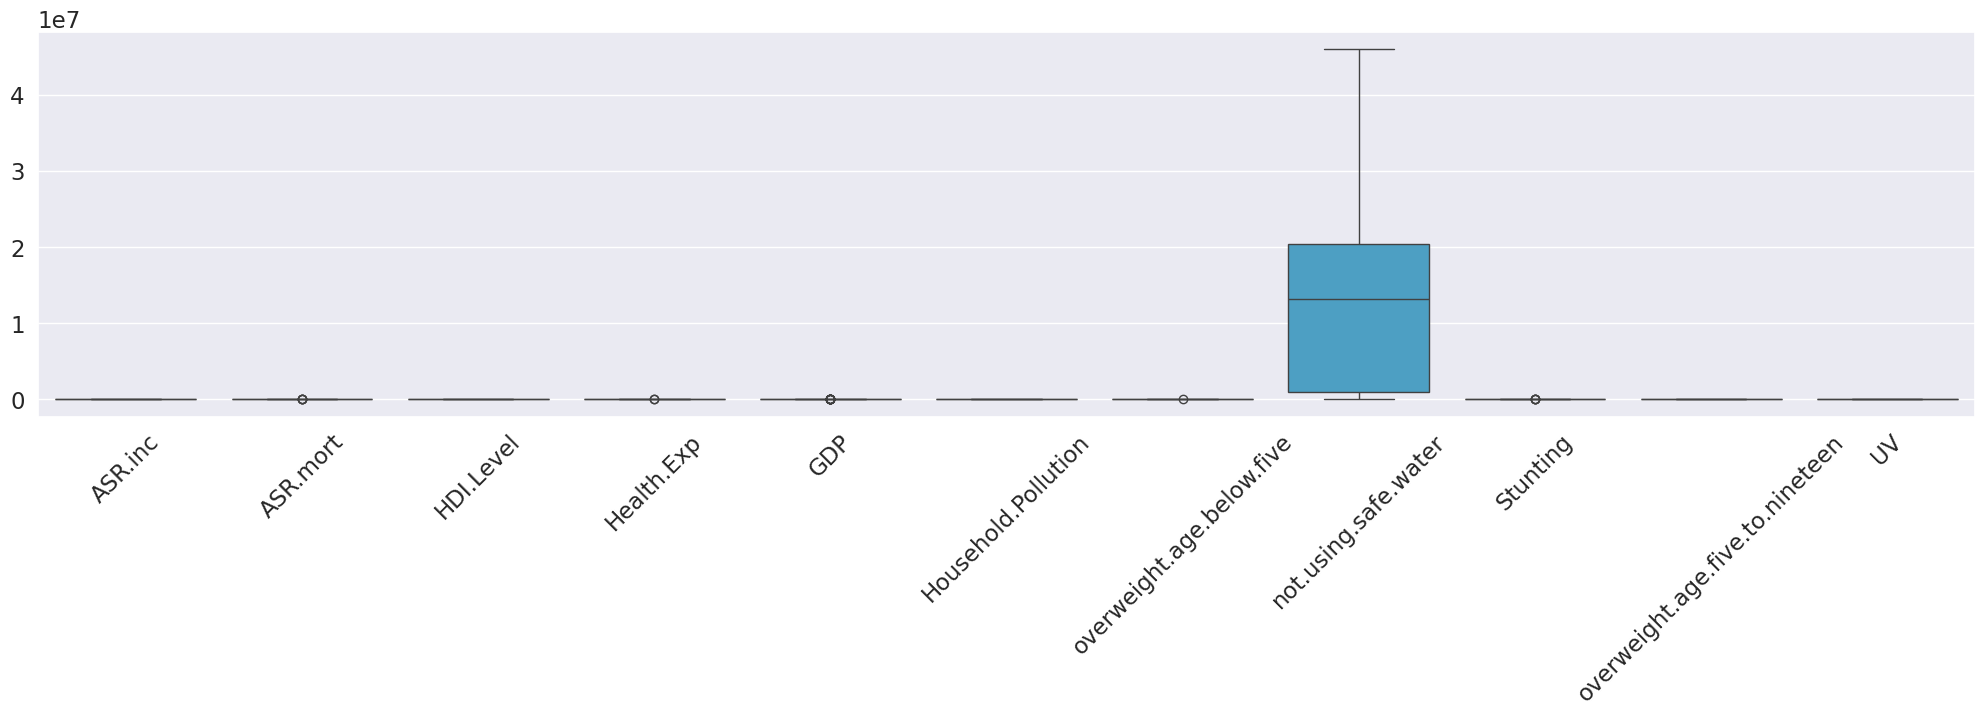

In [ ]:
sns.set_theme(rc={'figure.figsize':(25,5)})
sns.set(font_scale=1.5)
plt.xticks(rotation=45)
sns.boxplot(leukemia)

**3. Feature Selection**

In [ ]:
#based on correlation
##generating correlation matrix
leukemia_corr = leukemia.corr()
leukemia_corr.head()

ASR.inc  ASR.mort  HDI.Level  Health.Exp       GDP  \
ASR.inc     1.000000  0.478579   0.558180    0.369236  0.000091   
ASR.mort    0.478579  1.000000  -0.000667   -0.074200  0.091774   
HDI.Level   0.558180 -0.000667   1.000000    0.441959 -0.014026   
Health.Exp  0.369236 -0.074200   0.441959    1.000000 -0.055001   
GDP         0.000091  0.091774  -0.014026   -0.055001  1.000000   

            Household.Pollution  overweight.age.below.five  \
ASR.inc                0.628346                   0.348385   
ASR.mort               0.156526                   0.155903   
HDI.Level              0.761415                   0.420735   
Health.Exp             0.370520                   0.232252   
GDP                    0.036264                  -0.116593   

            not.using.safe.water  Stunting  overweight.age.five.to.nineteen  \
ASR.inc                -0.208945 -0.423075                        -0.158003   
ASR.mort               -0.016389 -0.124308                        -0.201174   
HDI.Level              -0.286682 -0.596856                         0.028056   
Health.Exp             -0.266661 -0.341265                         0.003823   
GDP                     0.036320  0.036717                        -0.074174   

                  UV  
ASR.inc    -0.337917  
ASR.mort    0.234783  
HDI.Level  -0.541554  
Health.Exp -0.504914  
GDP         0.160469

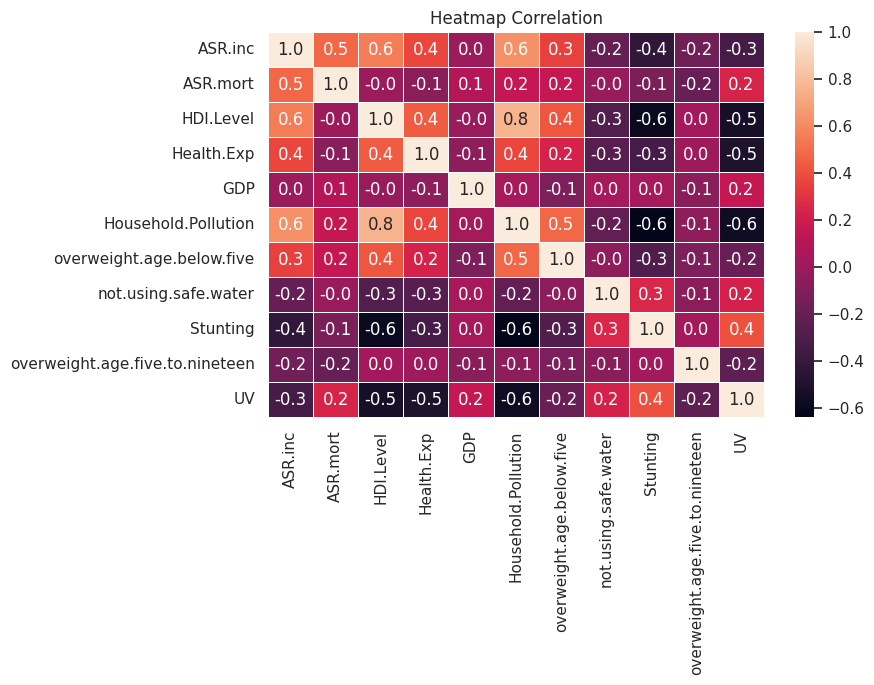

In [ ]:
#the correlation heatmap
sns.set_theme(rc={'figure.figsize':(8,5)})
sns.heatmap(leukemia_corr, annot=True, linewidths=.5, fmt= '.1f')
plt.title('Heatmap Correlation')
plt.show()

In [ ]:
#compare the correlation between features and remove correlation yg >= 0.9
columns = np.full((leukemia_corr.shape[0],), True, dtype=bool)
for i in range(leukemia_corr.shape[0]):
    for j in range(i+1, leukemia_corr.shape[0]):
        if leukemia_corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [ ]:
selected_columns = leukemia.columns[columns]
selected_columns.shape

(11,)

In [ ]:
leukemia1 = leukemia[selected_columns]
leukemia1.head()

##the dataset has only those columns with correlation less than 0.9

ASR.inc  ASR.mort  HDI.Level  Health.Exp   GDP  Household.Pollution  \
1     5.12      0.73        3.0        7.27  4.86                 83.7   
2     2.60      0.87        3.0        5.53  3.20                 99.7   
4     3.84      1.41        4.0        9.71  4.96                 99.9   
7     4.93      0.62        4.0       12.10  4.81                100.0   
8     5.99      1.99        3.0        4.70  4.62                 98.3   

   overweight.age.below.five  not.using.safe.water   Stunting  \
1                   6.663816          8.317749e+05   8.300000   
2                  11.900000          1.320248e+07   8.600000   
4                  12.600000          2.040640e+07   9.500000   
7                   6.663816          9.866439e+04  17.552941   
8                  10.100000          2.940481e+06  13.300000   

   overweight.age.five.to.nineteen      UV  
1                        75.226262  2542.0  
2                        15.259528  3253.0  
4                        20.272213  3476.0  
7                        10.566571  1888.0  
8                        86.074397  2702.0

In [ ]:
result = pd.DataFrame()
result['ASR.inc'] = leukemia1.iloc[:,0]
result['ASR.mort'] = leukemia1.iloc[:,1]
leukemia1.head()

ASR.inc  ASR.mort  HDI.Level  Health.Exp   GDP  Household.Pollution  \
1     5.12      0.73        3.0        7.27  4.86                 83.7   
2     2.60      0.87        3.0        5.53  3.20                 99.7   
4     3.84      1.41        4.0        9.71  4.96                 99.9   
7     4.93      0.62        4.0       12.10  4.81                100.0   
8     5.99      1.99        3.0        4.70  4.62                 98.3   

   overweight.age.below.five  not.using.safe.water   Stunting  \
1                   6.663816          8.317749e+05   8.300000   
2                  11.900000          1.320248e+07   8.600000   
4                  12.600000          2.040640e+07   9.500000   
7                   6.663816          9.866439e+04  17.552941   
8                  10.100000          2.940481e+06  13.300000   

   overweight.age.five.to.nineteen      UV  
1                        75.226262  2542.0  
2                        15.259528  3253.0  
4                        20.272213  3476.0  
7                        10.566571  1888.0  
8                        86.074397  2702.0

In [ ]:
#using p-value
from scipy.stats import pearsonr
sns.set_theme(rc={'figure.figsize':(10,8)})
#H0: there is no linear correlation between the two variables.
#Ha: there is a linear correlation between the two variables.
##if p-value < 0.05, reject the null hypothesis

In [ ]:
#ASR Incidence vs ASR Mortality
pearsonr(leukemia['ASR.mort'],leukemia['ASR.inc'])
#reject the null hypothesis
#there is a significant linear correlation between the two variables.

PearsonRResult(statistic=0.47857864664916705, pvalue=7.3954579053646854e-09)

<Axes: xlabel='ASR.mort', ylabel='ASR.inc'>

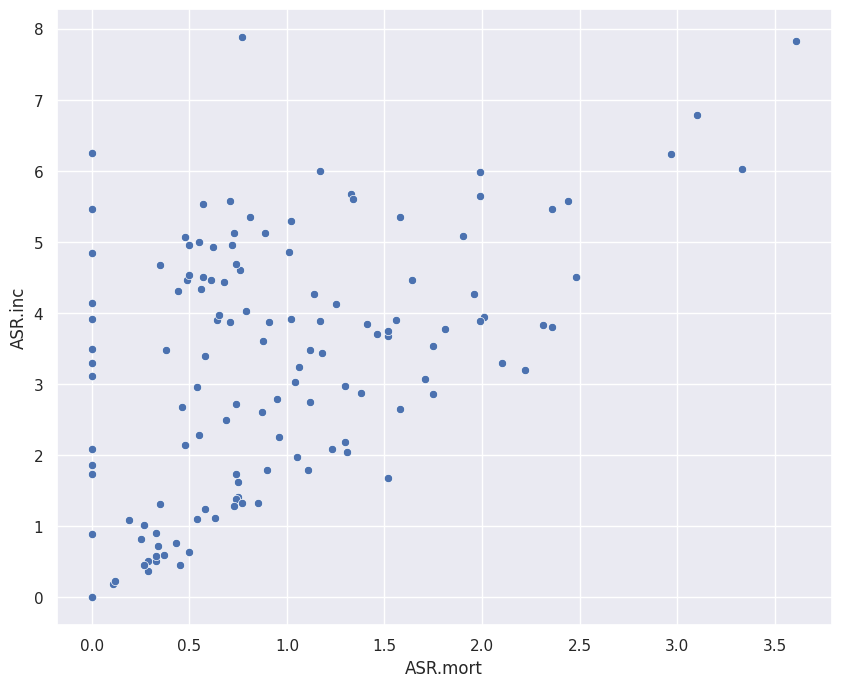

In [ ]:
import seaborn as sns
sns.scatterplot(x=leukemia['ASR.mort'], y=leukemia['ASR.inc'], data=leukemia)

In [ ]:
#ASR Incidence vs HDI Level
pearsonr(leukemia['HDI.Level'],leukemia['ASR.inc'])
#reject the null hypothesis
#there is a significant linear correlation between the two variables.

PearsonRResult(statistic=0.5581798940508955, pvalue=4.3067881991071e-12)

<Axes: xlabel='HDI.Level', ylabel='ASR.inc'>

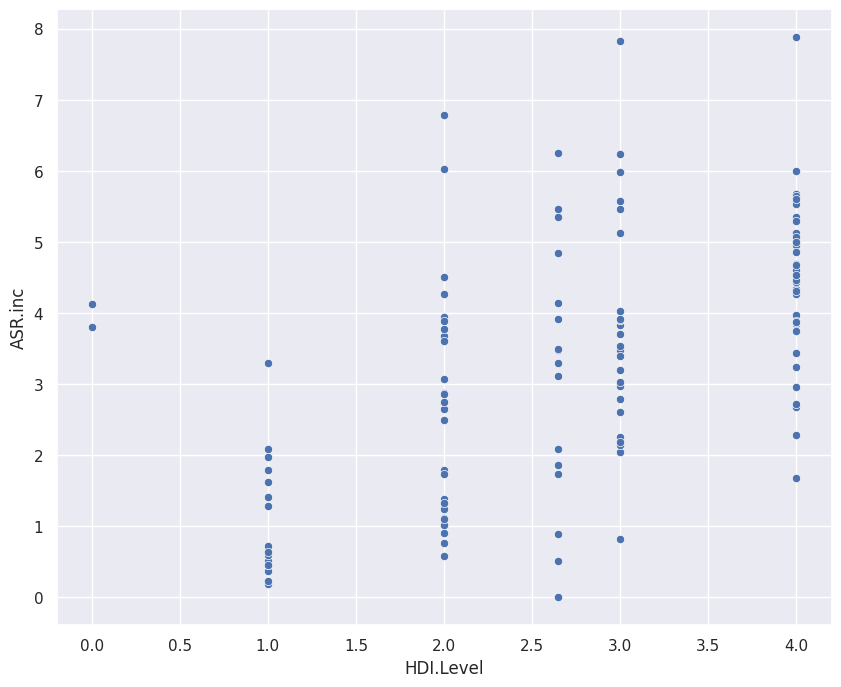

In [ ]:
sns.scatterplot(x=leukemia['HDI.Level'], y=leukemia['ASR.inc'], data=leukemia)

In [ ]:
#ASR Incidence vs Health Exp
pearsonr(leukemia['Health.Exp'],leukemia['ASR.inc'])
#reject the null hypothesis
#there is a significant linear correlation between the two variables.

PearsonRResult(statistic=0.36923627186514757, pvalue=1.4249867860694008e-05)

<Axes: xlabel='Health.Exp', ylabel='ASR.inc'>

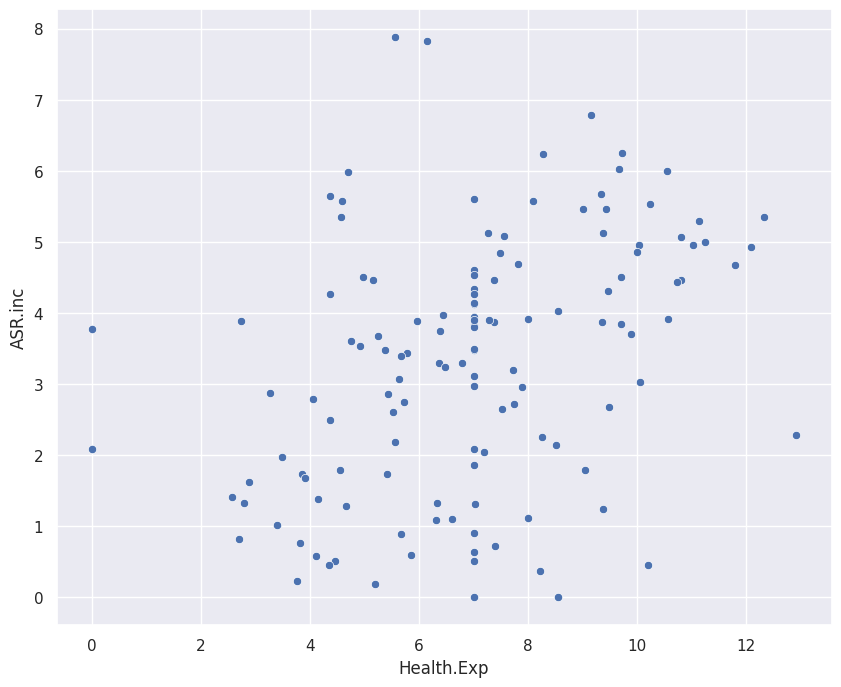

In [ ]:
sns.scatterplot(x=leukemia['Health.Exp'], y=leukemia['ASR.inc'], data=leukemia)

In [ ]:
#ASR Incidence vs GDP
pearsonr(leukemia['GDP'],leukemia['ASR.inc'])
#can't reject the null hypothesis
#there is no significant linear correlation between the two variables.

PearsonRResult(statistic=9.121353115663054e-05, pvalue=0.9991750028247715)

<Axes: xlabel='GDP', ylabel='ASR.inc'>

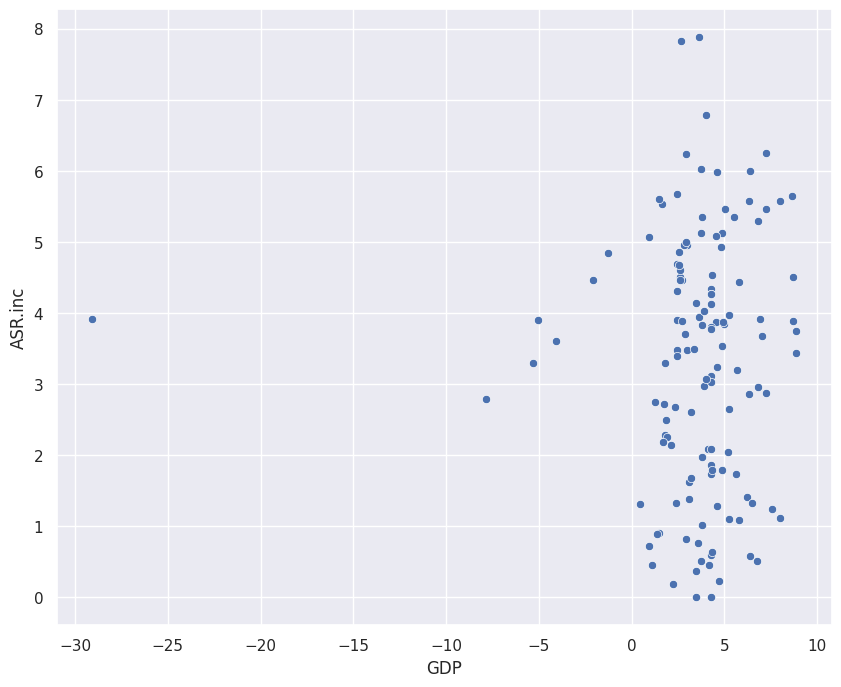

In [ ]:
sns.scatterplot(x=leukemia['GDP'], y=leukemia['ASR.inc'], data=leukemia)

In [ ]:
#ASR Incidence vs Overweight Age Below Five
pearsonr(leukemia['overweight.age.below.five'],leukemia['ASR.inc'])
#reject the null hypothesis
#there is a significant linear correlation between the two variables.

PearsonRResult(statistic=0.3483845251172072, pvalue=4.547761646263412e-05)

<Axes: xlabel='overweight.age.below.five', ylabel='ASR.inc'>

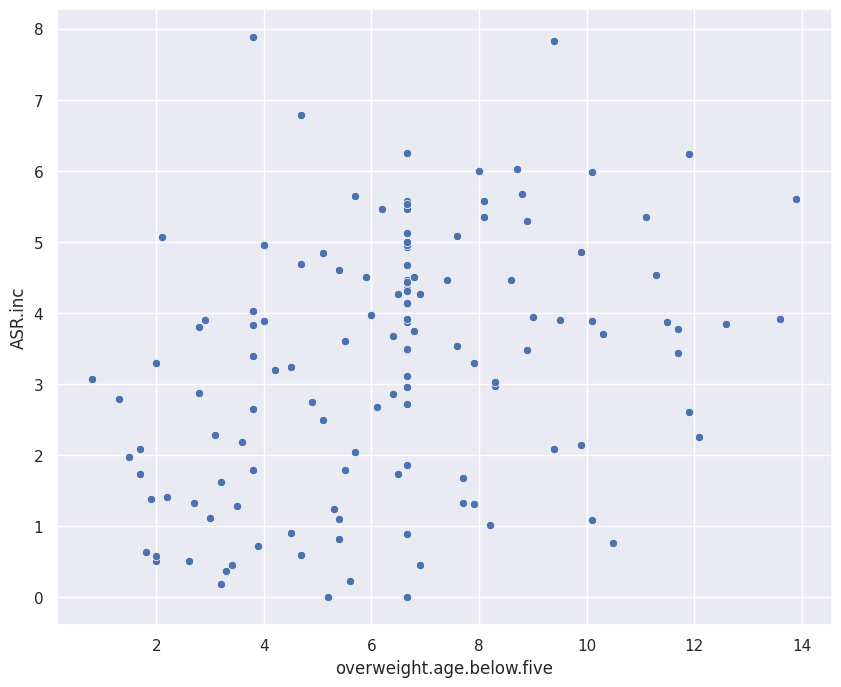

In [ ]:
sns.scatterplot(x=leukemia['overweight.age.below.five'], y=leukemia['ASR.inc'], data=leukemia)

In [ ]:
#ASR Incidence vs Not Using Safe Water
pearsonr(leukemia['not.using.safe.water'],leukemia['ASR.inc'])
#reject the null hypothesis
#there is a significant linear correlation between the two variables.

PearsonRResult(statistic=-0.20894536332223188, pvalue=0.016617302527420556)

<Axes: xlabel='not.using.safe.water', ylabel='ASR.inc'>

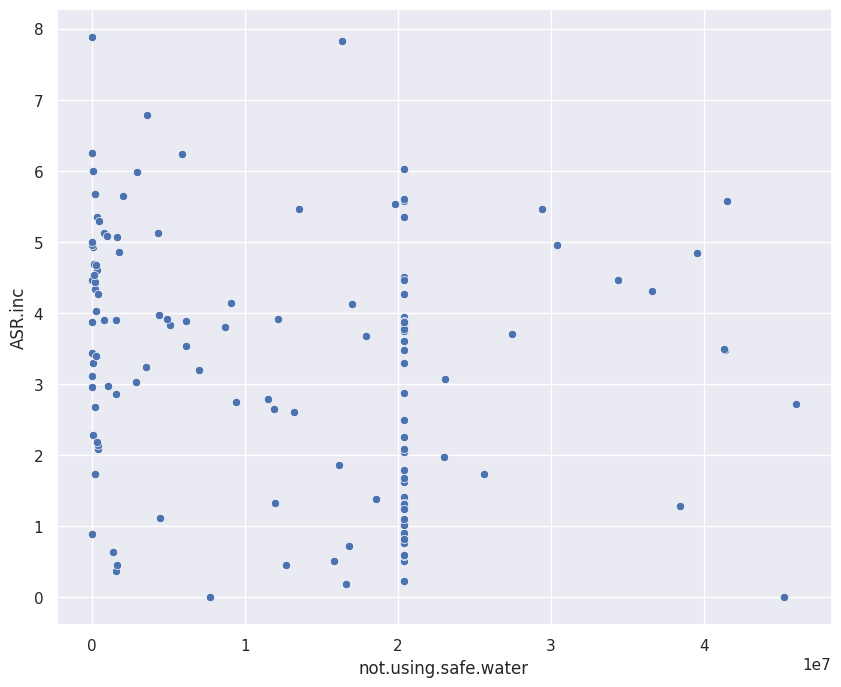

In [ ]:
sns.scatterplot(x=leukemia['not.using.safe.water'], y=leukemia['ASR.inc'], data=leukemia)

In [ ]:
#ASR Incidence vs Stunting
pearsonr(leukemia['Stunting'],leukemia['ASR.inc'])
#reject the null hypothesis
#there is a significant linear correlation between the two variables.

PearsonRResult(statistic=-0.4230753239256176, pvalue=4.793914742141624e-07)

<Axes: xlabel='Stunting', ylabel='ASR.inc'>

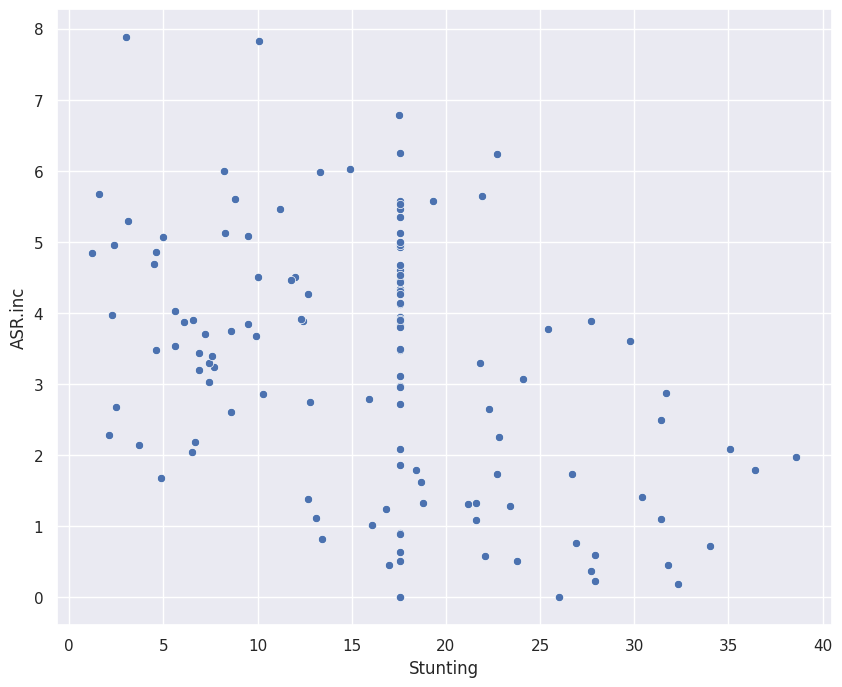

In [ ]:
sns.scatterplot(x=leukemia['Stunting'], y=leukemia['ASR.inc'], data=leukemia)

In [ ]:
#ASR Incidence vs Overweight Age Five to Nineteen
pearsonr(leukemia['overweight.age.five.to.nineteen'],leukemia['ASR.inc'])
#can't reject the null hypothesis
#there is no significant linear correlation between the two variables.

PearsonRResult(statistic=-0.15800325638054494, pvalue=0.07147661294285687)

<Axes: xlabel='overweight.age.five.to.nineteen', ylabel='ASR.inc'>

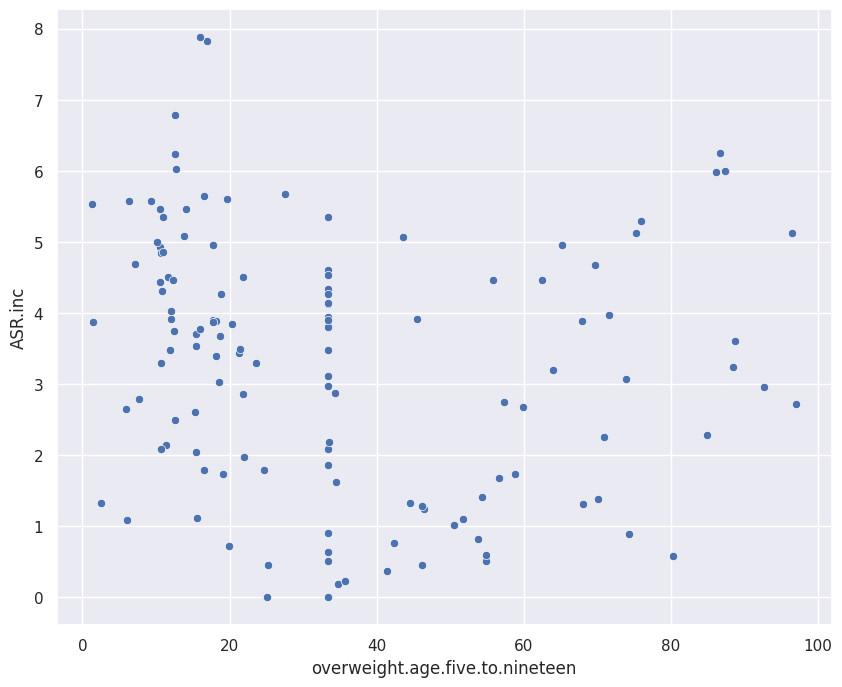

In [ ]:
sns.scatterplot(x=leukemia['overweight.age.five.to.nineteen'], y=leukemia['ASR.inc'], data=leukemia)

In [ ]:
#ASR Incidence vs UV
pearsonr(leukemia['UV'],leukemia['ASR.inc'])
#reject the null hypothesis
#there is a significant linear correlation between the two variables

PearsonRResult(statistic=-0.3379171392233667, pvalue=7.902718940444153e-05)

<Axes: xlabel='UV', ylabel='ASR.inc'>

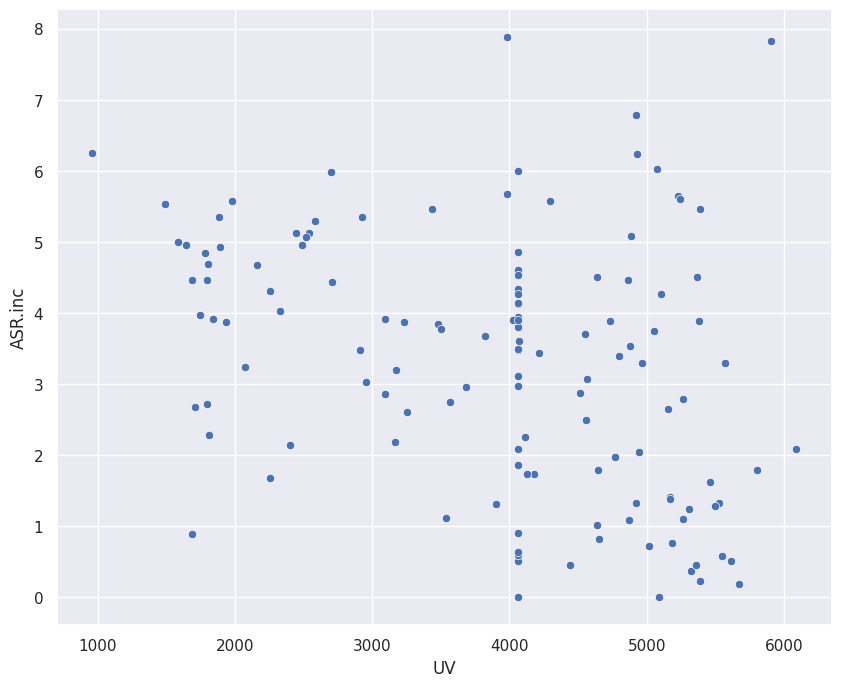

In [ ]:
sns.scatterplot(x=leukemia['UV'], y=leukemia['ASR.inc'], data=leukemia)

In [ ]:
#conclusion: drop GDP, overweight.age.five.to.nineteen to predict the ASR.inc

In [ ]:
#ASR Mortality vs HDI Level
pearsonr(leukemia['HDI.Level'],leukemia['ASR.mort'])
#can't reject the null hypothesis
#there is no significant linear correlation between the two variables.

PearsonRResult(statistic=-0.000666853386014107, pvalue=0.9939685804145615)

<Axes: xlabel='HDI.Level', ylabel='ASR.mort'>

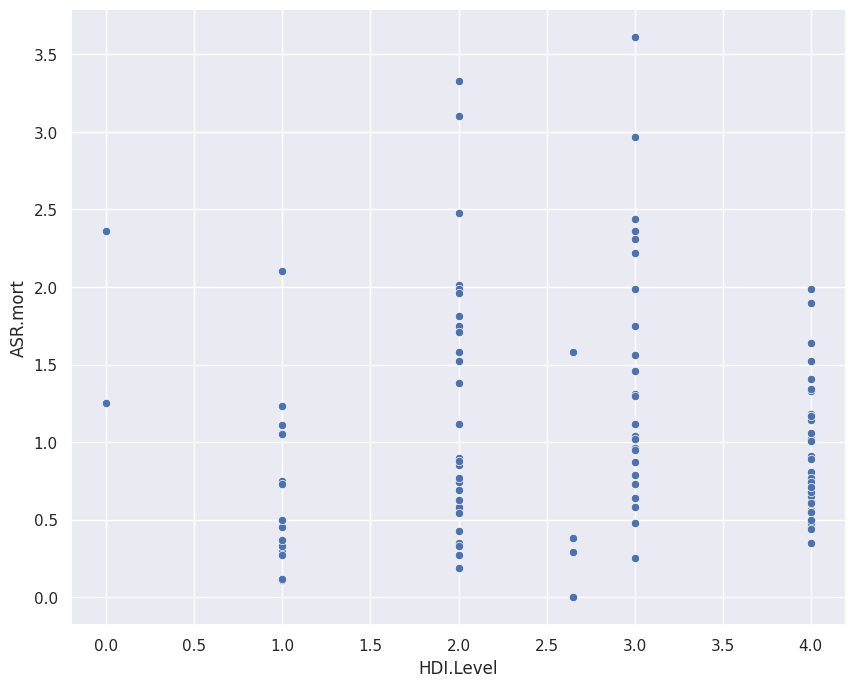

In [ ]:
sns.scatterplot(x=leukemia['HDI.Level'], y=leukemia['ASR.mort'], data=leukemia)

In [ ]:
#ASR Mortality vs Health Exp
pearsonr(leukemia['Health.Exp'],leukemia['ASR.mort'])
#can't reject the null hypothesis
#there is no significant linear correlation between the two variables.

PearsonRResult(statistic=-0.07419954558431806, pvalue=0.39963396830365683)

<Axes: xlabel='Health.Exp', ylabel='ASR.mort'>

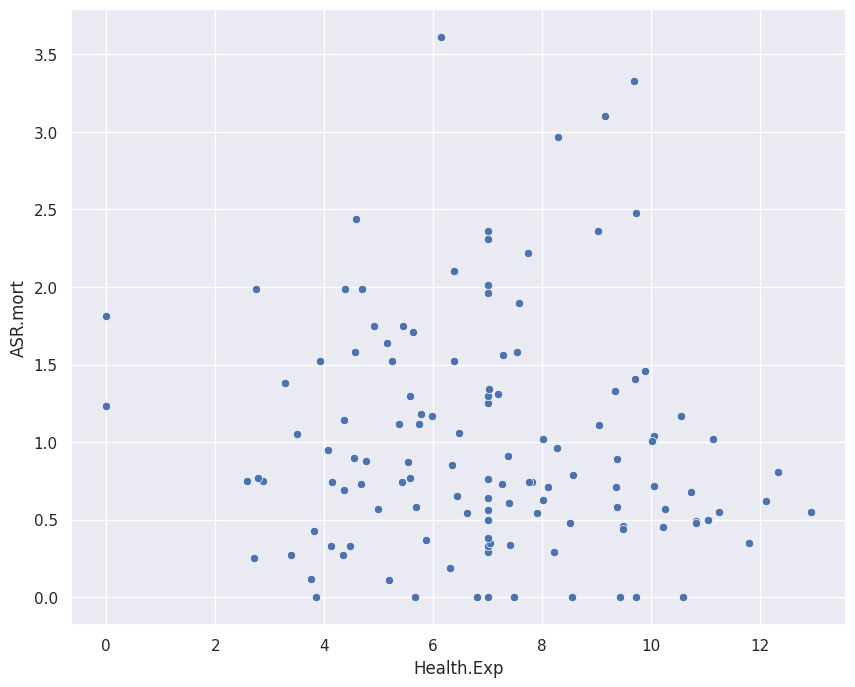

In [ ]:
sns.scatterplot(x=leukemia['Health.Exp'], y=leukemia['ASR.mort'], data=leukemia)

In [ ]:
#ASR Mortality vs GDP
pearsonr(leukemia['GDP'],leukemia['ASR.mort'])
#can't reject the null hypothesis
#there is no significant linear correlation between the two variables.

PearsonRResult(statistic=0.09177361795705997, pvalue=0.29716516694252054)

<Axes: xlabel='GDP', ylabel='ASR.mort'>

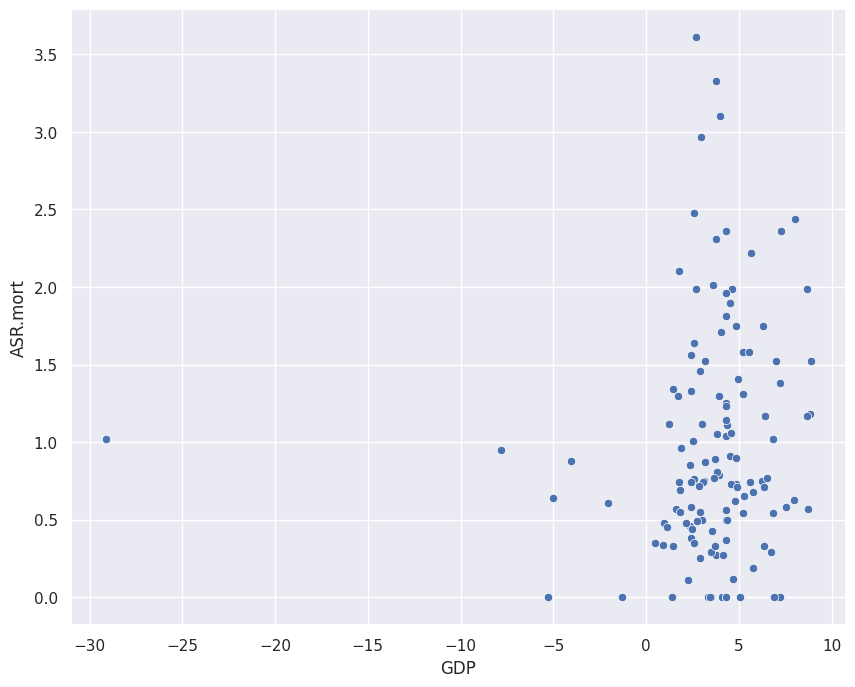

In [ ]:
sns.scatterplot(x=leukemia['GDP'], y=leukemia['ASR.mort'], data=leukemia)

In [ ]:
#ASR Mortality vs Overweight Age Below Five
pearsonr(leukemia['overweight.age.below.five'],leukemia['ASR.mort'])
#can't reject the null hypothesis
#there is no significant linear correlation between the two variables.

PearsonRResult(statistic=0.1559028674059179, pvalue=0.0753746984736947)

<Axes: xlabel='overweight.age.below.five', ylabel='ASR.mort'>

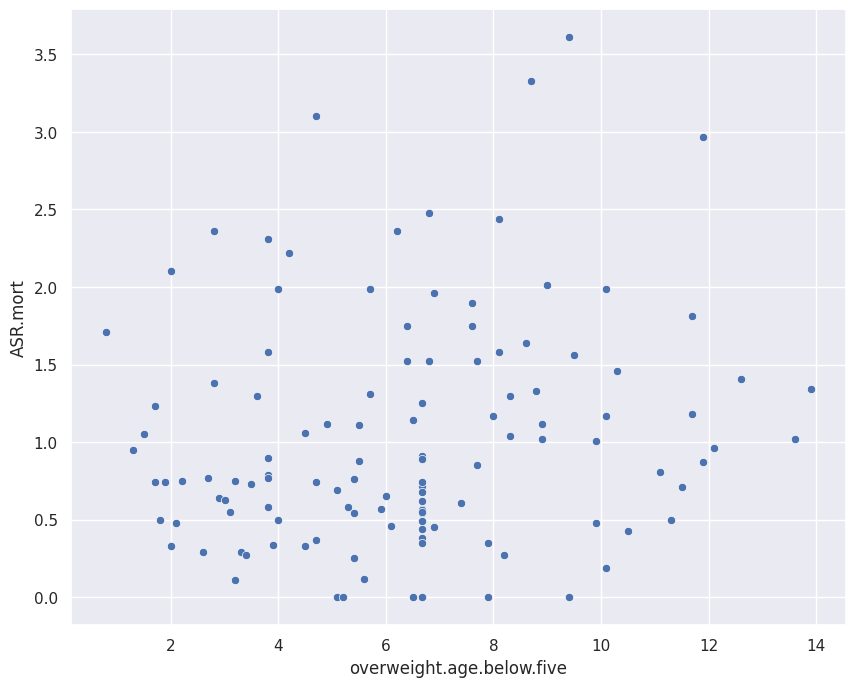

In [ ]:
sns.scatterplot(x=leukemia['overweight.age.below.five'], y=leukemia['ASR.mort'], data=leukemia)

In [ ]:
#ASR Mortality vs Not Using Safe Water
pearsonr(leukemia['not.using.safe.water'],leukemia['ASR.mort'])
#can't reject the null hypothesis
#there is no significant linear correlation between the two variables.

PearsonRResult(statistic=-0.01638864977275603, pvalue=0.8526083628593163)

<Axes: xlabel='not.using.safe.water', ylabel='ASR.mort'>

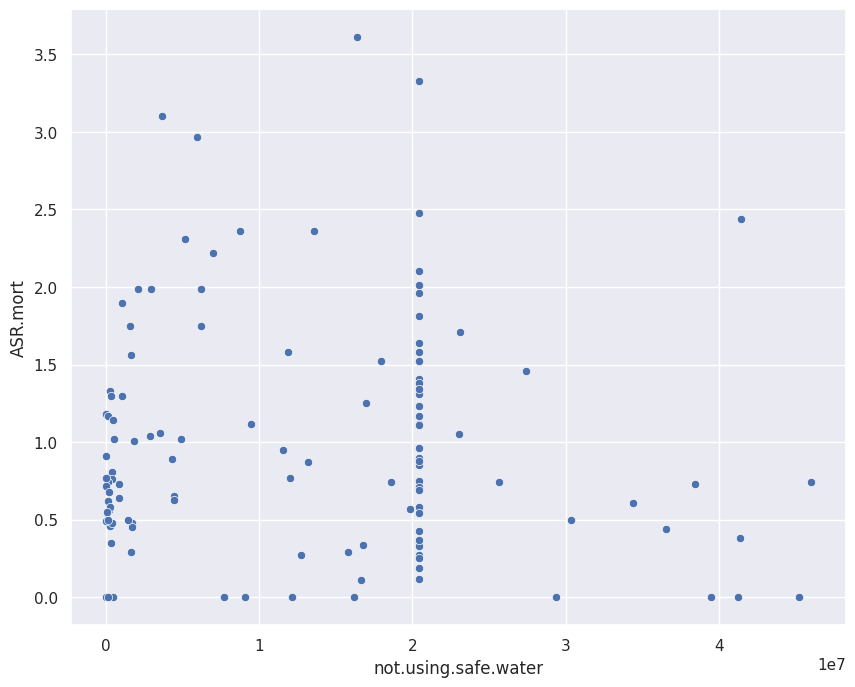

In [ ]:
sns.scatterplot(x=leukemia['not.using.safe.water'], y=leukemia['ASR.mort'], data=leukemia)

In [ ]:
#ASR Mortality vs Stunting
pearsonr(leukemia['Stunting'],leukemia['ASR.mort'])
#can't reject the null hypothesis
#there is no significant linear correlation between the two variables.

PearsonRResult(statistic=-0.12430783525285252, pvalue=0.15717837051306585)

<Axes: xlabel='Stunting', ylabel='ASR.mort'>

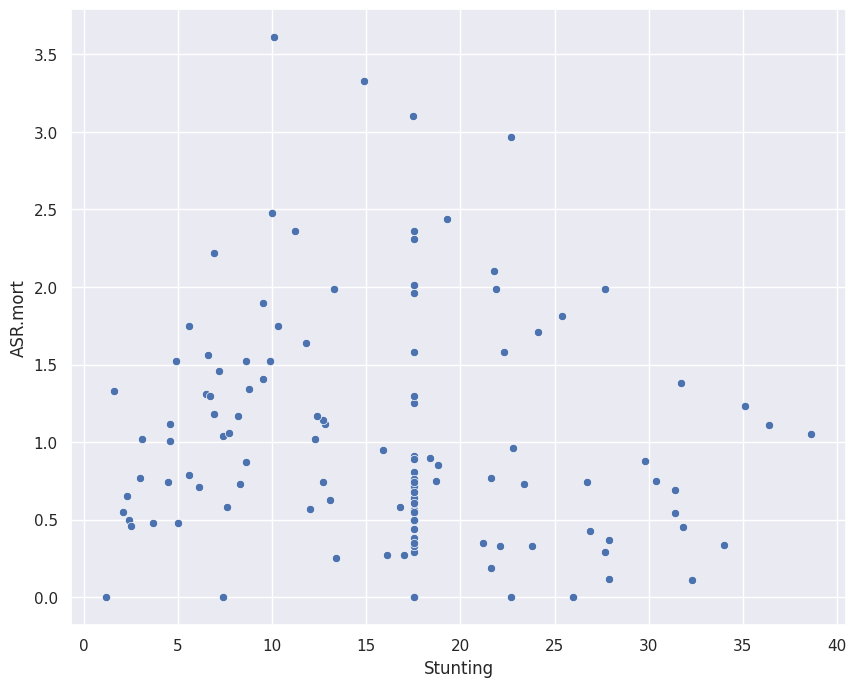

In [ ]:
sns.scatterplot(x=leukemia['Stunting'], y=leukemia['ASR.mort'], data=leukemia)

In [ ]:
#ASR Mortality vs Overweight Age Five to Nineteen
pearsonr(leukemia['overweight.age.five.to.nineteen'],leukemia['ASR.mort'])
#reject the null hypothesis
#there is a significant linear correlation between the two variables.

PearsonRResult(statistic=-0.20117418427966935, pvalue=0.021217900504353026)

<Axes: xlabel='overweight.age.five.to.nineteen', ylabel='ASR.mort'>

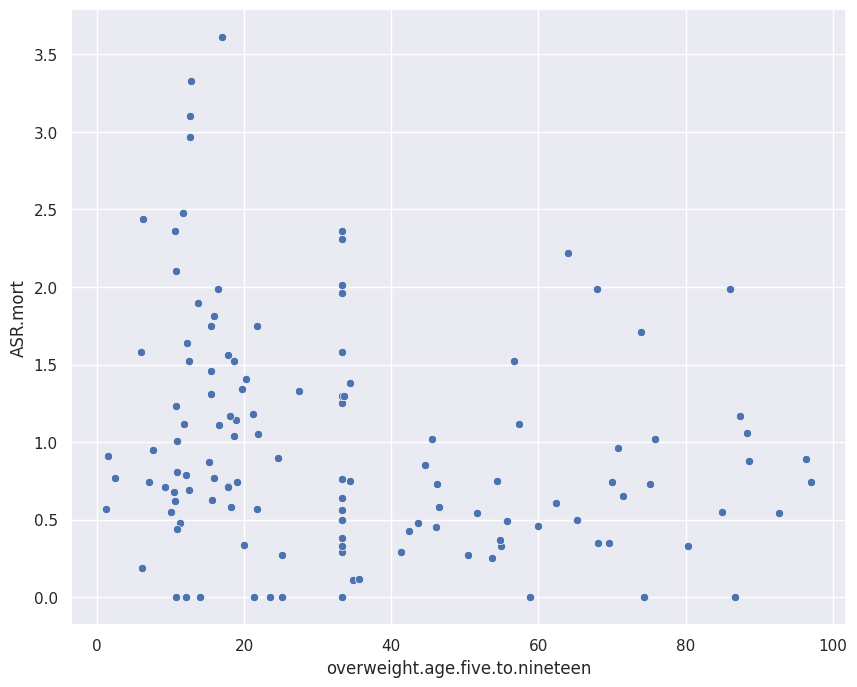

In [ ]:
sns.scatterplot(x=leukemia['overweight.age.five.to.nineteen'], y=leukemia['ASR.mort'], data=leukemia)

In [ ]:
#ASR Mortality vs UV
pearsonr(leukemia['UV'],leukemia['ASR.mort'])
#reject the null hypothesis
#there is a significant linear correlation between the two variables.

PearsonRResult(statistic=0.23478269315270098, pvalue=0.006948653480842797)

<Axes: xlabel='UV', ylabel='ASR.mort'>

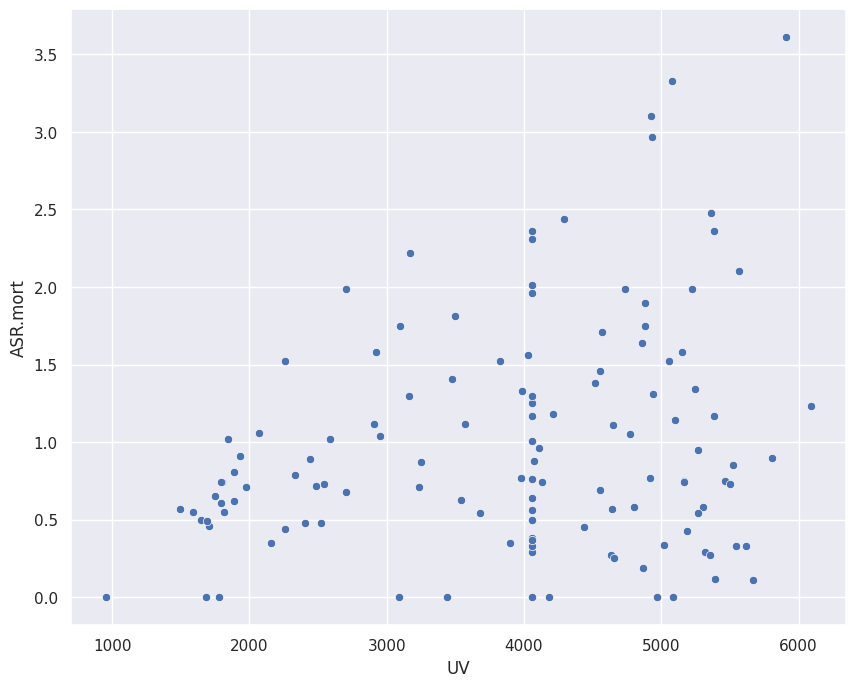

In [ ]:
sns.scatterplot(x=leukemia['UV'], y=leukemia['ASR.mort'], data=leukemia)

In [ ]:
#conclusion: drop HDI.Level, Health.Exp, GDP, overweight.age.below.five, not.using.safe.water, and Stunting
#            to predict the ASR.mort

Define New Dataset for both ASR Incidence and Mortality Prediction

In [ ]:
#dataframe for ASR.inc model: drop GDP and overweight.age.five.to.nineteen to predict the ASR.inc
leukemia1 = leukemia.drop(columns = ['GDP','overweight.age.five.to.nineteen'],axis=1)
leukemia1

ASR.inc  ASR.mort  HDI.Level  Health.Exp  Household.Pollution  \
1       5.12      0.73        3.0    7.270000                 83.7   
2       2.60      0.87        3.0    5.530000                 99.7   
4       3.84      1.41        4.0    9.710000                 99.9   
7       4.93      0.62        4.0   12.100000                100.0   
8       5.99      1.99        3.0    4.700000                 98.3   
..       ...       ...        ...         ...                  ...   
180     4.27      1.96        2.0    7.011321                 95.5   
181     5.57      2.44        3.0    4.590000                 96.1   
182     2.09      1.23        1.0    0.000000                 61.3   
183     1.10      0.54        2.0    6.620000                 10.2   
184     1.33      0.77        2.0    2.790000                 30.3   

     overweight.age.below.five  not.using.safe.water   Stunting          UV  
1                     6.663816          8.317749e+05   8.300000  2542.00000  
2                    11.900000          1.320248e+07   8.600000  3253.00000  
4                    12.600000          2.040640e+07   9.500000  3476.00000  
7                     6.663816          9.866439e+04  17.552941  1888.00000  
8                    10.100000          2.940481e+06  13.300000  2702.00000  
..                         ...                   ...        ...         ...  
180                   6.900000          2.040640e+07  17.552941  4060.77707  
181                   8.100000          4.145311e+07  19.300000  4293.00000  
182                   1.700000          2.040640e+07  35.100000  6089.00000  
183                   5.400000          2.040640e+07  31.400000  5265.00000  
184                   2.700000          1.199291e+07  21.600000  4918.00000  

[131 rows x 9 columns]

In [ ]:
#dataframe for ASR.mort model: drop HDI.Level, Health.Exp, GDP, overweight.age.below.five, not.using.safe.water, and Stunting
leukemia2 = leukemia.drop(columns = ['HDI.Level','Health.Exp','GDP','overweight.age.below.five','not.using.safe.water','Stunting'],axis=1)
leukemia2

ASR.inc  ASR.mort  Household.Pollution  overweight.age.five.to.nineteen  \
1       5.12      0.73                 83.7                        75.226262   
2       2.60      0.87                 99.7                        15.259528   
4       3.84      1.41                 99.9                        20.272213   
7       4.93      0.62                100.0                        10.566571   
8       5.99      1.99                 98.3                        86.074397   
..       ...       ...                  ...                              ...   
180     4.27      1.96                 95.5                        33.370829   
181     5.57      2.44                 96.1                         6.313841   
182     2.09      1.23                 61.3                        10.724155   
183     1.10      0.54                 10.2                        51.678468   
184     1.33      0.77                 30.3                         2.457167   

             UV  
1    2542.00000  
2    3253.00000  
4    3476.00000  
7    1888.00000  
8    2702.00000  
..          ...  
180  4060.77707  
181  4293.00000  
182  6089.00000  
183  5265.00000  
184  4918.00000  

[131 rows x 5 columns]

5. Data Normalization

In [ ]:
# Specify variables to exclude
variables_to_exclude = ['ASR.inc', 'ASR.mort']

# Copy the data excluding specified variables
df_min_max_scaled1 = leukemia1.drop(variables_to_exclude, axis=1).copy()

# Apply min-max scaling techniques
for column in df_min_max_scaled1.columns:
    df_min_max_scaled1[column] = (df_min_max_scaled1[column] - df_min_max_scaled1[column].min()) / (df_min_max_scaled1[column].max() - df_min_max_scaled1[column].min())

# View normalized data
print(df_min_max_scaled1)

     HDI.Level  Health.Exp  Household.Pollution  overweight.age.below.five  \
1         0.75    0.562258                0.837                   0.447620   
2         0.75    0.427688                0.997                   0.847328   
4         1.00    0.750967                0.999                   0.900763   
7         1.00    0.935808                1.000                   0.447620   
8         0.75    0.363496                0.983                   0.709924   
..         ...         ...                  ...                        ...   
180       0.50    0.542252                0.955                   0.465649   
181       0.75    0.354988                0.961                   0.557252   
182       0.25    0.000000                0.613                   0.068702   
183       0.50    0.511988                0.102                   0.351145   
184       0.50    0.215777                0.303                   0.145038   

     not.using.safe.water  Stunting        UV  
1              

In [ ]:
leukemia1 = pd.concat([leukemia.iloc[:,0:2],df_min_max_scaled1], axis=1)
leukemia1

ASR.inc  ASR.mort  HDI.Level  Health.Exp  Household.Pollution  \
1       5.12      0.73       0.75    0.562258                0.837   
2       2.60      0.87       0.75    0.427688                0.997   
4       3.84      1.41       1.00    0.750967                0.999   
7       4.93      0.62       1.00    0.935808                1.000   
8       5.99      1.99       0.75    0.363496                0.983   
..       ...       ...        ...         ...                  ...   
180     4.27      1.96       0.50    0.542252                0.955   
181     5.57      2.44       0.75    0.354988                0.961   
182     2.09      1.23       0.25    0.000000                0.613   
183     1.10      0.54       0.50    0.511988                0.102   
184     1.33      0.77       0.50    0.215777                0.303   

     overweight.age.below.five  not.using.safe.water  Stunting        UV  
1                     0.447620              0.018078  0.189840  0.308846  
2                     0.847328              0.286952  0.197861  0.447389  
4                     0.900763              0.443527  0.221925  0.490842  
7                     0.447620              0.002144  0.437244  0.181411  
8                     0.709924              0.063911  0.323529  0.340023  
..                         ...                   ...       ...       ...  
180                   0.465649              0.443527  0.437244  0.604789  
181                   0.557252              0.900971  0.483957  0.650039  
182                   0.068702              0.443527  0.906417  1.000000  
183                   0.351145              0.443527  0.807487  0.839439  
184                   0.145038              0.260663  0.545455  0.771824  

[131 rows x 9 columns]

In [ ]:
# Specify variables to exclude
variables_to_exclude = ['ASR.inc', 'ASR.mort']

# Copy the data excluding specified variables
df_min_max_scaled2 = leukemia2.drop(variables_to_exclude, axis=1).copy()

# Apply min-max scaling techniques
for column in df_min_max_scaled2.columns:
    df_min_max_scaled2[column] = (df_min_max_scaled2[column] - df_min_max_scaled2[column].min()) / (df_min_max_scaled2[column].max() - df_min_max_scaled2[column].min())

# View normalized data
print(df_min_max_scaled2)

     Household.Pollution  overweight.age.five.to.nineteen        UV
1                  0.837                         0.772439  0.308846
2                  0.997                         0.146160  0.447389
4                  0.999                         0.198511  0.490842
7                  1.000                         0.097148  0.181411
8                  0.983                         0.885734  0.340023
..                   ...                              ...       ...
180                0.955                         0.335310  0.604789
181                0.961                         0.052733  0.650039
182                0.613                         0.098794  1.000000
183                0.102                         0.526511  0.839439
184                0.303                         0.012455  0.771824

[131 rows x 3 columns]


In [ ]:
leukemia2 = pd.concat([leukemia.iloc[:,0:2],df_min_max_scaled2], axis=1)
leukemia2

ASR.inc  ASR.mort  Household.Pollution  overweight.age.five.to.nineteen  \
1       5.12      0.73                0.837                         0.772439   
2       2.60      0.87                0.997                         0.146160   
4       3.84      1.41                0.999                         0.198511   
7       4.93      0.62                1.000                         0.097148   
8       5.99      1.99                0.983                         0.885734   
..       ...       ...                  ...                              ...   
180     4.27      1.96                0.955                         0.335310   
181     5.57      2.44                0.961                         0.052733   
182     2.09      1.23                0.613                         0.098794   
183     1.10      0.54                0.102                         0.526511   
184     1.33      0.77                0.303                         0.012455   

           UV  
1    0.308846  
2    0.447389  
4    0.490842  
7    0.181411  
8    0.340023  
..        ...  
180  0.604789  
181  0.650039  
182  1.000000  
183  0.839439  
184  0.771824  

[131 rows x 5 columns]


**MODEL BUILDING**

---



**1. Data Splitting (Train & Test)**

In [ ]:
#split data into train and test
np.random.seed(0)
##ASR.inc
index1 = np.random.choice(leukemia1.index, size=round(0.80 * len(leukemia1)), replace=False)
train1 = leukemia1.loc[index1]
test1 = leukemia1.loc[~leukemia1.index.isin(index1)]

In [ ]:
print(train1)

     ASR.inc  ASR.mort  HDI.Level  Health.Exp  Household.Pollution  \
17      1.74      0.00   0.662037    0.297757                0.870   
88      1.68      1.52   1.000000    0.303171                0.939   
126     4.27      1.14   1.000000    0.337974                1.000   
152     2.26      0.96   0.750000    0.639598                0.884   
101     0.89      0.00   0.662037    0.438515                1.000   
..       ...       ...        ...         ...                  ...   
113     6.00      1.17   1.000000    0.815932                0.620   
33      5.67      1.33   1.000000    0.722351                1.000   
178     3.20      2.22   0.750000    0.598608                0.828   
102     1.98      1.05   0.250000    0.270688                0.014   
108     0.58      0.33   0.500000    0.318639                0.483   

     overweight.age.below.five  not.using.safe.water  Stunting        UV  
17                    0.435115              0.004534  0.574866  0.628020  
88       

In [ ]:
print(test1)

     ASR.inc  ASR.mort  HDI.Level  Health.Exp  Household.Pollution  \
18      3.94      2.01   0.500000    0.542252             0.883000   
21      3.70      1.46   0.750000    0.764888             0.965000   
34      3.48      1.12   0.750000    0.416087             0.832000   
39      5.09      1.90   1.000000    0.585460             0.959000   
53      1.31      0.35   0.500000    0.544470             0.581000   
56      5.53      0.57   1.000000    0.792730             1.000000   
58      4.13      1.25   0.000000    0.542252             0.670038   
67      1.38      0.74   0.500000    0.320959             0.303000   
69      1.86      0.00   0.662037    0.542252             0.670038   
85      2.05      1.31   0.750000    0.556071             0.825000   
92      3.44      1.18   1.000000    0.447022             1.000000   
94      3.89      1.99   0.500000    0.211910             0.093000   
100     4.69      0.74   1.000000    0.604795             1.000000   
114     2.75      1.

In [ ]:
np.random.seed(0)
##ASR.mort
index2 = np.random.choice(leukemia2.index, size=round(0.80 * len(leukemia2)), replace=False)
train2 = leukemia2.loc[index2]
test2 = leukemia2.loc[~leukemia2.index.isin(index2)]

In [ ]:
print(train2)

     ASR.inc  ASR.mort  Household.Pollution  overweight.age.five.to.nineteen  \
17      1.74      0.00                0.870                         0.601325   
88      1.68      1.52                0.939                         0.578199   
126     4.27      1.14                1.000                         0.183619   
152     2.26      0.96                0.884                         0.726400   
101     0.89      0.00                1.000                         0.762801   
..       ...       ...                  ...                              ...   
113     6.00      1.17                0.620                         0.899286   
33      5.67      1.33                1.000                         0.273660   
178     3.20      2.22                0.828                         0.654845   
102     1.98      1.05                0.014                         0.215426   
108     0.58      0.33                0.483                         0.825473   

           UV  
17   0.628020  
88   0.

In [ ]:
print(test2)

     ASR.inc  ASR.mort  Household.Pollution  overweight.age.five.to.nineteen  \
18      3.94      2.01             0.883000                         0.335310   
21      3.70      1.46             0.965000                         0.148529   
34      3.48      1.12             0.832000                         0.110954   
39      5.09      1.90             0.959000                         0.130669   
53      1.31      0.35             0.581000                         0.697905   
56      5.53      0.57             1.000000                         0.000000   
58      4.13      1.25             0.670038                         0.335310   
67      1.38      0.74             0.303000                         0.718368   
69      1.86      0.00             0.670038                         0.335310   
85      2.05      1.31             0.825000                         0.148681   
92      3.44      1.18             1.000000                         0.208477   
94      3.89      1.99             0.093

In [ ]:
#split into y_train, x_train, y_test, x_test
##y1_train = ASR.inc
y1_train = train1.iloc[:,0]
y1_train.head()

17     1.74
88     1.68
126    4.27
152    2.26
101    0.89
Name: ASR.inc, dtype: float64

In [ ]:
##y2_train = ASR.mort
y2_train = train2.iloc[:,1]
y2_train.head()

17     0.00
88     1.52
126    1.14
152    0.96
101    0.00
Name: ASR.mort, dtype: float64

In [ ]:
##x_train
#ASR.inc
x1_train = train1.iloc[:,2:9]
x1_train

HDI.Level  Health.Exp  Household.Pollution  overweight.age.below.five  \
17    0.662037    0.297757                0.870                   0.435115   
88    1.000000    0.303171                0.939                   0.526718   
126   1.000000    0.337974                1.000                   0.435115   
152   0.750000    0.639598                0.884                   0.862595   
101   0.662037    0.438515                1.000                   0.447620   
..         ...         ...                  ...                        ...   
113   1.000000    0.815932                0.620                   0.549618   
33    1.000000    0.722351                1.000                   0.610687   
178   0.750000    0.598608                0.828                   0.259542   
102   0.250000    0.270688                0.014                   0.053435   
108   0.500000    0.318639                0.483                   0.091603   

     not.using.safe.water  Stunting        UV  
17               0.004534  0.574866  0.628020  
88               0.443527  0.098930  0.253313  
126              0.009099  0.307487  0.807677  
152              0.443527  0.577540  0.614575  
101              0.000066  0.437244  0.142245  
..                    ...       ...       ...  
113              0.002028  0.187166  0.604789  
33               0.005235  0.010695  0.589439  
178              0.151689  0.152406  0.431606  
102              0.500470  1.000000  0.743180  
108              0.443527  0.558824  0.894388  

[105 rows x 7 columns]

In [ ]:
#ASR.mort
x2_train = pd.concat([train2.iloc[:,0], train2.iloc[:,2:5]], axis=1)
x2_train

ASR.inc  Household.Pollution  overweight.age.five.to.nineteen        UV
17      1.74                0.870                         0.601325  0.628020
88      1.68                0.939                         0.578199  0.253313
126     4.27                1.000                         0.183619  0.807677
152     2.26                0.884                         0.726400  0.614575
101     0.89                1.000                         0.762801  0.142245
..       ...                  ...                              ...       ...
113     6.00                0.620                         0.899286  0.604789
33      5.67                1.000                         0.273660  0.589439
178     3.20                0.828                         0.654845  0.431606
102     1.98                0.014                         0.215426  0.743180
108     0.58                0.483                         0.825473  0.894388

[105 rows x 4 columns]

In [ ]:
##y_test
##y1_test = ASR.inc
y1_test = test1.iloc[:,0]
y1_test.head()

18    3.94
21    3.70
34    3.48
39    5.09
53    1.31
Name: ASR.inc, dtype: float64

In [ ]:
##y2_test = ASR.mort
y2_test = test2.iloc[:,1]
y2_test

18     2.01
21     1.46
34     1.12
39     1.90
53     0.35
56     0.57
58     1.25
67     0.74
69     0.00
85     1.31
92     1.18
94     1.99
100    0.74
114    1.12
116    1.71
120    0.72
121    3.33
147    0.77
148    0.74
161    1.58
164    1.64
166    0.50
171    1.30
177    0.71
182    1.23
183    0.54
Name: ASR.mort, dtype: float64

In [ ]:
##x_test
#ASR.inc
x1_test = test1.iloc[:,2:9]
x1_test

HDI.Level  Health.Exp  Household.Pollution  overweight.age.below.five  \
18    0.500000    0.542252             0.883000                   0.625954   
21    0.750000    0.764888             0.965000                   0.725191   
34    0.750000    0.416087             0.832000                   0.618321   
39    1.000000    0.585460             0.959000                   0.519084   
53    0.500000    0.544470             0.581000                   0.541985   
56    1.000000    0.792730             1.000000                   0.447620   
58    0.000000    0.542252             0.670038                   0.447620   
67    0.500000    0.320959             0.303000                   0.083969   
69    0.662037    0.542252             0.670038                   0.447620   
85    0.750000    0.556071             0.825000                   0.374046   
92    1.000000    0.447022             1.000000                   0.832061   
94    0.500000    0.211910             0.093000                   0.244275   
100   1.000000    0.604795             1.000000                   0.297710   
114   0.500000    0.443929             0.982000                   0.312977   
116   0.500000    0.435422             0.435000                   0.000000   
120   1.000000    0.777262             1.000000                   0.447620   
121   0.500000    0.748647             0.574000                   0.603053   
147   1.000000    0.430781             1.000000                   0.229008   
148   1.000000    0.599381             1.000000                   0.447620   
161   0.662037    0.353442             0.954000                   0.557252   
164   1.000000    0.399072             0.851000                   0.595420   
166   0.250000    0.542252             0.017000                   0.076336   
171   0.750000    0.430781             0.999000                   0.213740   
177   1.000000    0.723898             1.000000                   0.816794   
182   0.250000    0.000000             0.613000                   0.068702   
183   0.500000    0.511988             0.102000                   0.351145   

     not.using.safe.water  Stunting        UV  
18               0.443527  0.437244  0.604789  
21               0.596264  0.160428  0.700507  
34               0.443527  0.090909  0.380164  
39               0.021949  0.221925  0.765199  
53               0.443527  0.534759  0.573461  
56               0.431092  0.437244  0.104638  
58               0.369039  0.437244  0.604789  
67               0.404044  0.307487  0.820148  
69               0.351023  0.437244  0.604789  
85               0.443527  0.141711  0.776500  
92               0.000000  0.152406  0.634645  
94               0.134403  0.708556  0.736165  
100              0.003000  0.088235  0.164458  
114              0.204966  0.310160  0.508769  
116              0.501687  0.612299  0.703040  
120              0.000000  0.437244  0.298129  
121              0.443527  0.366310  0.803001  
147              0.000000  0.048128  0.588854  
148              1.000000  0.437244  0.163289  
161              0.443527  0.437244  0.383281  
164              0.443527  0.283422  0.760912  
166              0.030775  0.437244  0.604789  
171              0.007156  0.147059  0.430047  
177              0.443527  0.131016  0.443882  
182              0.443527  0.906417  1.000000  
183              0.443527  0.807487  0.839439

In [ ]:
#ASR.mort
x2_test = pd.concat([test2.iloc[:,0], test2.iloc[:,2:5]], axis=1)
x2_test

ASR.inc  Household.Pollution  overweight.age.five.to.nineteen        UV
18      3.94             0.883000                         0.335310  0.604789
21      3.70             0.965000                         0.148529  0.700507
34      3.48             0.832000                         0.110954  0.380164
39      5.09             0.959000                         0.130669  0.765199
53      1.31             0.581000                         0.697905  0.573461
56      5.53             1.000000                         0.000000  0.104638
58      4.13             0.670038                         0.335310  0.604789
67      1.38             0.303000                         0.718368  0.820148
69      1.86             0.670038                         0.335310  0.604789
85      2.05             0.825000                         0.148681  0.776500
92      3.44             1.000000                         0.208477  0.634645
94      3.89             0.093000                         0.696504  0.736165
100     4.69             1.000000                         0.060722  0.164458
114     2.75             0.982000                         0.585550  0.508769
116     3.07             0.435000                         0.758938  0.703040
120     4.96             1.000000                         0.172528  0.298129
121     6.03             0.574000                         0.119954  0.803001
147     7.88             1.000000                         0.153580  0.588854
148     2.72             1.000000                         1.000000  0.163289
161     5.35             0.954000                         0.335310  0.383281
164     4.46             0.851000                         0.114842  0.760912
166     0.64             0.017000                         0.335310  0.604789
171     2.18             0.999000                         0.336927  0.430047
177     3.87             1.000000                         0.172164  0.443882
182     2.09             0.613000                         0.098794  1.000000
183     1.10             0.102000                         0.526511  0.839439

**2. Model Fitting**



***Linear Model***

In [ ]:
#from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [ ]:
#ASR.inc
lm1 = sm.OLS(y1_train, x1_train)
lm_model1 = lm1.fit()
print(lm_model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                ASR.inc   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.865
Method:                 Least Squares   F-statistic:                              96.98
Date:                Wed, 25 Sep 2024   Prob (F-statistic):                    3.49e-41
Time:                        13:43:13   Log-Likelihood:                         -177.93
No. Observations:                 105   AIC:                                      369.9
Df Residuals:                      98   BIC:                                      388.4
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [ ]:
#ASR.Mort
lm2 = sm.OLS(y2_train, x2_train)
lm_model2 = lm2.fit()
print(lm_model2.summary())

                                 OLS Regression Results                                
Dep. Variable:               ASR.mort   R-squared (uncentered):                   0.744
Model:                            OLS   Adj. R-squared (uncentered):              0.733
Method:                 Least Squares   F-statistic:                              73.22
Date:                Wed, 25 Sep 2024   Prob (F-statistic):                    5.47e-29
Time:                        13:43:13   Log-Likelihood:                         -94.063
No. Observations:                 105   AIC:                                      196.1
Df Residuals:                     101   BIC:                                      206.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

***Generalized Linear Model***

In [ ]:
import statsmodels.api as sm
#choose Gaussian family for the generalized linear model

In [ ]:
#ASR.inc
glm3 = sm.GLM(y1_train, x1_train, family=sm.families.Gaussian())
gl_model1 = glm3.fit()
print(gl_model1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                ASR.inc   No. Observations:                  105
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            6
Link Function:               Identity   Scale:                          1.8594
Method:                          IRLS   Log-Likelihood:                -177.93
Date:                Wed, 25 Sep 2024   Deviance:                       182.22
Time:                        13:43:13   Pearson chi2:                     182.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5528
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
HDI.Level             

In [ ]:
#ASR.mort
glm9 = sm.GLM(y2_train, x2_train, family=sm.families.Gaussian())
gl_model2 = glm9.fit()
print(gl_model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               ASR.mort   No. Observations:                  105
Model:                            GLM   Df Residuals:                      101
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                         0.36518
Method:                          IRLS   Log-Likelihood:                -94.063
Date:                Wed, 25 Sep 2024   Deviance:                       36.883
Time:                        13:43:13   Pearson chi2:                     36.9
No. Iterations:                     3   Pseudo R-squ. (CS):             0.4461
Covariance Type:            nonrobust                                         
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
ASR.inc   

***Regression Tree***

In [ ]:
#for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#for regression tree
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#ASR.inc
max_depth = [1,4,7]
min_samples_split = [2,3,4]
min_samples_leaf = [2,4,13,14]
splitter = ['random', 'best']
max_features = ['sqrt', 'log2', None]
criterion =['friedman_mse', 'squared_error', 'poisson', 'absolute_error']

param_grid = {
   'max_depth' : max_depth,
   'min_samples_split' : min_samples_split,
   'min_samples_leaf' : min_samples_leaf,
   'splitter' : splitter,
   'max_features' : max_features,
   'criterion' : criterion
}

rt_model1 = GridSearchCV(estimator = DecisionTreeRegressor(random_state=0),
                           param_grid = param_grid,
                           scoring='neg_mean_absolute_error',
                           cv=5,
                           error_score='raise'
                         )

rt_model1.fit(x1_train, y1_train)
rtbest_params1 = rt_model1.best_params_

In [ ]:
rtbest_params1

{'criterion': 'absolute_error',
 'max_depth': 4,
 'max_features': None,
 'min_samples_leaf': 14,
 'min_samples_split': 2,
 'splitter': 'best'}

[Text(0.5, 0.875, 'Household.Pollution <= 0.489\nabsolute_error = 1.501\nsamples = 105\nvalue = 3.49'),
 Text(0.25, 0.625, 'Stunting <= 0.599\nabsolute_error = 0.849\nsamples = 32\nvalue = 1.31'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'absolute_error = 0.824\nsamples = 17\nvalue = 1.33'),
 Text(0.375, 0.375, 'absolute_error = 0.761\nsamples = 15\nvalue = 0.72'),
 Text(0.75, 0.625, 'Health.Exp <= 0.68\nabsolute_error = 1.13\nsamples = 73\nvalue = 4.03'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Household.Pollution <= 0.943\nabsolute_error = 1.11\nsamples = 49\nvalue = 3.83'),
 Text(0.5, 0.125, 'absolute_error = 1.27\nsamples = 25\nvalue = 3.2'),
 Text(0.75, 0.125, 'absolute_error = 0.815\nsamples = 24\nvalue = 3.91'),
 Text(0.875, 0.375, 'absolute_error = 0.771\nsamples = 24\nvalue = 4.945')]

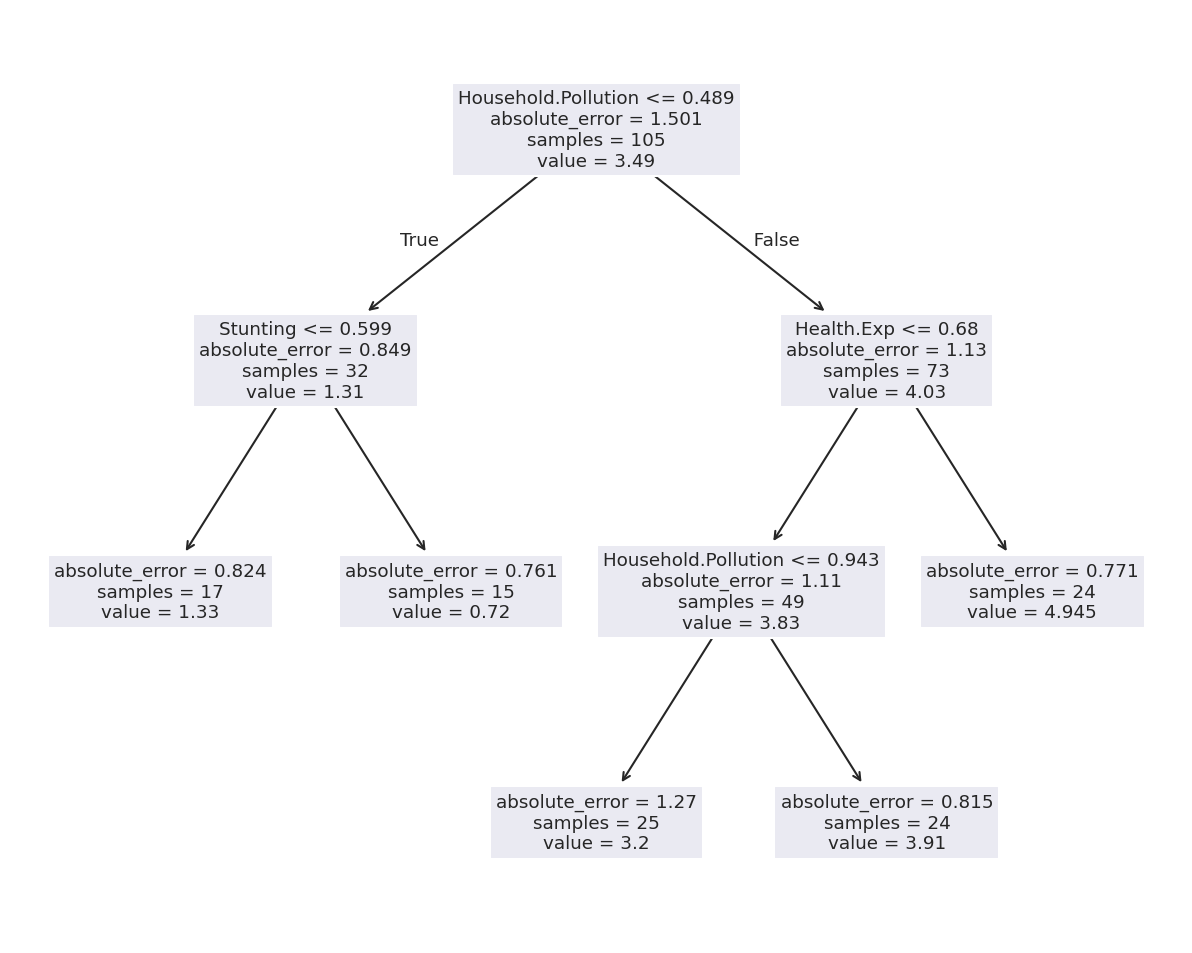

In [ ]:
#visualisasi
from sklearn.tree import plot_tree
best_rt_model1 = rt_model1.best_estimator_
plt.figure(figsize=(10,8), dpi=150)
plot_tree(best_rt_model1, feature_names=x1_train.columns)

In [ ]:
#ASR.mort

max_depth = [1,3,4,6,9,11]
min_samples_split = [2,3,4]
min_samples_leaf = [2,4,13,14]
splitter = ['random', 'best']
max_features = ['sqrt', 'log2', None]
criterion =['friedman_mse', 'squared_error', 'poisson', 'absolute_error']

param_grid = {
   'max_depth' : max_depth,
   'min_samples_split' : min_samples_split,
   'min_samples_leaf' : min_samples_leaf,
   'splitter' : splitter,
   'max_features' : max_features,
   'criterion' : criterion
}

rt_model2 = GridSearchCV(estimator = DecisionTreeRegressor(random_state=0),
                           param_grid = param_grid,
                           scoring='neg_mean_absolute_error',
                           cv=5,
                           error_score='raise'
                         )

rt_model2.fit(x2_train, y2_train)
rtbest_params2 = rt_model2.best_params_

In [ ]:
rtbest_params2

{'criterion': 'poisson',
 'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'random'}

In [ ]:
#visualisasi
best_rt_model2 = rt_model2.best_estimator_
plt.figure(figsize=(100,50), dpi=150)
plot_tree(best_rt_model2, feature_names=x2_train.columns)

[Text(0.35110294117647056, 0.95, 'ASR.inc <= 2.315\npoisson = 0.317\nsamples = 105\nvalue = 0.896'),
 Text(0.11764705882352941, 0.85, 'UV <= 0.307\npoisson = 0.153\nsamples = 35\nvalue = 0.478'),
 Text(0.234375, 0.8999999999999999, 'True  '),
 Text(0.058823529411764705, 0.75, 'UV <= 0.247\npoisson = 0.276\nsamples = 4\nvalue = 0.638'),
 Text(0.029411764705882353, 0.65, 'poisson = 0.191\nsamples = 2\nvalue = 0.275'),
 Text(0.08823529411764706, 0.65, 'poisson = 0.142\nsamples = 2\nvalue = 1.0'),
 Text(0.17647058823529413, 0.75, 'UV <= 0.608\npoisson = 0.134\nsamples = 31\nvalue = 0.458'),
 Text(0.14705882352941177, 0.65, 'poisson = 0.123\nsamples = 6\nvalue = 0.27'),
 Text(0.20588235294117646, 0.65, 'ASR.inc <= 1.124\npoisson = 0.124\nsamples = 25\nvalue = 0.503'),
 Text(0.14705882352941177, 0.55, 'Household.Pollution <= 0.373\npoisson = 0.039\nsamples = 13\nvalue = 0.26'),
 Text(0.11764705882352941, 0.45, 'Household.Pollution <= 0.01\npoisson = 0.047\nsamples = 9\nvalue = 0.24'),
 Text(

***Random Forest***

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#ASR.inc

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110, 120, 150],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [3, 4, 5, 7, 10],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf_model1 = GridSearchCV(estimator = RandomForestRegressor(random_state=0),
                           param_grid = param_grid,
                           cv = 3,
                           n_jobs = -1,
                           verbose = 2)

rf_model1.fit(x1_train, y1_train)
rfbest_params1 = rf_model1.best_params_

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


In [ ]:
rfbest_params1

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 100}

[Text(0.45454545454545453, 0.9285714285714286, 'not.using.safe.water <= 0.36\nsquared_error = 3.365\nsamples = 67\nvalue = 3.203'),
 Text(0.2727272727272727, 0.7857142857142857, 'overweight.age.below.five <= 0.21\nsquared_error = 2.929\nsamples = 40\nvalue = 3.909'),
 Text(0.36363636363636365, 0.8571428571428572, 'True  '),
 Text(0.18181818181818182, 0.6428571428571429, 'squared_error = 3.404\nsamples = 7\nvalue = 2.296'),
 Text(0.36363636363636365, 0.6428571428571429, 'overweight.age.below.five <= 0.595\nsquared_error = 2.343\nsamples = 33\nvalue = 4.178'),
 Text(0.2727272727272727, 0.5, 'Health.Exp <= 0.685\nsquared_error = 1.66\nsamples = 26\nvalue = 3.895'),
 Text(0.18181818181818182, 0.35714285714285715, 'HDI.Level <= 0.706\nsquared_error = 1.339\nsamples = 20\nvalue = 3.615'),
 Text(0.09090909090909091, 0.21428571428571427, 'squared_error = 1.483\nsamples = 5\nvalue = 2.534'),
 Text(0.2727272727272727, 0.21428571428571427, 'Household.Pollution <= 0.943\nsquared_error = 0.707\nsam

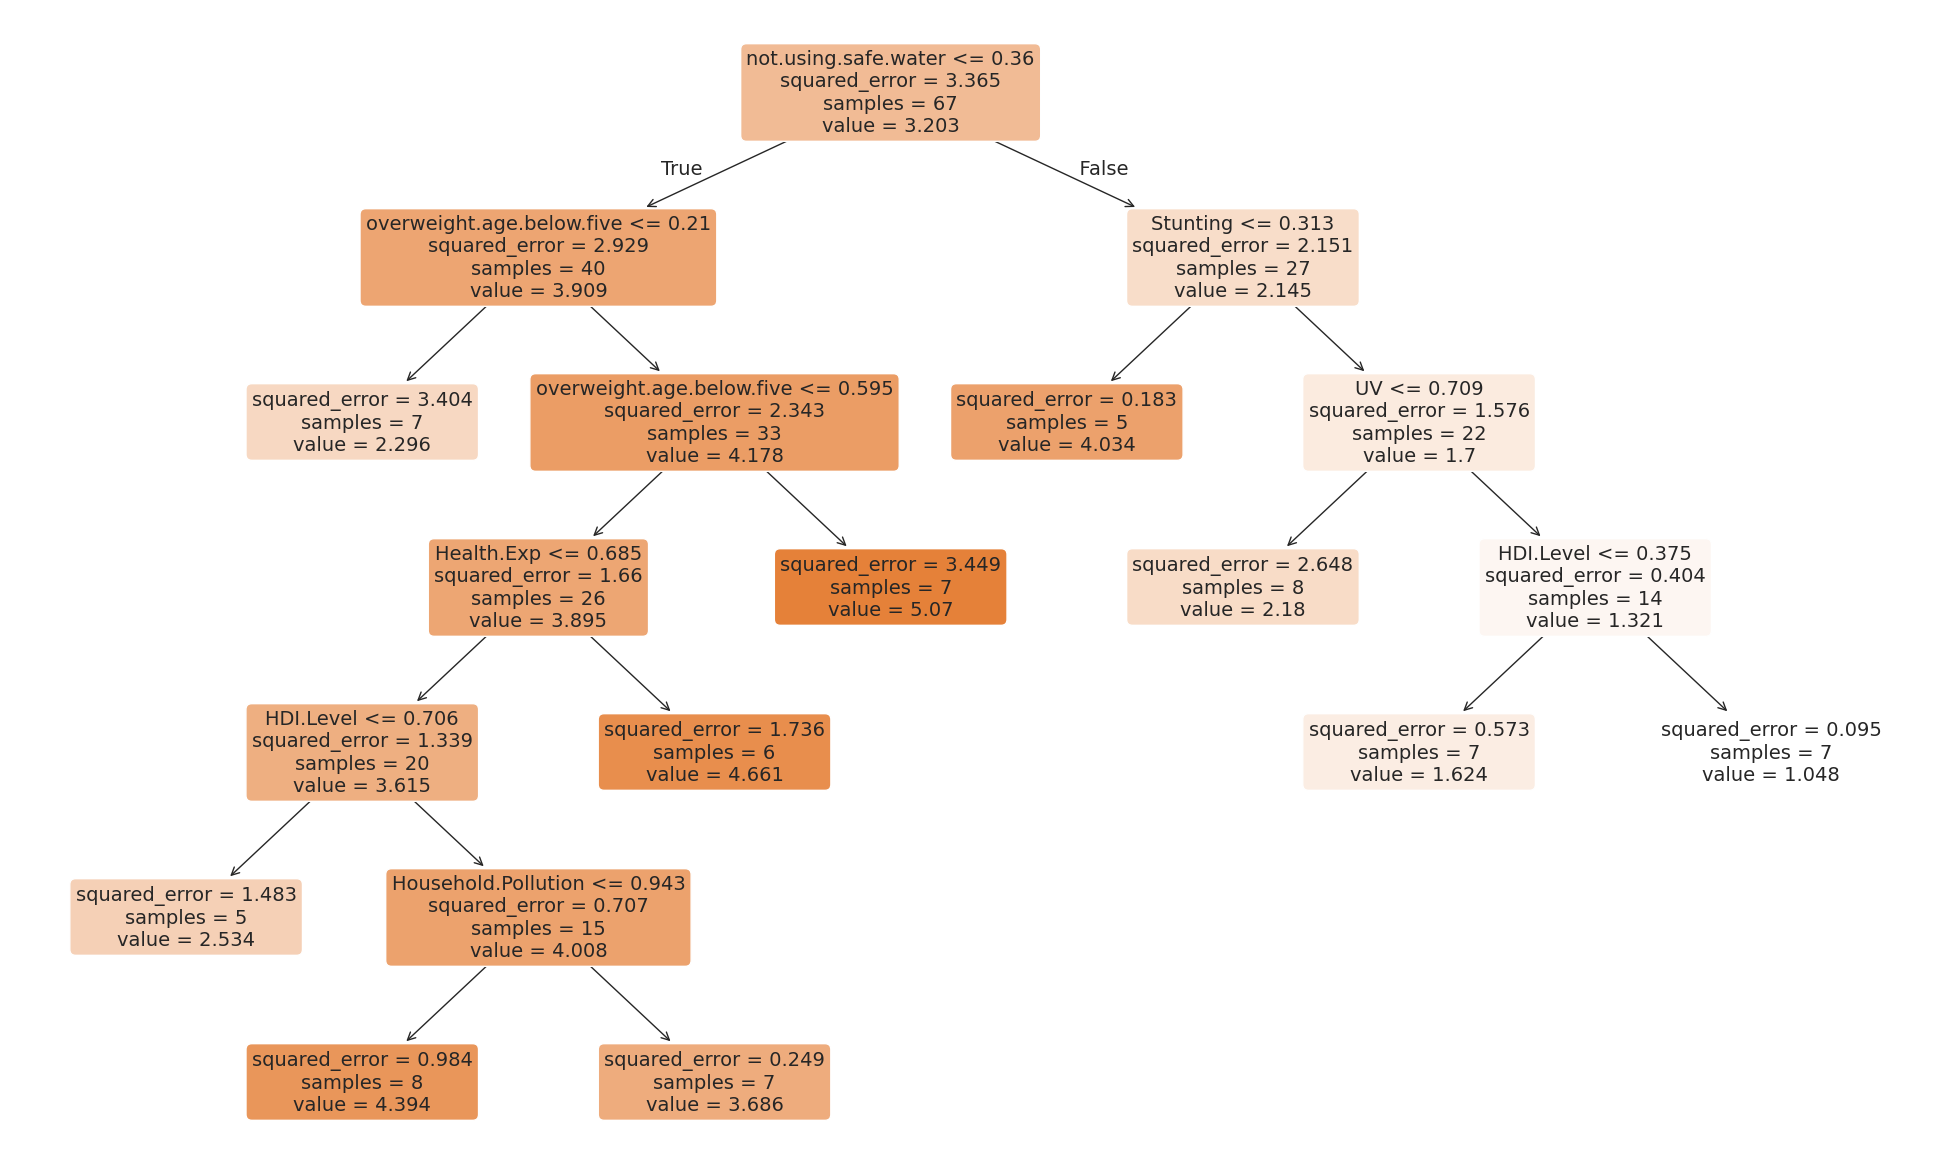

In [ ]:
best_rf_model1 = rf_model1.best_estimator_

import pydot
#pull out one tree from the forest
Tree1 = best_rf_model1[5]

#export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree1, filled = True,
               rounded = True,
               fontsize=14,
               feature_names=x1_train.columns)

In [ ]:
#ASR.mort

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110, 120, 150],
    'max_features': [2, 3, 4, 5],
    'min_samples_leaf': [3, 4, 5, 7, 10],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf_model2 = GridSearchCV(estimator = RandomForestRegressor(random_state=0),
                           param_grid = param_grid,
                           cv = 3,
                           n_jobs = -1,
                           verbose = 2)

rf_model2.fit(x2_train, y2_train)
rfbest_params2 = rf_model2.best_params_

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits


In [ ]:
rfbest_params2

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

[Text(0.4868421052631579, 0.9285714285714286, 'UV <= 0.896\nsquared_error = 0.664\nsamples = 67\nvalue = 0.911'),
 Text(0.4342105263157895, 0.7857142857142857, 'overweight.age.five.to.nineteen <= 0.204\nsquared_error = 0.458\nsamples = 63\nvalue = 0.823'),
 Text(0.4605263157894737, 0.8571428571428572, 'True  '),
 Text(0.2631578947368421, 0.6428571428571429, 'ASR.inc <= 5.285\nsquared_error = 0.467\nsamples = 25\nvalue = 1.193'),
 Text(0.21052631578947367, 0.5, 'Household.Pollution <= 0.885\nsquared_error = 0.262\nsamples = 22\nvalue = 1.024'),
 Text(0.10526315789473684, 0.35714285714285715, 'ASR.inc <= 1.22\nsquared_error = 0.109\nsamples = 11\nvalue = 0.707'),
 Text(0.05263157894736842, 0.21428571428571427, 'squared_error = 0.029\nsamples = 3\nvalue = 0.308'),
 Text(0.15789473684210525, 0.21428571428571427, 'overweight.age.five.to.nineteen <= 0.115\nsquared_error = 0.048\nsamples = 8\nvalue = 0.873'),
 Text(0.10526315789473684, 0.07142857142857142, 'squared_error = 0.045\nsamples = 5\

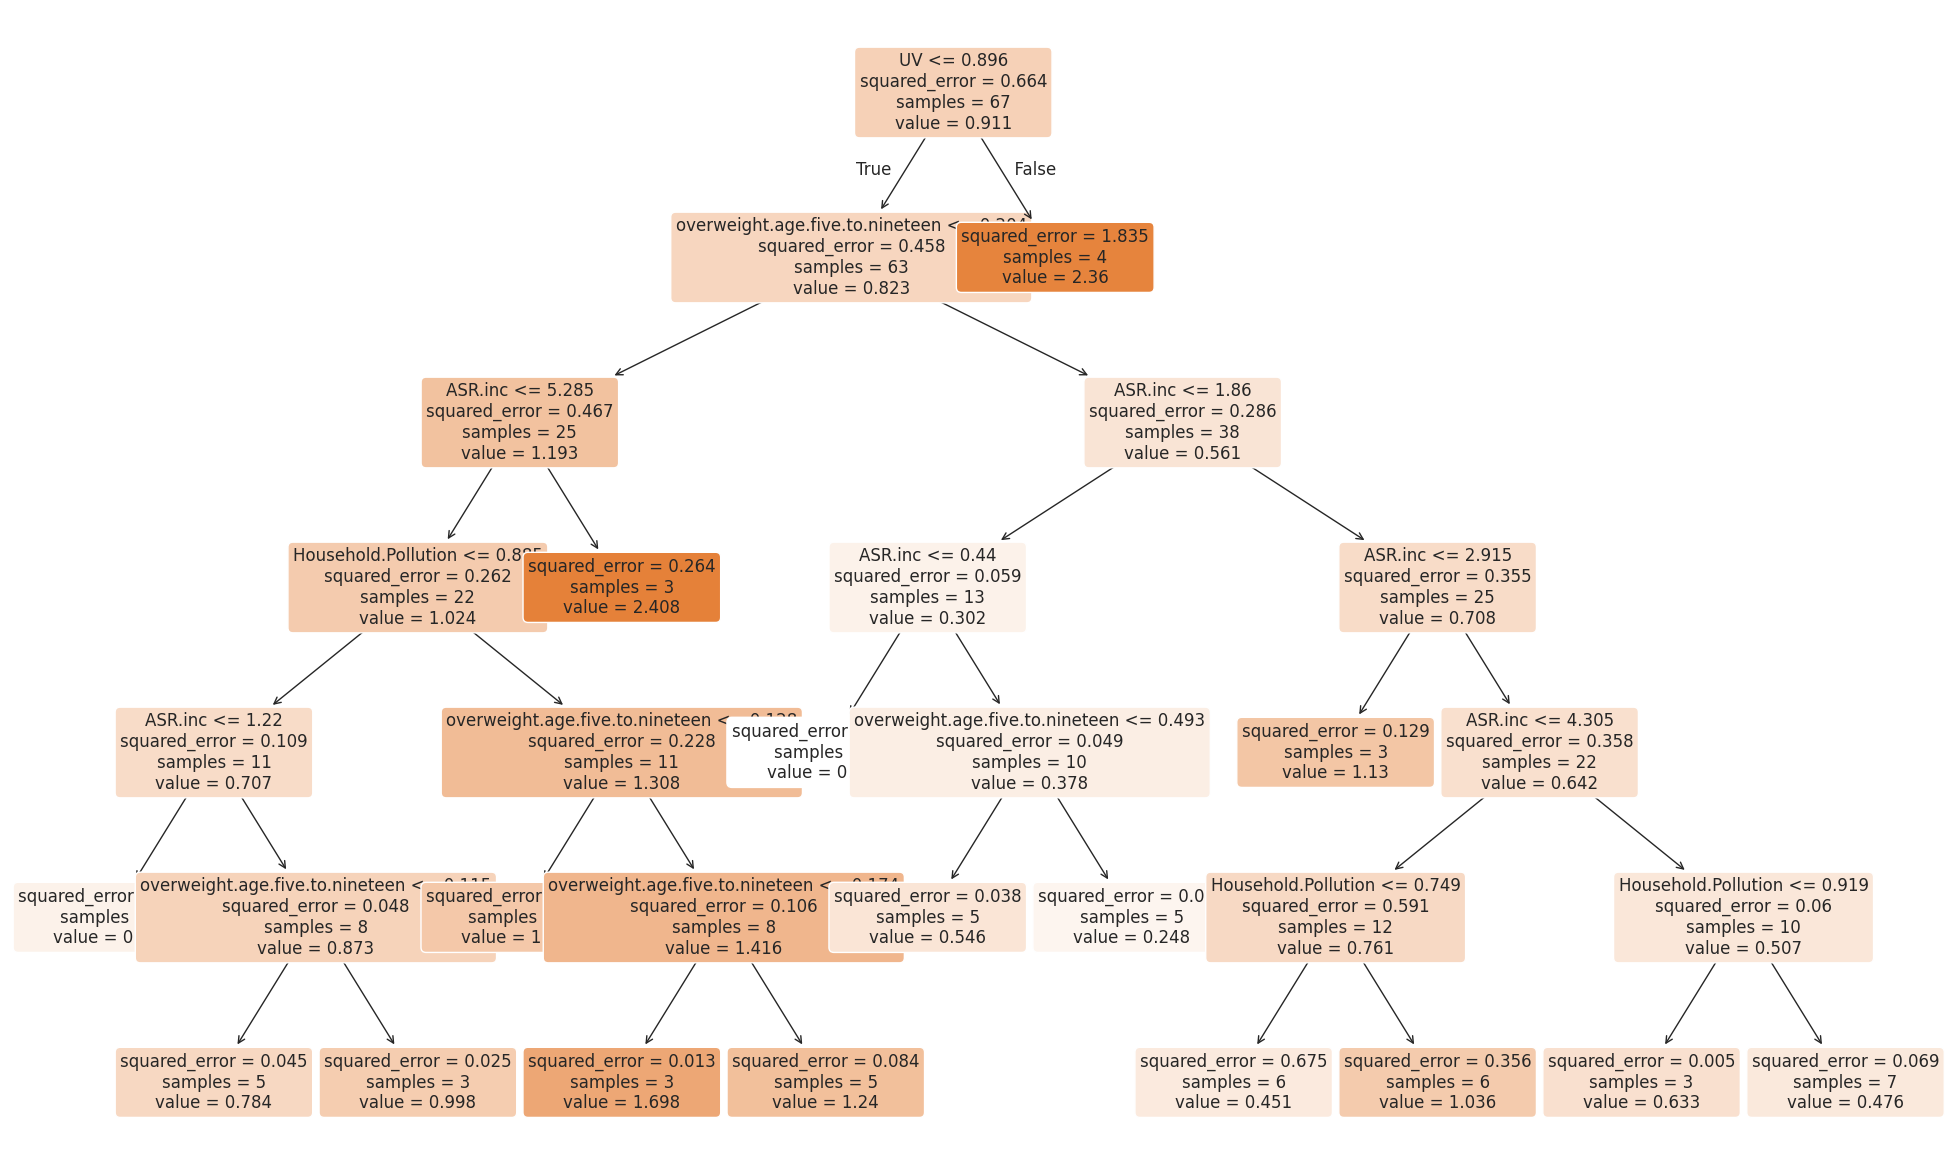

In [ ]:
best_rf_model2 = rf_model2.best_estimator_

import pydot

#pull out one tree from the forest
Tree = best_rf_model2.estimators_[5]

#export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree, filled = True,
               rounded = True,
               fontsize=12,
               feature_names=x2_train.columns)

***XGBoost***

In [ ]:
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

In [ ]:
#ASR.inc
from sklearn.model_selection import GridSearchCV

learning_rate = [0.01, 0.1, 0.2]
n_estimators = [100, 150, 200]
min_child_weight = [1, 3, 5]
gamma = [0.1, 0.2, 0.5]
subsample = [0.5, 0.7, 1, 1.5]
alpha = [1, 1.5, 2, 2.5]
lambda_val = [1.5, 2]
max_depth = [1,5,7]
colsample_bytree = [0.1,0.5,1]

param_grid = {
    'learning_rate': learning_rate,
    'n_estimators': n_estimators,
    'min_child_weight': min_child_weight,
    'gamma': gamma,
    'subsample': subsample,
    'alpha': alpha,
    'lambda': lambda_val,
    'max_depth': max_depth,
    'colsample_bytree':colsample_bytree
}

xgb_model1 = GridSearchCV(estimator=XGBRegressor(random_state=0,
                                                 n_jobs=-1),
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error',
                           cv=5,
                           n_jobs=-1)

xgb_model1.fit(x1_train, y1_train)
xgbbest_params1 = xgb_model1.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
29160 fits failed out of a total of 116640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1108, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in 

In [ ]:
xgbbest_params1

{'alpha': 1,
 'colsample_bytree': 1,
 'gamma': 0.1,
 'lambda': 2,
 'learning_rate': 0.1,
 'max_depth': 1,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 1}

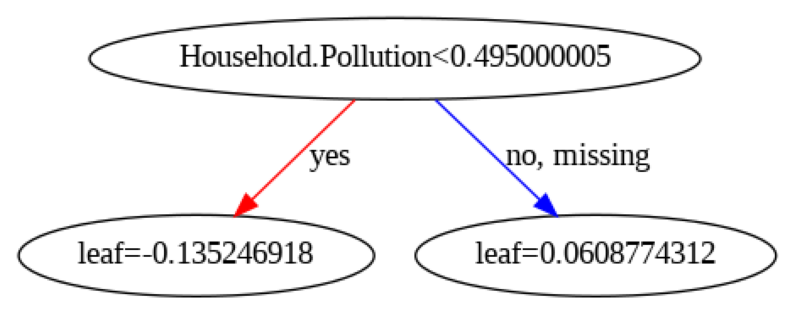

In [ ]:
from xgboost import XGBRegressor
from xgboost import plot_tree
import matplotlib.pyplot as plt

# Assuming grid_search is your GridSearchCV object
# Access the best estimator
best_xgb_model1 = xgb_model1.best_estimator_

# Plot the first tree of the best XGBoost model
plot_tree(best_xgb_model1, num_trees=2)
plt.show()

In [ ]:
#2. model fitting using y2_train = ASR.mort

In [ ]:
learning_rate = [0.01, 0.1]
n_estimators = [100, 130, 150, 200]
min_child_weight = [1, 3, 5, 7]
gamma = [0, 0.01, 0.1]
subsample = [0.3, 0.5, 0.7]
alpha = [1, 1.5, 2, 2.5]
lambda_val = [1, 1.5, 2, 2.5]

param_grid = {
    'learning_rate': learning_rate,
    'n_estimators': n_estimators,
    'min_child_weight': min_child_weight,
    'gamma': gamma,
    'subsample': subsample,
    'alpha': alpha,
    'lambda': lambda_val
}

xgb_model2 = GridSearchCV(estimator=XGBRegressor(max_depth=3,
                                                 colsample_bytree=0.5,
                                                 n_jobs=-1),
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error',
                           cv=5,
                           n_jobs=-1)

xgb_model2.fit(x2_train, y2_train)
xgbbest_params2 = xgb_model2.best_params_

In [ ]:
xgbbest_params2

{'alpha': 1,
 'gamma': 0,
 'lambda': 2,
 'learning_rate': 0.1,
 'min_child_weight': 5,
 'n_estimators': 200,
 'subsample': 0.3}

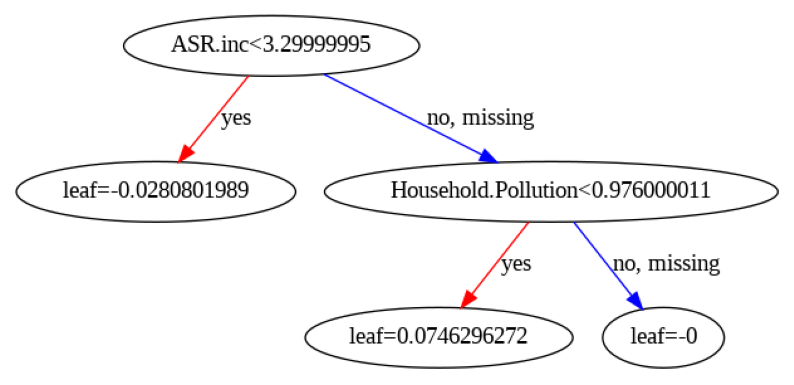

In [ ]:
# Assuming grid_search is your GridSearchCV object
# Access the best estimator
best_xgb_model2 = xgb_model2.best_estimator_

# Plot the first tree of the best XGBoost model
plot_tree(best_xgb_model2, num_trees=0)
plt.show()

**3. Model Prediction**

***Linear Model***

In [ ]:
#ASR.inc (train)
y1_tpred_lm = lm_model1.predict(x1_train)
y1_tpred_lm

17     3.352802
88     3.717148
126    4.170098
152    4.050607
101    3.646200
         ...   
113    3.899797
33     4.768124
178    3.695175
102    0.640501
108    2.296192
Length: 105, dtype: float64

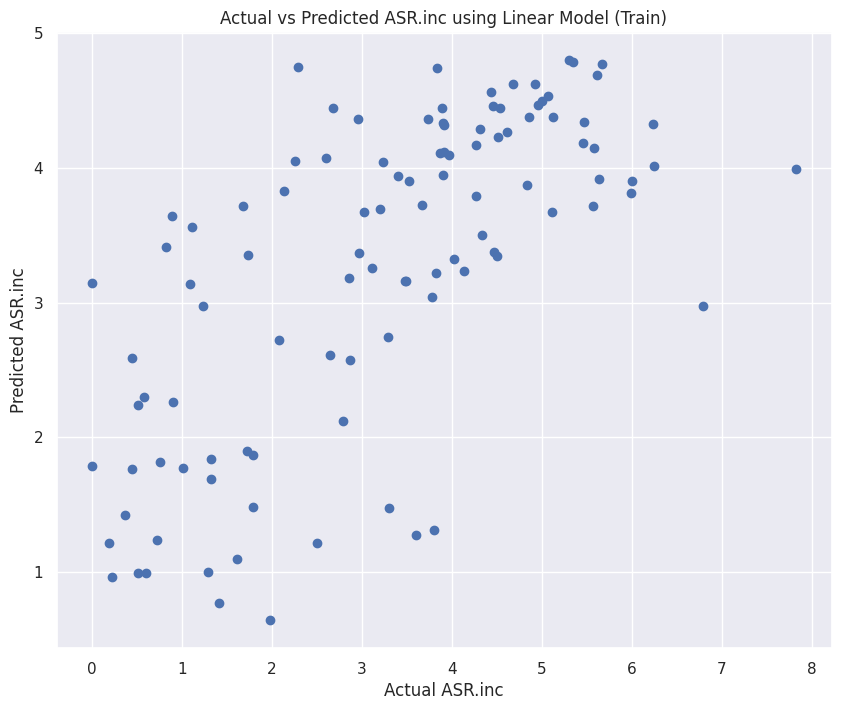

In [ ]:
plt.scatter(y1_train, y1_tpred_lm)
plt.xlabel('Actual ASR.inc')
plt.ylabel('Predicted ASR.inc')
plt.title('Actual vs Predicted ASR.inc using Linear Model (Train)')
plt.show()

In [ ]:
#ASR.inc
y1_pred_lm = lm_model1.predict(x1_test)
y1_pred_lm

18     3.676898
21     4.551477
34     3.546587
39     4.460986
53     2.859829
56     4.329390
58     2.730880
67     1.909225
69     3.216991
85     3.841152
92     4.439424
94     1.146420
100    4.206744
114    3.670096
116    2.175086
120    4.465492
121    3.348741
147    4.188447
148    4.024390
161    3.545119
164    3.891941
166    1.215509
171    3.870698
177    4.677796
182    1.903861
183    1.628468
dtype: float64

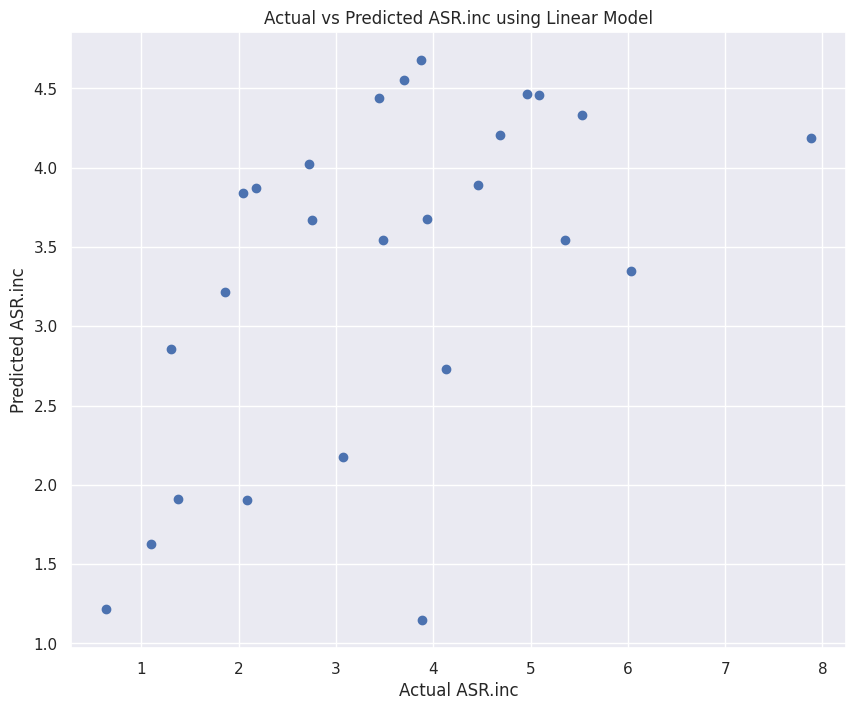

In [ ]:
plt.scatter(y1_test, y1_pred_lm)
plt.xlabel('Actual ASR.inc')
plt.ylabel('Predicted ASR.inc')
plt.title('Actual vs Predicted ASR.inc using Linear Model')
plt.show()

In [ ]:
#ASR.Mort (train)
y2_tpred_lm = lm_model2.predict(x2_train)
y2_tpred_lm

17     0.451645
88     0.153730
126    1.331726
152    0.517978
101   -0.206341
         ...   
113    1.423089
33     1.479529
178    0.654116
102    0.945871
108    0.370036
Length: 105, dtype: float64

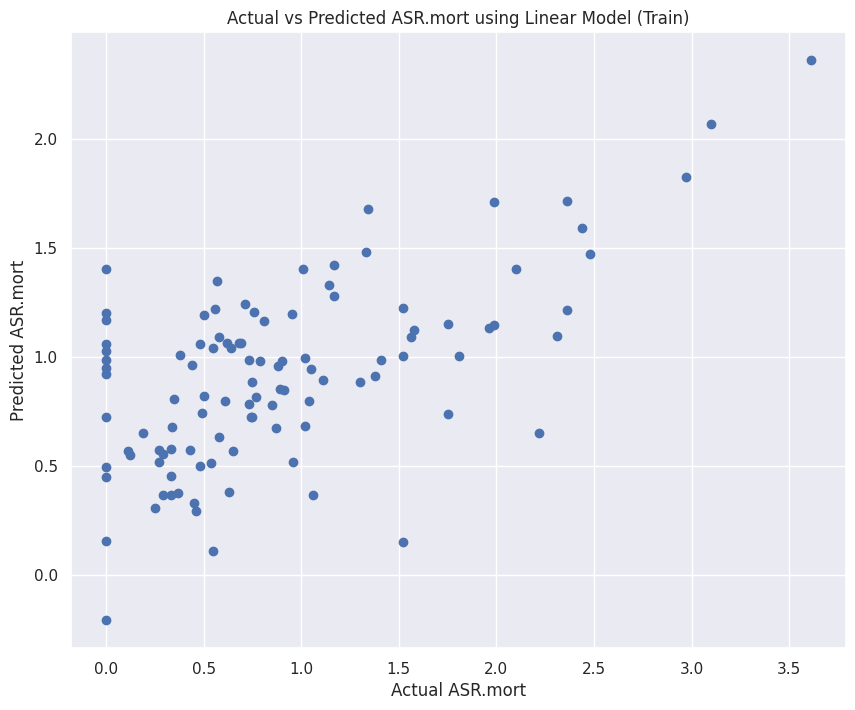

In [ ]:
plt.scatter(y2_train, y2_tpred_lm)
plt.xlabel('Actual ASR.mort')
plt.ylabel('Predicted ASR.mort')
plt.title('Actual vs Predicted ASR.mort using Linear Model (Train)')
plt.show()

In [ ]:
#ASR.Mort
y2_pred_lm = lm_model2.predict(x2_test)
y2_pred_lm

18     1.071583
21     1.135060
34     0.891494
39     1.531173
53     0.338058
56     1.193078
58     1.168709
67     0.594931
69     0.613005
85     0.820255
92     0.991757
94     1.205861
100    1.008270
114    0.590572
116    0.875638
120    1.130022
121    1.884688
147    2.065956
148    0.166582
161    1.236929
164    1.405502
166    0.469548
171    0.483992
177    0.970548
182    1.063895
183    0.661588
dtype: float64

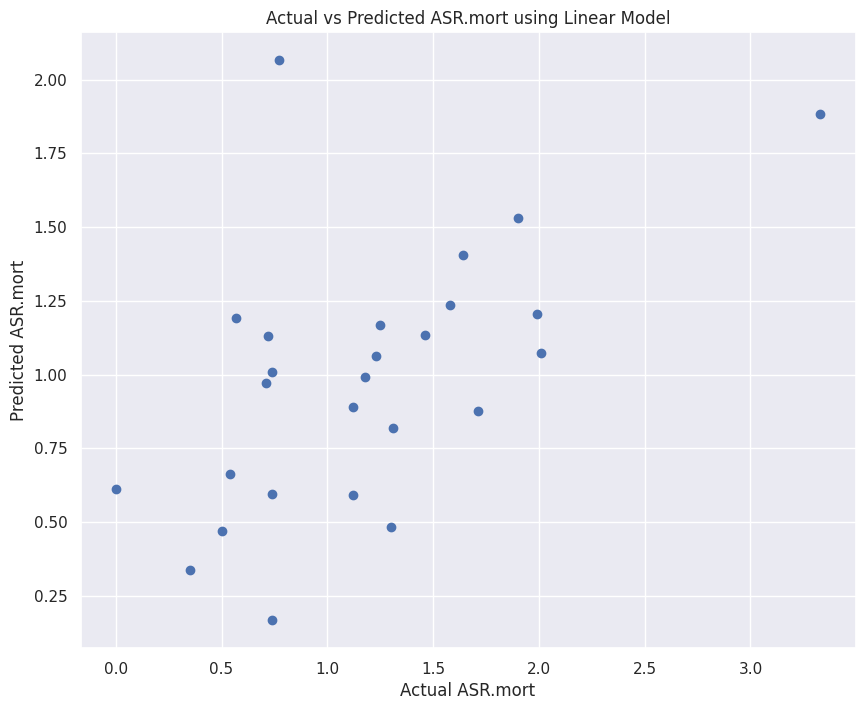

In [ ]:
plt.scatter(y2_test, y2_pred_lm)
plt.xlabel('Actual ASR.mort')
plt.ylabel('Predicted ASR.mort')
plt.title('Actual vs Predicted ASR.mort using Linear Model')
plt.show()

***Generalized Linear Model***

In [ ]:
#ASR.inc (train)
y1_tpred_glm= gl_model1.predict(x1_train)
y1_tpred_glm

17     3.352802
88     3.717148
126    4.170098
152    4.050607
101    3.646200
         ...   
113    3.899797
33     4.768124
178    3.695175
102    0.640501
108    2.296192
Length: 105, dtype: float64

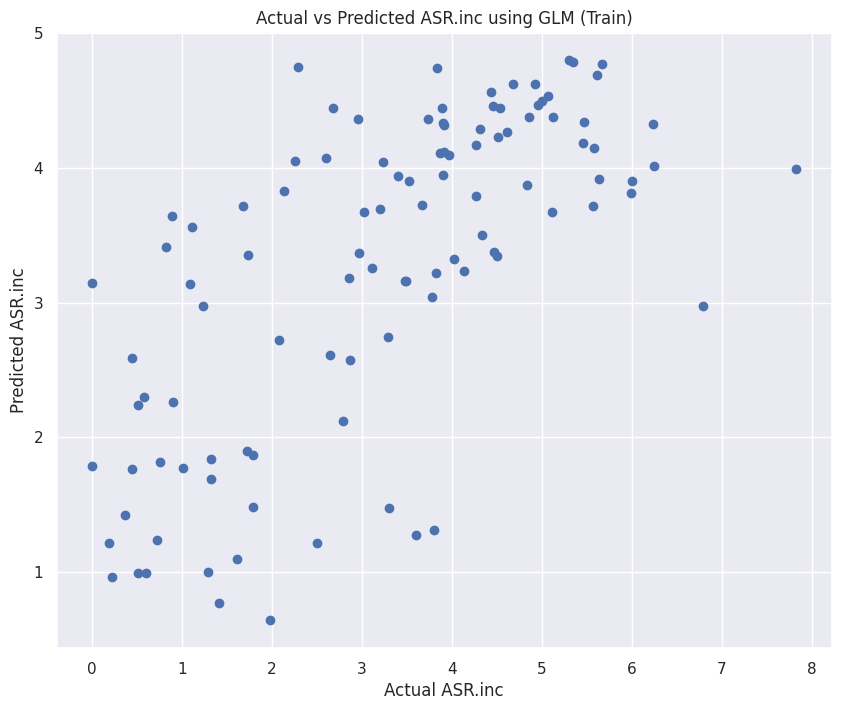

In [ ]:
plt.scatter(y1_train, y1_tpred_glm)
plt.xlabel('Actual ASR.inc')
plt.ylabel('Predicted ASR.inc')
plt.title('Actual vs Predicted ASR.inc using GLM (Train)')
plt.show()

In [ ]:
#ASR.inc
y1_pred_glm= gl_model1.predict(x1_test)
y1_pred_glm

18     3.676898
21     4.551477
34     3.546587
39     4.460986
53     2.859829
56     4.329390
58     2.730880
67     1.909225
69     3.216991
85     3.841152
92     4.439424
94     1.146420
100    4.206744
114    3.670096
116    2.175086
120    4.465492
121    3.348741
147    4.188447
148    4.024390
161    3.545119
164    3.891941
166    1.215509
171    3.870698
177    4.677796
182    1.903861
183    1.628468
dtype: float64

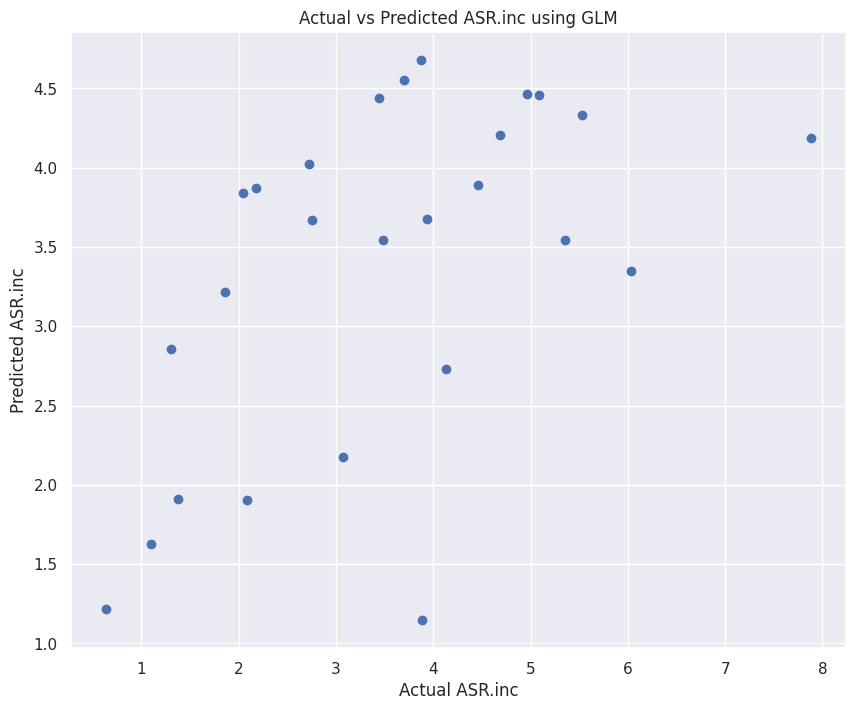

In [ ]:
plt.scatter(y1_test, y1_pred_glm)
plt.xlabel('Actual ASR.inc')
plt.ylabel('Predicted ASR.inc')
plt.title('Actual vs Predicted ASR.inc using GLM')
plt.show()

In [ ]:
#ASR.mort (train)
y2_tpred_glm= gl_model2.predict(x2_train)
y2_tpred_glm

17     0.451645
88     0.153730
126    1.331726
152    0.517978
101   -0.206341
         ...   
113    1.423089
33     1.479529
178    0.654116
102    0.945871
108    0.370036
Length: 105, dtype: float64

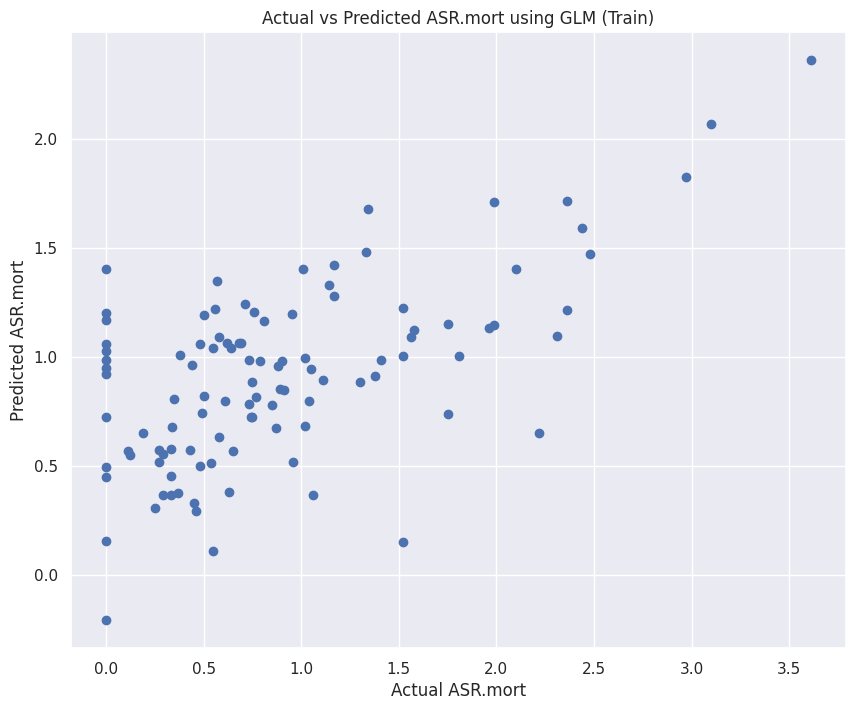

In [ ]:
plt.scatter(y2_train, y2_tpred_glm)
plt.xlabel('Actual ASR.mort')
plt.ylabel('Predicted ASR.mort')
plt.title('Actual vs Predicted ASR.mort using GLM (Train)')
plt.show()

In [ ]:
#ASR.mort
y2_pred_glm= gl_model2.predict(x2_test)
y2_pred_glm

18     1.071583
21     1.135060
34     0.891494
39     1.531173
53     0.338058
56     1.193078
58     1.168709
67     0.594931
69     0.613005
85     0.820255
92     0.991757
94     1.205861
100    1.008270
114    0.590572
116    0.875638
120    1.130022
121    1.884688
147    2.065956
148    0.166582
161    1.236929
164    1.405502
166    0.469548
171    0.483992
177    0.970548
182    1.063895
183    0.661588
dtype: float64

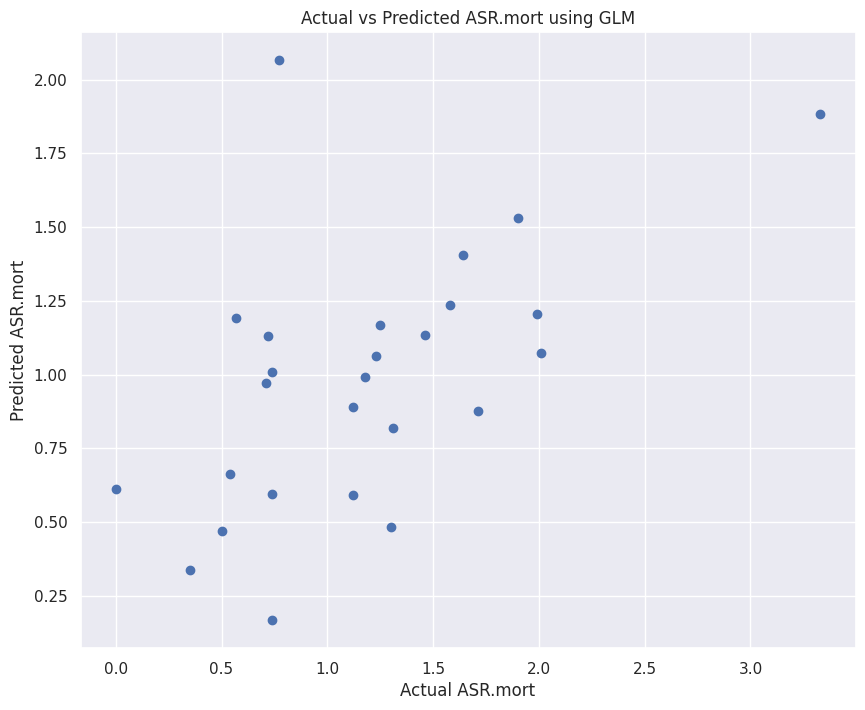

In [ ]:
plt.scatter(y2_test, y2_pred_glm)
plt.xlabel('Actual ASR.mort')
plt.ylabel('Predicted ASR.mort')
plt.title('Actual vs Predicted ASR.mort using GLM')
plt.show()

***Regression Tree***

In [ ]:
#ASR.inc (train)
y1_tpred_rt= best_rt_model1.predict(x1_train)
y1_tpred_rt

array([3.2  , 3.2  , 3.91 , 3.2  , 3.91 , 1.33 , 3.2  , 4.945, 3.91 ,
       3.91 , 3.91 , 0.72 , 4.945, 3.91 , 1.33 , 0.72 , 0.72 , 3.91 ,
       4.945, 4.945, 4.945, 4.945, 1.33 , 3.91 , 4.945, 3.2  , 0.72 ,
       3.91 , 4.945, 1.33 , 3.2  , 3.91 , 3.2  , 1.33 , 4.945, 4.945,
       1.33 , 4.945, 0.72 , 1.33 , 4.945, 3.2  , 3.2  , 3.91 , 3.2  ,
       0.72 , 3.2  , 3.2  , 3.2  , 3.2  , 0.72 , 4.945, 4.945, 1.33 ,
       3.2  , 4.945, 1.33 , 3.91 , 1.33 , 3.2  , 3.2  , 1.33 , 3.91 ,
       3.91 , 3.91 , 3.91 , 3.2  , 3.91 , 0.72 , 3.2  , 4.945, 3.2  ,
       1.33 , 0.72 , 3.2  , 1.33 , 4.945, 3.91 , 0.72 , 3.91 , 1.33 ,
       3.2  , 3.2  , 3.91 , 4.945, 4.945, 3.91 , 3.91 , 4.945, 1.33 ,
       3.2  , 0.72 , 4.945, 0.72 , 4.945, 0.72 , 3.91 , 1.33 , 3.91 ,
       0.72 , 4.945, 4.945, 3.2  , 0.72 , 1.33 ])

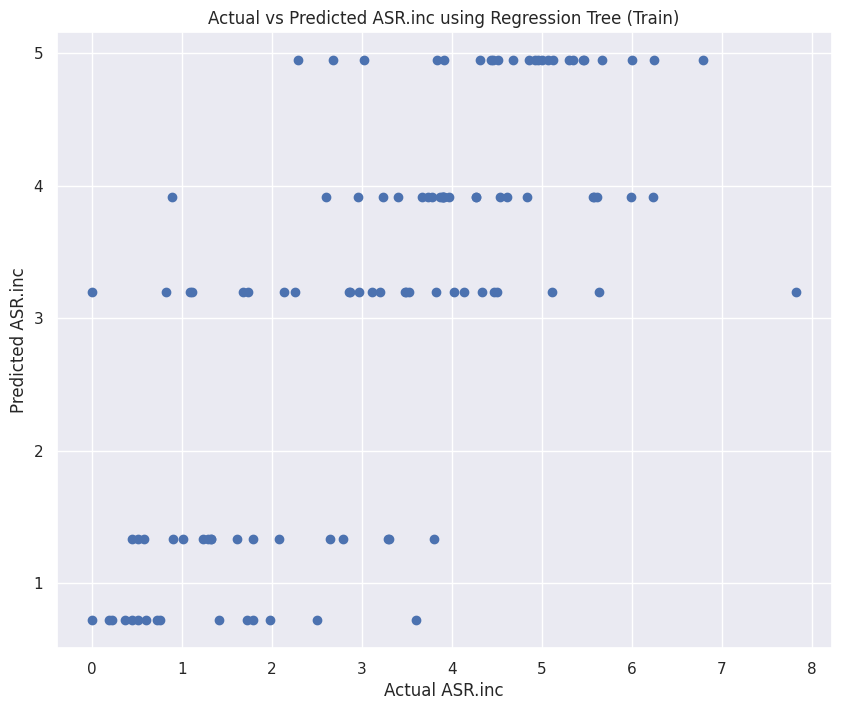

In [ ]:
plt.scatter(y1_train, y1_tpred_rt)
plt.xlabel('Actual ASR.inc')
plt.ylabel('Predicted ASR.inc')
plt.title('Actual vs Predicted ASR.inc using Regression Tree (Train)')
plt.show()

In [ ]:
#ASR.inc
y1_pred_rt= best_rt_model1.predict(x1_test)
y1_pred_rt

array([3.2  , 4.945, 3.2  , 3.91 , 3.2  , 4.945, 3.2  , 1.33 , 3.2  ,
       3.2  , 3.91 , 0.72 , 3.91 , 3.91 , 0.72 , 4.945, 4.945, 3.91 ,
       3.91 , 3.91 , 3.2  , 1.33 , 3.91 , 4.945, 3.2  , 0.72 ])

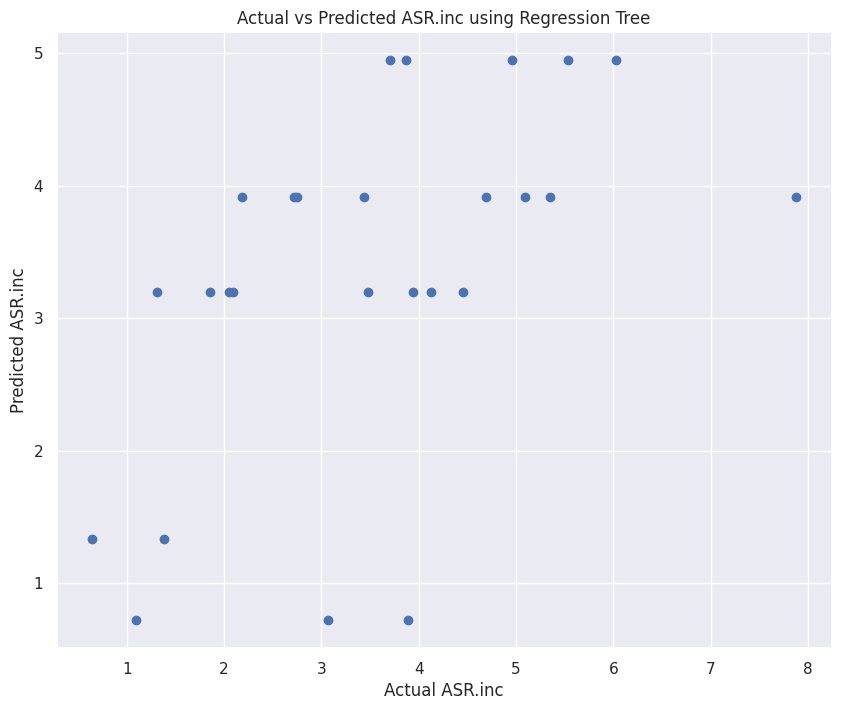

In [ ]:
plt.scatter(y1_test, y1_pred_rt)
plt.xlabel('Actual ASR.inc')
plt.ylabel('Predicted ASR.inc')
plt.title('Actual vs Predicted ASR.inc using Regression Tree')
plt.show()

In [ ]:
#ASR.mort (train)
y2_tpred_rt= best_rt_model2.predict(x2_train)
y2_tpred_rt

array([0.615     , 1.        , 1.24571429, 0.615     , 0.275     ,
       0.615     , 0.78      , 2.235     , 1.24571429, 0.52833333,
       1.24571429, 0.615     , 1.82666667, 1.82666667, 0.27      ,
       0.185     , 1.396     , 0.51      , 1.33666667, 0.52833333,
       0.995     , 1.24571429, 0.27      , 0.79      , 2.135     ,
       0.19      , 0.95      , 0.67      , 0.78      , 0.79      ,
       0.51      , 0.86333333, 0.915     , 1.396     , 0.79      ,
       0.275     , 0.27      , 0.88      , 1.396     , 0.79      ,
       0.52833333, 0.305     , 0.79      , 1.33666667, 0.915     ,
       0.185     , 1.78333333, 0.27      , 0.915     , 1.        ,
       0.305     , 0.67      , 0.52833333, 1.396     , 0.305     ,
       0.79      , 0.27      , 1.24571429, 0.7325    , 0.27      ,
       0.19      , 0.95      , 1.06666667, 0.8       , 0.8       ,
       0.79      , 0.78      , 0.995     , 0.27      , 0.915     ,
       0.51      , 1.78333333, 0.7325    , 0.27      , 0.88   

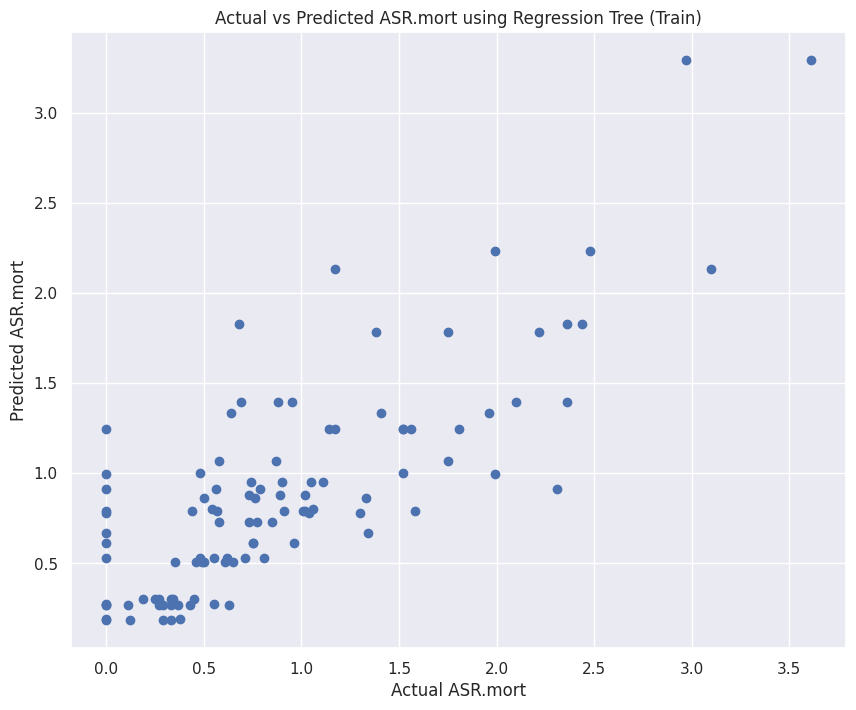

In [ ]:
plt.scatter(y2_train, y2_tpred_rt)
plt.xlabel('Actual ASR.mort')
plt.ylabel('Predicted ASR.mort')
plt.title('Actual vs Predicted ASR.mort using Regression Tree (Train)')
plt.show()

In [ ]:
#ASR.mort
y2_pred_rt= best_rt_model2.predict(x2_test)
y2_pred_rt

array([1.33666667, 1.24571429, 1.78333333, 2.235     , 0.27      ,
       0.52833333, 0.915     , 0.7325    , 0.27      , 0.95      ,
       1.06666667, 1.396     , 0.52833333, 1.06666667, 0.79      ,
       0.52833333, 2.135     , 0.67      , 0.8       , 2.235     ,
       2.235     , 0.27      , 0.27      , 1.24571429, 0.95      ,
       0.27      ])

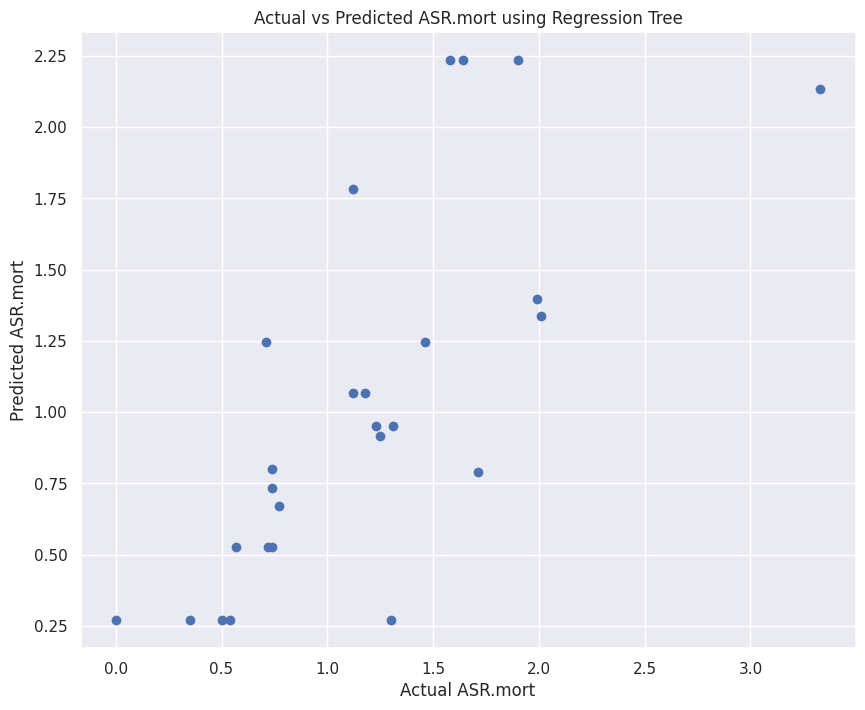

In [ ]:
plt.scatter(y2_test, y2_pred_rt)
plt.xlabel('Actual ASR.mort')
plt.ylabel('Predicted ASR.mort')
plt.title('Actual vs Predicted ASR.mort using Regression Tree')
plt.show()

***Random Forest***

In [ ]:
#ASR.inc (train)
y1_tpred_rf= best_rf_model1.predict(x1_train)
y1_tpred_rf

array([2.5007281 , 3.22363134, 4.32888731, 3.55905327, 3.48162668,
       1.47353658, 3.49811267, 4.40687052, 4.22228273, 4.4991136 ,
       4.23841834, 1.38087087, 4.96396531, 4.37289259, 2.28318771,
       1.011877  , 1.80241767, 3.84762034, 4.52423023, 4.17742921,
       4.4773166 , 4.5499837 , 1.79842828, 4.05930345, 3.45791757,
       2.7368176 , 1.70871431, 4.82745156, 3.99030888, 1.76291987,
       3.6866044 , 4.3492811 , 3.60230289, 2.00213667, 4.44637135,
       3.90077698, 1.77305439, 4.67700978, 1.6754689 , 2.38679271,
       4.67936571, 2.75326005, 3.11971008, 3.6555446 , 3.39253853,
       1.29842725, 3.08000725, 2.86716783, 3.00232175, 3.76913702,
       1.14832023, 4.52923946, 4.83452818, 2.32104438, 2.45440534,
       4.66375588, 1.38757306, 4.72830032, 2.163002  , 2.7368176 ,
       2.7368176 , 1.51703179, 4.00577689, 3.96742564, 3.78063629,
       4.31128197, 3.02140485, 4.43430283, 1.3119045 , 3.69039892,
       4.29473571, 2.3069574 , 1.02624067, 1.35870805, 3.89052

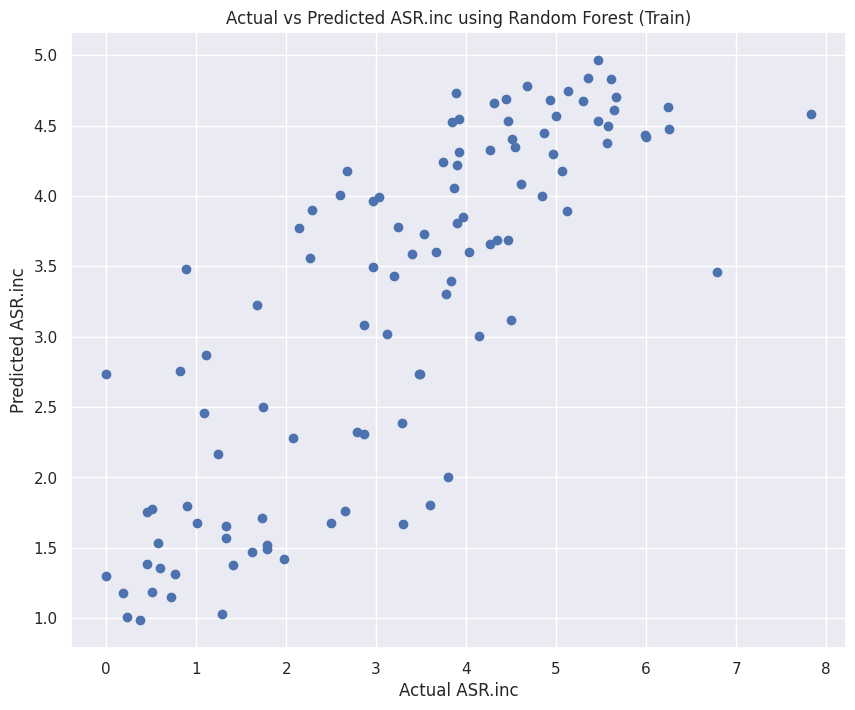

In [ ]:
plt.scatter(y1_train, y1_tpred_rf)
plt.xlabel('Actual ASR.inc')
plt.ylabel('Predicted ASR.inc')
plt.title('Actual vs Predicted ASR.inc using Random Forest (Train)')
plt.show()

In [ ]:
#ASR.inc
y1_pred_rf= best_rf_model1.predict(x1_test)
y1_pred_rf

array([3.05659522, 4.49679452, 3.64475818, 4.29441543, 2.69770109,
       4.68289061, 2.70666684, 1.74058434, 2.85836482, 3.88724337,
       4.09170216, 1.51438394, 3.87784   , 3.49214166, 1.75679385,
       4.49807766, 3.62000454, 3.62941877, 4.32756698, 3.77802714,
       3.87072837, 1.89673242, 3.6845084 , 4.56552222, 2.13817267,
       1.43483787])

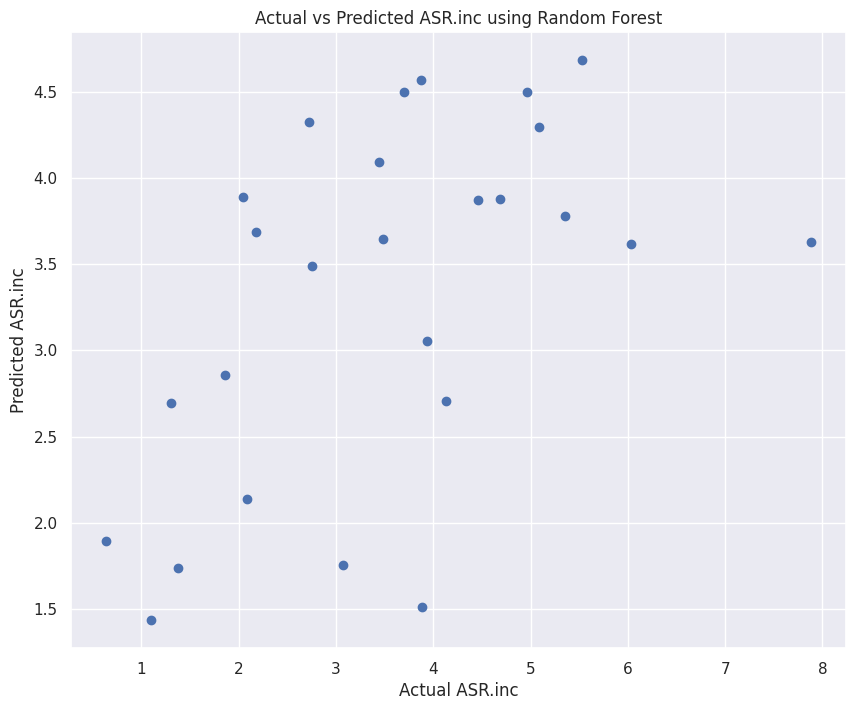

In [ ]:
plt.scatter(y1_test, y1_pred_rf)
plt.xlabel('Actual ASR.inc')
plt.ylabel('Predicted ASR.inc')
plt.title('Actual vs Predicted ASR.inc using Random Forest')
plt.show()

In [ ]:
#ASR.mort (Train)
y2_tpred_rf= best_rf_model2.predict(x2_train)
y2_tpred_rf

array([0.63563511, 0.91928601, 1.11387902, 0.82935367, 0.33231327,
       0.76237226, 0.75638104, 1.75209068, 1.30008522, 1.04754761,
       1.57447911, 0.72211789, 2.1282025 , 1.87549102, 0.53308668,
       0.23792062, 1.03844145, 0.58006397, 1.3539568 , 0.65633601,
       1.00614845, 0.58508558, 0.28531433, 0.72691736, 2.23156292,
       0.69954355, 0.73875004, 1.50228486, 0.96472239, 1.2279979 ,
       0.77185077, 0.74106984, 0.85930374, 1.20994145, 1.11890466,
       0.64164453, 0.29736735, 0.79944455, 0.91733599, 0.63034501,
       0.56972826, 0.39172852, 0.92139073, 1.18563641, 1.09927678,
       0.22095699, 1.19244705, 0.71211398, 0.85012926, 0.79465151,
       0.47883161, 0.75902577, 0.6115473 , 1.24992448, 0.62107741,
       0.54364735, 0.31635579, 1.22051325, 0.60957055, 0.2331153 ,
       0.69041575, 0.83571813, 1.03854684, 0.81727492, 0.79834795,
       1.03731209, 0.66321256, 1.53277301, 0.36007726, 0.8253512 ,
       0.47904126, 0.93837672, 0.71975476, 0.35444679, 0.96044

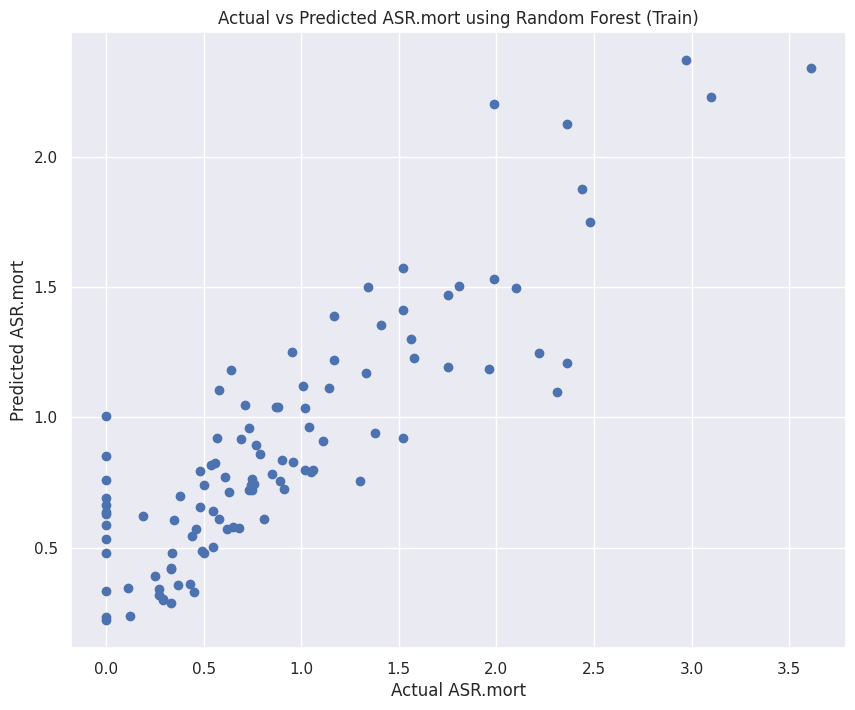

In [ ]:
plt.scatter(y2_train, y2_tpred_rf)
plt.xlabel('Actual ASR.mort')
plt.ylabel('Predicted ASR.mort')
plt.title('Actual vs Predicted ASR.mort using Random Forest (Train)')
plt.show()

In [ ]:
#ASR.mort
y2_pred_rf= best_rf_model2.predict(x2_test)
y2_pred_rf

array([1.11484311, 1.43928555, 1.03929901, 1.5263697 , 0.65313099,
       0.98195055, 0.85153876, 0.6859358 , 0.56573929, 1.07954475,
       0.79018801, 1.05056441, 0.52981316, 1.09772867, 0.77238815,
       0.64718117, 2.16731072, 1.54878652, 0.65688475, 1.17214376,
       1.27266968, 0.32850757, 0.91822638, 0.89522328, 1.22041331,
       0.45929571])

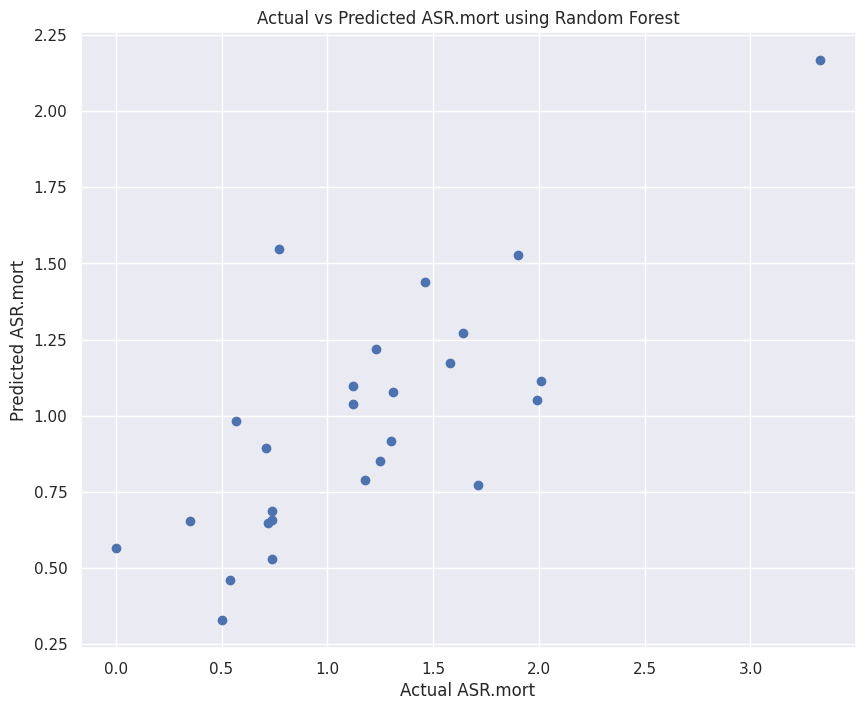

In [ ]:
plt.scatter(y2_test, y2_pred_rf)
plt.xlabel('Actual ASR.mort')
plt.ylabel('Predicted ASR.mort')
plt.title('Actual vs Predicted ASR.mort using Random Forest')
plt.show()

***XGBoost***

In [ ]:
#Asr.inc (Train)
y1_tpred_xgb = best_xgb_model1.predict(x1_train)
y1_tpred_xgb

array([2.6964962 , 3.5251687 , 4.252842  , 3.5343852 , 3.693679  ,
       1.3752745 , 3.7231255 , 4.313237  , 4.17689   , 4.1352663 ,
       4.252842  , 1.1146368 , 4.688145  , 4.2005086 , 2.0147111 ,
       0.6710051 , 1.7607296 , 4.1116476 , 4.635812  , 4.4416595 ,
       4.173845  , 4.1956615 , 1.8441778 , 4.068587  , 3.835854  ,
       3.2829754 , 1.655438  , 4.3180842 , 4.1348104 , 1.9617538 ,
       3.6578834 , 4.2005086 , 3.9209006 , 1.8441778 , 4.1348104 ,
       4.37498   , 1.8441778 , 4.612193  , 1.6888319 , 2.1086688 ,
       4.5705695 , 3.0714042 , 3.2829754 , 3.7603586 , 3.5525916 ,
       1.257485  , 3.2829754 , 3.1776836 , 3.2829754 , 3.6995068 ,
       1.6260489 , 4.1956615 , 4.635812  , 1.7501818 , 3.3482175 ,
       4.5705695 , 1.3752745 , 4.3180842 , 2.502348  , 2.559272  ,
       3.2829754 , 1.9617538 , 4.2005086 , 4.068587  , 4.0063562 ,
       4.2005086 , 3.216296  , 4.2005086 , 1.3570684 , 3.6578834 ,
       4.486522  , 2.402464  , 1.1521934 , 1.139909  , 3.65788

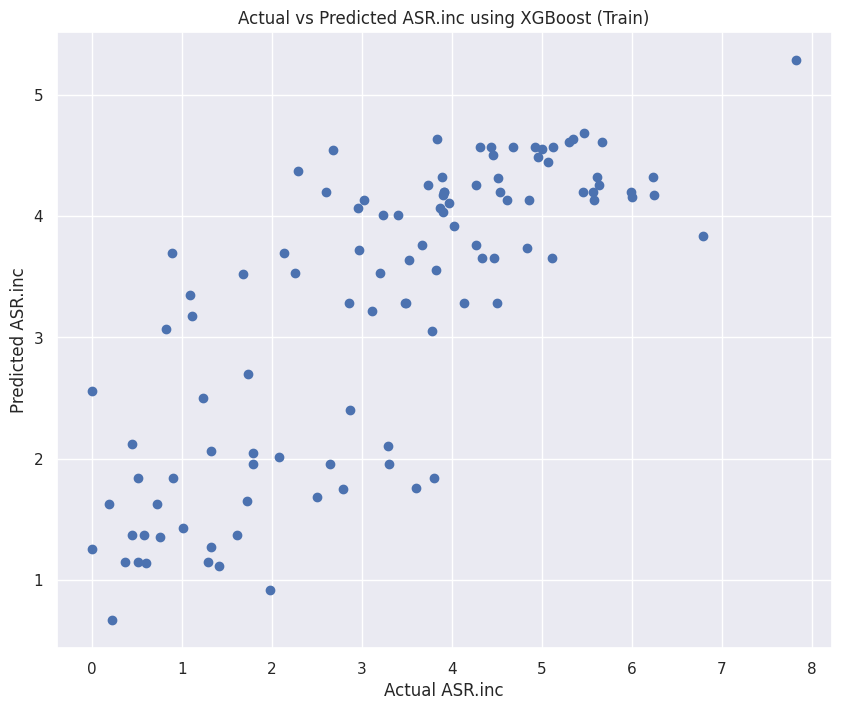

In [ ]:
plt.scatter(y1_train, y1_tpred_xgb)
plt.xlabel('Actual ASR.inc')
plt.ylabel('Predicted ASR.inc')
plt.title('Actual vs Predicted ASR.inc using XGBoost (Train)')
plt.show()

In [ ]:
#Asr.inc
y1_pred_xgb = best_xgb_model1.predict(x1_test)
y1_pred_xgb

array([3.3482175, 4.612193 , 3.6995068, 4.1352663, 3.3482175, 4.6154323,
       3.2829754, 1.3752745, 3.2829754, 3.7518406, 4.1102104, 1.0689584,
       4.1116476, 3.7603586, 1.655438 , 4.50389  , 3.9010963, 3.9396763,
       3.4115622, 3.8256006, 3.7231255, 1.7722802, 4.0063562, 4.612193 ,
       3.8879273, 1.8783056], dtype=float32)

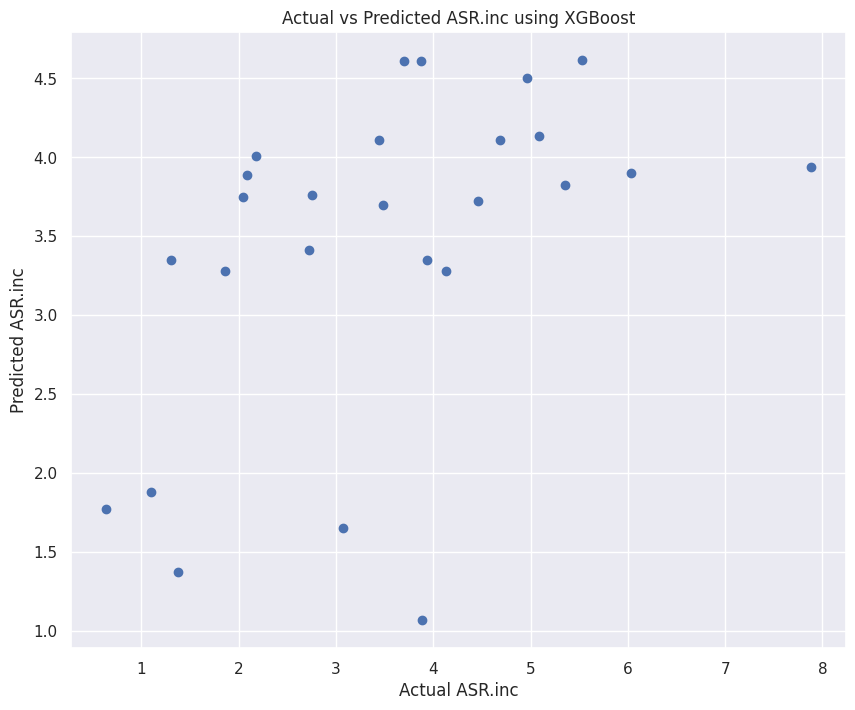

In [ ]:
plt.scatter(y1_test, y1_pred_xgb)
plt.xlabel('Actual ASR.inc')
plt.ylabel('Predicted ASR.inc')
plt.title('Actual vs Predicted ASR.inc using XGBoost')
plt.show()

In [ ]:
#Asr.mort (Train)
y2_tpred_xgb= best_xgb_model2.predict(x2_train)
y2_tpred_xgb

array([0.24503206, 1.3014946 , 1.111087  , 0.77732086, 0.28765324,
       0.6674668 , 0.57355136, 2.2690659 , 1.2589359 , 0.90874577,
       1.7313823 , 0.61352706, 2.696012  , 2.2384796 , 0.41840017,
       0.42371124, 1.2470514 , 0.46578065, 1.2303349 , 0.6581251 ,
       0.7142    , 0.6178261 , 0.28449714, 0.60427606, 2.3070831 ,
       0.5994161 , 0.51142836, 1.4821942 , 1.0989629 , 1.2571552 ,
       0.7813151 , 0.5553768 , 1.0563651 , 1.5587109 , 1.2979515 ,
       0.60364354, 0.3009045 , 0.9097725 , 0.90301263, 0.7836073 ,
       0.46788445, 0.48615673, 0.98941666, 1.4665655 , 1.1913046 ,
       0.32011136, 1.2944766 , 0.8774684 , 0.90696716, 0.9015214 ,
       0.50700265, 0.8224893 , 0.65974826, 1.3118057 , 0.47392425,
       0.4189563 , 0.4002305 , 1.2347883 , 0.64270073, 0.04385145,
       0.5806591 , 0.70062786, 0.89668006, 0.71482515, 0.70720005,
       1.2463043 , 0.4790449 , 1.6253442 , 0.37557968, 0.8283027 ,
       0.472317  , 0.7673286 , 0.6655525 , 0.4113026 , 1.17514

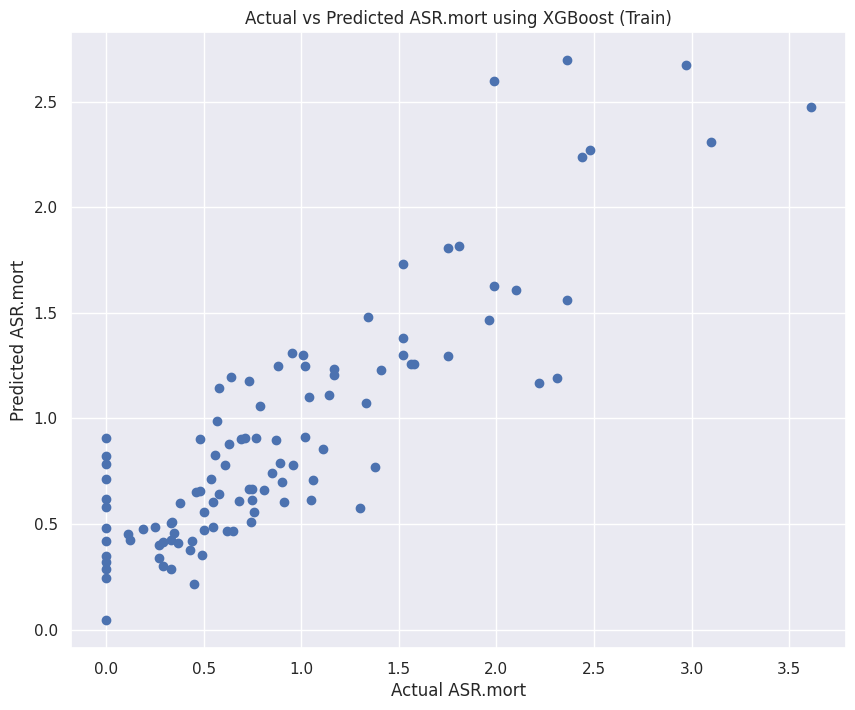

In [ ]:
plt.scatter(y2_train, y2_tpred_xgb)
plt.xlabel('Actual ASR.mort')
plt.ylabel('Predicted ASR.mort')
plt.title('Actual vs Predicted ASR.mort using XGBoost (Train)')
plt.show()

In [ ]:
#Asr.mort
y2_pred_xgb= best_xgb_model2.predict(x2_test)
y2_pred_xgb

array([1.0511662 , 1.4623982 , 1.188362  , 2.1459575 , 0.45839885,
       0.8436848 , 0.90696716, 0.6133666 , 0.30518818, 0.9536571 ,
       0.2602352 , 1.3459238 , 0.36191514, 1.1560735 , 0.7837143 ,
       0.73176944, 2.2702992 , 1.275393  , 0.65512335, 1.7774019 ,
       1.3815953 , 0.38088226, 0.99017924, 0.92503387, 1.0507483 ,
       0.5987458 ], dtype=float32)

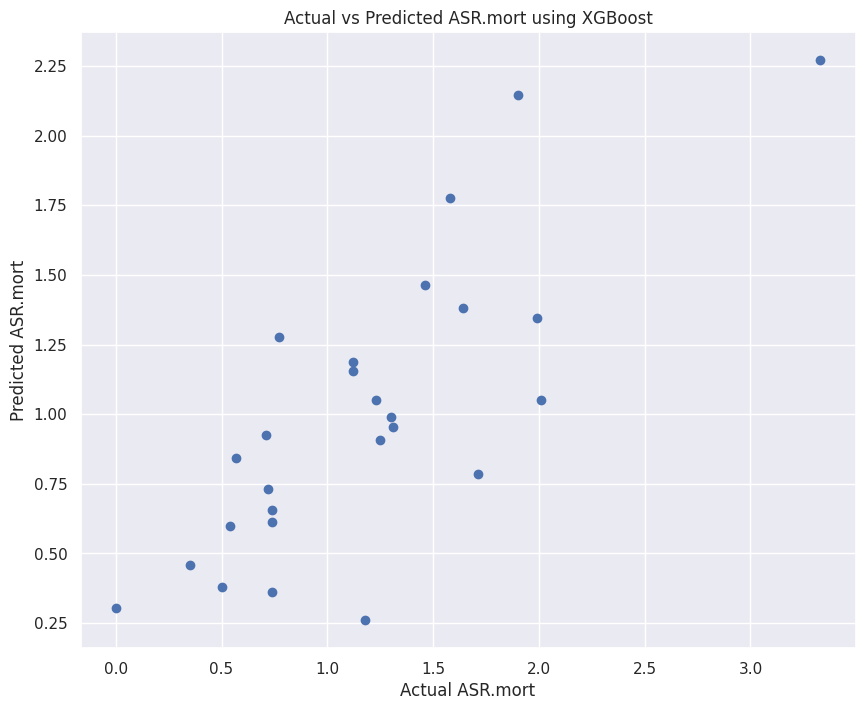

In [ ]:
plt.scatter(y2_test, y2_pred_xgb)
plt.xlabel('Actual ASR.mort')
plt.ylabel('Predicted ASR.mort')
plt.title('Actual vs Predicted ASR.mort using XGBoost')
plt.show()

**MODEL EVALUATION**

In [ ]:
#Using RMSE (Root Mean Square Error )
#Low RMSE values show that the model makes more accurate predictions and fits the data well.
from sklearn.metrics import mean_squared_error

***LM (Train)***

In [ ]:
#ASR.INC
t_rmse_inc_lm = np.sqrt(mean_squared_error(y1_train, y1_tpred_lm))
print(t_rmse_inc_lm)

1.317346357051196


In [ ]:
##using MAPE
t_mape_inc_lm = np.mean(np.abs((y1_train - y1_tpred_lm)/y1_train))*100
print(t_mape_inc_lm)

inf


In [ ]:
##using MAAPE
t_maape_inc_lm = np.mean(np.abs((y1_train - y1_tpred_lm) / ((y1_train + y1_tpred_lm) / 2))) * 100
print(t_maape_inc_lm)

42.371877404995196


In [ ]:
##using R-MAPE
t_rmape_inc_lm = np.mean(np.abs((y1_train - y1_tpred_lm) / np.maximum(y1_train, y1_tpred_lm))) * 100
print(t_rmape_inc_lm)

30.534549528124327


In [ ]:
##check R-square
from sklearn.metrics import r2_score
t_r2_inc_lm = r2_score(y1_train, y1_tpred_lm)
print(t_r2_inc_lm)

0.46226583385305653


In [ ]:
##check R-square
t_r2_inc_lm1 = np.corrcoef(y1_train, y1_tpred_lm)[0,1]**2
print(t_r2_inc_lm1)

0.4629064985349176


In [ ]:
#ASR.Mort
t_rmse_mort_lm = np.sqrt(mean_squared_error(y2_train, y2_tpred_lm))
print(t_rmse_mort_lm)

0.5926808436594225


In [ ]:
##using MAPE
t_mape_mort_lm = np.mean(np.abs((y2_train - y2_tpred_lm)/y2_train))*100
print(t_mape_mort_lm)

inf


In [ ]:
##using MAAPE
t_maape_mort_lm = np.mean(np.abs((y2_train - y2_tpred_lm) / ((y2_train + y2_tpred_lm) / 2))) * 100
print(t_maape_mort_lm)

62.92184429478082


In [ ]:
##using R-MAPE
t_rmape_mort_lm = np.mean(np.abs((y2_train - y2_tpred_lm) / np.maximum(y2_train, y2_tpred_lm))) * 100
print(t_rmape_mort_lm)

inf


In [ ]:
##check R-square
from sklearn.metrics import r2_score
t_r2_mort_lm = r2_score(y2_train, y2_tpred_lm)
print(t_r2_mort_lm)

0.3802177788885577


In [ ]:
##check R-square
t_r2_mort_lm1 = np.corrcoef(y2_train, y2_tpred_lm)[0,1]**2
print(t_r2_mort_lm1)

0.3852998866418261


***LM (Test)***

In [ ]:
#ASR.INC
rmse_inc_lm = np.sqrt(mean_squared_error(y1_test, y1_pred_lm))
print(rmse_inc_lm)

1.4308577105372449


In [ ]:
##using MAPE
mape_inc_lm = np.mean(np.abs((y1_test - y1_pred_lm)/y1_test))*100
print(mape_inc_lm)

39.61700130000937


In [ ]:
##using MAAPE
maape_inc_lm = np.mean(np.abs((y1_test - y1_pred_lm) / ((y1_test + y1_pred_lm) / 2))) * 100
print(maape_inc_lm)

36.272684339176905


In [ ]:
##using R-MAPE
rmape_inc_lm = np.mean(np.abs((y1_test - y1_pred_lm) / np.maximum(y1_test, y1_pred_lm))) * 100
print(rmape_inc_lm)

28.973851682893955


In [ ]:
##check R-square
from sklearn.metrics import r2_score
r2_inc_lm = r2_score(y1_test, y1_pred_lm)
print(r2_inc_lm)

0.2820634489178896


In [ ]:
##check R-square
r2_inc_lm1 = np.corrcoef(y1_test, y1_pred_lm)[0,1]**2
print(r2_inc_lm1)

0.297673763164521


In [ ]:
#ASR.Mort
rmse_mort_lm = np.sqrt(mean_squared_error(y2_test, y2_pred_lm))
print(rmse_mort_lm)

0.5922556315060574


In [ ]:
##using MAPE
mape_mort_lm = np.mean(np.abs((y2_test - y2_pred_lm)/y2_test))*100
print(mape_mort_lm)

inf


In [ ]:
##using MAAPE
maape_mort_lm = np.mean(np.abs((y2_test - y2_pred_lm) / ((y2_test + y2_pred_lm) / 2))) * 100
print(maape_mort_lm)

47.04588887464506


In [ ]:
##using R-MAPE
rmape_mort_lm = np.mean(np.abs((y2_test - y2_pred_lm) / np.maximum(y2_test, y2_pred_lm))) * 100
print(rmape_mort_lm)

34.208436812411236


In [ ]:
##check R-square
from sklearn.metrics import r2_score
r2_mort_lm = r2_score(y2_test, y2_pred_lm)
print(r2_mort_lm)

0.22504809480733456


In [ ]:
##check R-square
r2_mort_lm1 = np.corrcoef(y2_test, y2_pred_lm)[0,1]**2
print(r2_mort_lm1)

0.31235266999599554


***GLM (Train)***

In [ ]:
#ASR.inc
t_rmse_inc_glm = np.sqrt(mean_squared_error(y1_train, y1_tpred_glm))
print(t_rmse_inc_glm)

1.317346357051196


In [ ]:
##using MAPE
t_mape_inc_glm = np.mean(np.abs((y1_train - y1_tpred_glm)/y1_train))*100
print(t_mape_inc_glm)

inf


In [ ]:
##using MAAPE
t_maape_inc_glm = np.mean(np.abs((y1_train - y1_tpred_glm) / ((y1_train + y1_tpred_glm) / 2))) * 100
print(t_maape_inc_glm)

42.371877404995196


In [ ]:
##using R-MAPE
t_rmape_inc_glm = np.mean(np.abs((y1_train - y1_tpred_glm) / np.maximum(y1_train, y1_tpred_glm))) * 100
print(t_rmape_inc_glm)

30.534549528124327


In [ ]:
##check R-square
from sklearn.metrics import r2_score
t_r2_inc_glm = r2_score(y1_train, y1_tpred_glm)
print(t_r2_inc_glm)

0.46226583385305653


In [ ]:
##check R-square
t_r2_inc_glm1 = np.corrcoef(y1_train, y1_tpred_glm)[0,1]**2
print(t_r2_inc_glm1)

0.4629064985349176


In [ ]:
#ASR.mort
t_rmse_mort_glm = np.sqrt(mean_squared_error(y2_train, y2_tpred_glm))
print(t_rmse_mort_glm)

0.5926808436594225


In [ ]:
##using MAPE
t_mape_mort_glm = np.mean(np.abs((y2_train - y2_tpred_glm)/y2_train))*100
print(t_mape_mort_glm)

inf


In [ ]:
##using MAAPE
t_maape_mort_glm = np.mean(np.abs((y2_train - y2_tpred_glm) / ((y2_train + y2_tpred_glm) / 2))) * 100
print(t_maape_mort_glm)

62.92184429478082


In [ ]:
##using R-MAPE
t_rmape_mort_glm = np.mean(np.abs((y2_train - y2_tpred_glm) / np.maximum(y2_train, y2_tpred_glm))) * 100
print(t_rmape_mort_glm)

inf


In [ ]:
##check R-square
from sklearn.metrics import r2_score
t_r2_mort_glm = r2_score(y2_train, y2_tpred_glm)
print(t_r2_mort_glm)

0.3802177788885577


In [ ]:
##check R-square
t_r2_mort_glm1 = np.corrcoef(y2_train, y2_tpred_glm)[0,1]**2
print(t_r2_mort_glm1)

0.3852998866418261


***GLM (Test)***

In [ ]:
#ASR.inc
rmse_inc_glm = np.sqrt(mean_squared_error(y1_test, y1_pred_glm))
print(rmse_inc_glm)

1.4308577105372449


In [ ]:
##using MAPE
mape_inc_glm = np.mean(np.abs((y1_test - y1_pred_glm)/y1_test))*100
print(mape_inc_glm)

39.61700130000937


In [ ]:
##using MAAPE
maape_inc_glm = np.mean(np.abs((y1_test - y1_pred_glm) / ((y1_test + y1_pred_glm) / 2))) * 100
print(maape_inc_glm)

36.272684339176905


In [ ]:
##using R-MAPE
rmape_inc_glm = np.mean(np.abs((y1_test - y1_pred_glm) / np.maximum(y1_test, y1_pred_glm))) * 100
print(rmape_inc_glm)

28.973851682893955


In [ ]:
##check R-square
from sklearn.metrics import r2_score
r2_inc_glm = r2_score(y1_test, y1_pred_glm)
print(r2_inc_glm)

0.2820634489178896


In [ ]:
##check R-square
r2_inc_glm1 = np.corrcoef(y1_test, y1_pred_glm)[0,1]**2
print(r2_inc_glm1)

0.297673763164521


In [ ]:
#ASR.mort
rmse_mort_glm = np.sqrt(mean_squared_error(y2_test, y2_pred_glm))
print(rmse_mort_glm)

0.5922556315060574


In [ ]:
##using MAPE
mape_mort_glm = np.mean(np.abs((y2_test - y2_pred_glm)/y2_test))*100
print(mape_mort_glm)

inf


In [ ]:
##using MAAPE
maape_mort_glm = np.mean(np.abs((y2_test - y2_pred_glm) / ((y2_test + y2_pred_glm) / 2))) * 100
print(maape_mort_glm)

47.04588887464506


In [ ]:
##using R-MAPE
rmape_mort_glm = np.mean(np.abs((y2_test - y2_pred_glm) / np.maximum(y2_test, y2_pred_glm))) * 100
print(rmape_mort_glm)

34.208436812411236


In [ ]:
##check R-square
from sklearn.metrics import r2_score
r2_mort_glm = r2_score(y2_test, y2_pred_glm)
print(r2_mort_glm)

0.22504809480733456


In [ ]:
##check R-square
r2_mort_glm1 = np.corrcoef(y2_test, y2_pred_glm)[0,1]**2
print(r2_mort_glm1)

0.31235266999599554


***Regression Tree (Train)***

In [ ]:
#ASR.inc (Train)
t_rmse_inc_rt = np.sqrt(mean_squared_error(y1_train, y1_tpred_rt))
print(t_rmse_inc_rt)

1.2607344798058904


In [ ]:
##using MAPE
t_mape_inc_rt = np.mean(np.abs((y1_train - y1_tpred_rt)/y1_train))*100
print(t_mape_inc_rt)

inf


In [ ]:
##using MAAPE
t_maape_inc_rt = np.mean(np.abs((y1_train - y1_tpred_rt) / ((y1_train + y1_tpred_rt) / 2))) * 100
print(t_maape_inc_rt)

38.408819077827644


In [ ]:
##using R-MAPE
t_rmape_inc_rt = np.mean(np.abs((y1_train - y1_tpred_rt) / np.maximum(y1_train, y1_tpred_rt))) * 100
print(t_rmape_inc_rt)

27.977579944935073


In [ ]:
##check R-square
from sklearn.metrics import r2_score
t_r2_inc_rt = r2_score(y1_train, y1_tpred_rt)
print(t_r2_inc_rt)

0.5074901250287539


In [ ]:
##check R-square
t_r2_inc_rt1 = np.corrcoef(y1_train, y1_tpred_rt)[0,1]**2
print(t_r2_inc_rt1)

0.52559942922727


In [ ]:
#ASR.mort
t_rmse_mort_rt = np.sqrt(mean_squared_error(y2_train, y2_tpred_rt))
print(t_rmse_mort_rt)

0.45582612699349145


In [ ]:
##using MAPE
t_mape_mort_rt = np.mean(np.abs((y2_train - y2_tpred_rt)/y2_train))*100
print(t_mape_mort_rt)

inf


In [ ]:
##using MAAPE
t_maape_mort_rt = np.mean(np.abs((y2_train - y2_tpred_rt) / ((y2_train + y2_tpred_rt) / 2))) * 100
print(t_maape_mort_rt)

52.3050856372998


In [ ]:
##using R-MAPE
t_rmape_mort_rt = np.mean(np.abs((y2_train - y2_tpred_rt) / np.maximum(y2_train, y2_tpred_rt))) * 100
print(t_rmape_mort_rt)

34.808664989294705


In [ ]:
##check R-square
from sklearn.metrics import r2_score
t_r2_mort_rt = r2_score(y2_train, y2_tpred_rt)
print(t_r2_mort_rt)

0.6333972131903909


In [ ]:
##check R-square
t_r2_mort_rt1 = np.corrcoef(y2_train, y2_tpred_rt)[0,1]**2
print(t_r2_mort_rt1)

0.6333972131903907


***Regression Tree (Test)***

In [ ]:
#ASR.inc
rmse_inc_rt = np.sqrt(mean_squared_error(y1_test, y1_pred_rt))
print(rmse_inc_rt)

1.4836457824198832


In [ ]:
##using MAPE
mape_inc_rt = np.mean(np.abs((y1_test - y1_pred_rt)/y1_test))*100
print(mape_inc_rt)

42.057904240542854


In [ ]:
##using MAAPE
maape_inc_rt = np.mean(np.abs((y1_test - y1_pred_rt) / ((y1_test + y1_pred_rt) / 2))) * 100
print(maape_inc_rt)

40.559889208725885


In [ ]:
##using R-MAPE
rmape_inc_rt = np.mean(np.abs((y1_test - y1_pred_rt) / np.maximum(y1_test, y1_pred_rt))) * 100
print(rmape_inc_rt)

31.0198196379229


In [ ]:
##check R-square
from sklearn.metrics import r2_score
r2_inc_rt = r2_score(y1_test, y1_pred_rt)
print(r2_inc_rt)

0.22811318821690962


In [ ]:
##check R-square
r2_inc_rt1 = np.corrcoef(y1_test, y1_pred_rt)[0,1]**2
print(r2_inc_rt1)

0.2948488321732828


In [ ]:
#ASR.mort
rmse_mort_rt = np.sqrt(mean_squared_error(y2_test, y2_pred_rt))
print(rmse_mort_rt)

0.497983556688799


In [ ]:
##using MAPE
mape_mort_rt = np.mean(np.abs((y2_test - y2_pred_rt)/y2_test))*100
print(mape_mort_rt)

inf


In [ ]:
##using MAAPE
maape_mort_rt = np.mean(np.abs((y2_test - y2_pred_rt) / ((y2_test + y2_pred_rt) / 2))) * 100
print(maape_mort_rt)

41.210880006350834


In [ ]:
##using R-MAPE
rmape_mort_rt = np.mean(np.abs((y2_test - y2_pred_rt) / np.maximum(y2_test, y2_pred_rt))) * 100
print(rmape_mort_rt)

30.475560512272487


In [ ]:
##check R-square
from sklearn.metrics import r2_score
r2_mort_rt = r2_score(y2_test, y2_pred_rt)
print(r2_mort_rt)

0.45211885109712047


In [ ]:
##check R-square
r2_mort_rt1 = np.corrcoef(y2_test, y2_pred_rt)[0,1]**2
print(r2_mort_rt1)

0.5418145338703347


***Random Forest (Train)***

In [ ]:
#ASR.inc
t_rmse_inc_rf = np.sqrt(mean_squared_error(y1_train, y1_tpred_rf))
print(t_rmse_inc_rf)

1.0561103154001414


In [ ]:
##using MAPE
t_mape_inc_rf = np.mean(np.abs((y1_train - y1_tpred_rf)/y1_train))*100
print(t_mape_inc_rf)

inf


In [ ]:
##using MAAPE
t_maape_inc_rf = np.mean(np.abs((y1_train - y1_tpred_rf) / ((y1_train + y1_tpred_rf) / 2))) * 100
print(t_maape_inc_rf)

36.06523881819743


In [ ]:
##using R-MAPE
t_rmape_inc_rf = np.mean(np.abs((y1_train - y1_tpred_rf) / np.maximum(y1_train, y1_tpred_rf))) * 100
print(t_rmape_inc_rf)

26.841683794587933


In [ ]:
##check R-square
from sklearn.metrics import r2_score
t_r2_inc_rf = r2_score(y1_train, y1_tpred_rf)
print(t_r2_inc_rf)

0.6543900392158575


In [ ]:
##check R-square
t_r2_inc_rf1 = np.corrcoef(y1_train, y1_tpred_rf)[0,1]**2
print(t_r2_inc_rf1)

0.672023184973348


In [ ]:
#ASR.mort
t_rmse_mort_rf = np.sqrt(mean_squared_error(y2_train, y2_tpred_rf))
print(t_rmse_mort_rf)

0.41034844732308834


In [ ]:
##using MAPE
t_mape_mort_rf = np.mean(np.abs((y2_train - y2_tpred_rf)/y2_train))*100
print(t_mape_mort_rf)

inf


In [ ]:
##using MAAPE
t_maape_mort_rf = np.mean(np.abs((y2_train - y2_tpred_rf) / ((y2_train + y2_tpred_rf) / 2))) * 100
print(t_maape_mort_rf)

47.105331610755215


In [ ]:
##using R-MAPE
t_rmape_mort_rf = np.mean(np.abs((y2_train - y2_tpred_rf) / np.maximum(y2_train, y2_tpred_rf))) * 100
print(t_rmape_mort_rf)

30.96123267328145


In [ ]:
##check R-square
from sklearn.metrics import r2_score
t_r2_mort_rf = r2_score(y2_train, y2_tpred_rf)
print(t_r2_mort_rf)

0.7028998150410397


In [ ]:
##check R-square
t_r2_mort_rf1 = np.corrcoef(y2_train, y2_tpred_rf)[0,1]**2
print(t_r2_mort_rf1)

0.7646486769549988


***Random Forest (Test)***

In [ ]:
#ASR.inc
rmse_inc_rf = np.sqrt(mean_squared_error(y1_test, y1_pred_rf))
print(rmse_inc_rf)

1.443587364670293


In [ ]:
##using MAPE
mape_inc_rf = np.mean(np.abs((y1_test - y1_pred_rf)/y1_test))*100
print(mape_inc_rf)

41.44492208591802


In [ ]:
##using MAAPE
maape_inc_rf = np.mean(np.abs((y1_test - y1_pred_rf) / ((y1_test + y1_pred_rf) / 2))) * 100
print(maape_inc_rf)

36.415717858514945


In [ ]:
##using R-MAPE
rmape_inc_rf = np.mean(np.abs((y1_test - y1_pred_rf) / np.maximum(y1_test, y1_pred_rf))) * 100
print(rmape_inc_rf)

28.986149352017065


In [ ]:
##check R-square
from sklearn.metrics import r2_score
r2_inc_rf = r2_score(y1_test, y1_pred_rf)
print(r2_inc_rf)

0.26923235196319684


In [ ]:
##check R-square
r2_inc_rf1 = np.corrcoef(y1_test, y1_pred_rf)[0,1]**2
print(r2_inc_rf1)

0.28790585186796175


In [ ]:
#ASR.mort
rmse_mort_rf = np.sqrt(mean_squared_error(y2_test, y2_pred_rf))
print(rmse_mort_rf)

0.4879511369001707


In [ ]:
##using MAPE
mape_mort_rf = np.mean(np.abs((y2_test - y2_pred_rf)/y2_test))*100
print(mape_mort_rf)

inf


In [ ]:
##using MAAPE
maape_mort_rf = np.mean(np.abs((y2_test - y2_pred_rf) / ((y2_test + y2_pred_rf) / 2))) * 100
print(maape_mort_rf)

37.733117879941815


In [ ]:
##using R-MAPE
rmape_mort_rf = np.mean(np.abs((y2_test - y2_pred_rf) / np.maximum(y2_test, y2_pred_rf))) * 100
print(rmape_mort_rf)

28.394862029796254


In [ ]:
##check R-square
from sklearn.metrics import r2_score
r2_mort_rf = r2_score(y2_test, y2_pred_rf)
print(r2_mort_rf)

0.473971807415412


In [ ]:
##check R-square
r2_mort_rf1 = np.corrcoef(y2_test, y2_pred_rf)[0,1]**2
print(r2_mort_rf1)

0.5898264636224128


***XGBoost (Train)***

In [ ]:
#ASR.inc
t_rmse_inc_xgb = np.sqrt(mean_squared_error(y1_train, y1_tpred_xgb))
print(t_rmse_inc_xgb)

1.1327093297583612


In [ ]:
##using MAPE
t_mape_inc_xgb = np.mean(np.abs((y1_train - y1_tpred_xgb)/y1_train))*100
print(t_mape_inc_xgb)

inf


In [ ]:
##using MAAPE
t_maape_inc_xgb = np.mean(np.abs((y1_train - y1_tpred_xgb) / ((y1_train + y1_tpred_xgb) / 2))) * 100
print(t_maape_inc_xgb)

37.96983580684127


In [ ]:
##using R-MAPE
t_rmape_inc_xgb = np.mean(np.abs((y1_train - y1_tpred_xgb) / np.maximum(y1_train, y1_tpred_xgb))) * 100
print(t_rmape_inc_xgb)

28.009059725883397


In [ ]:
##check R-square
from sklearn.metrics import r2_score
t_r2_inc_xgb = r2_score(y1_train, y1_tpred_xgb)
print(t_r2_inc_xgb)

0.6024382103173715


In [ ]:
##check R-square
t_r2_inc_xgb1 = np.corrcoef(y1_train, y1_tpred_xgb)[0,1]**2
print(t_r2_inc_xgb1)

0.6153556121324973


In [ ]:
#ASR.mort
##using RMSE
t_rmse_mort_xgb = np.sqrt(mean_squared_error(y2_train, y2_tpred_xgb))
print(t_rmse_mort_xgb)

0.38141722057400035


In [ ]:
##using MAPE
t_mape_mort_xgb = np.mean(np.abs((y2_train - y2_tpred_xgb)/y2_train))*100
print(t_mape_mort_xgb)

inf


In [ ]:
##using MAAPE
t_maape_mort_xgb = np.mean(np.abs((y2_train - y2_tpred_xgb) / ((y2_train + y2_tpred_xgb) / 2))) * 100
print(t_maape_mort_xgb)

50.25344206971981


In [ ]:
##using R-MAPE
t_rmape_mort_xgb = np.mean(np.abs((y2_train - y2_tpred_xgb) / np.maximum(y2_train, y2_tpred_xgb))) * 100
print(t_rmape_mort_xgb)

33.304998022846725


In [ ]:
##check R-square
from sklearn.metrics import r2_score
t_r2_mort_xgb = r2_score(y2_train, y2_tpred_xgb)
print(t_r2_mort_xgb)

0.7433165148335146


In [ ]:
##check R-square
t_r2_mort_xgb1 = np.corrcoef(y2_train, y2_tpred_xgb)[0,1]**2
print(t_r2_mort_xgb1)

0.7579465024589755


***XGBoost (Test)***

In [ ]:
#ASR.inc
rmse_inc_xgb = np.sqrt(mean_squared_error(y1_test, y1_pred_xgb))
print(rmse_inc_xgb)

1.4826348970788445


In [ ]:
##using MAPE
mape_inc_xgb = np.mean(np.abs((y1_test - y1_pred_xgb)/y1_test))*100
print(mape_inc_xgb)

46.38425129128671


In [ ]:
##using MAAPE
maape_inc_xgb = np.mean(np.abs((y1_test - y1_pred_xgb) / ((y1_test + y1_pred_xgb) / 2))) * 100
print(maape_inc_xgb)

39.19756473184254


In [ ]:
##using R-MAPE
rmape_inc_xgb = np.mean(np.abs((y1_test - y1_pred_xgb) / np.maximum(y1_test, y1_pred_xgb))) * 100
print(rmape_inc_xgb)

30.523044754036327


In [ ]:
##check R-square
from sklearn.metrics import r2_score
r2_inc_xgb = r2_score(y1_test, y1_pred_xgb)
print(r2_inc_xgb)

0.22916468345435037


In [ ]:
##check R-square
r2_inc_xgb1 = np.corrcoef(y1_test, y1_pred_xgb)[0,1]**2
print(r2_inc_xgb1)

0.242284474269827


In [ ]:
#ASR.mort
##using RMSE
rmse_mort_xgb = np.sqrt(mean_squared_error(y2_test, y2_pred_xgb))
print(rmse_mort_xgb)

0.4545303858092401


In [ ]:
##using MAPE
mape_mort_xgb = np.mean(np.abs((y2_test - y2_pred_xgb)/y2_test))*100
print(mape_mort_xgb)

inf


In [ ]:
##using MAAPE
maape_mort_xgb = np.mean(np.abs((y2_test - y2_pred_xgb) / ((y2_test + y2_pred_xgb) / 2))) * 100
print(maape_mort_xgb)

37.58497221359003


In [ ]:
##using R-MAPE
rmape_mort_xgb = np.mean(np.abs((y2_test - y2_pred_xgb) / np.maximum(y2_test, y2_pred_xgb))) * 100
print(rmape_mort_xgb)

27.62673036563826


In [ ]:
##check R-square
from sklearn.metrics import r2_score
r2_mort_xgb = r2_score(y2_test, y2_pred_xgb)
print(r2_mort_xgb)

0.5435615777150256


In [ ]:
##check R-square
r2_mort_xgb1 = np.corrcoef(y2_test, y2_pred_xgb)[0,1]**2
print(r2_mort_xgb1)

0.6142221947166404




---


**SHAP (SHapley Additive exPlanations) VALUES**

In [ ]:
!pip install shap
import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 14.8 MB/s eta 0:00:00


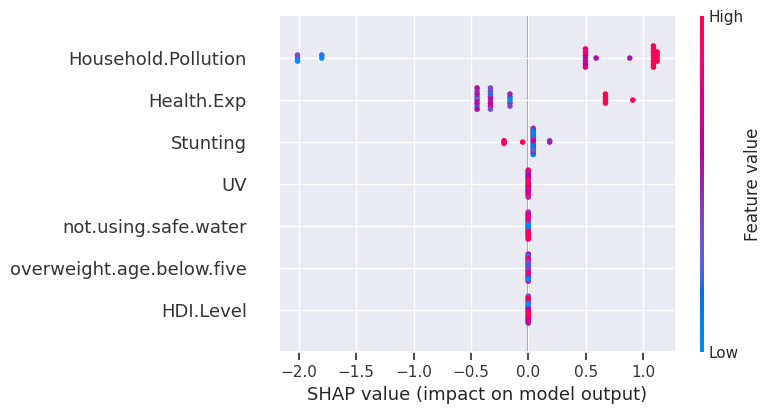

In [ ]:
#Regression Tree (ASR Inc)
explainer_inc_rt = shap.TreeExplainer(best_rt_model1)

#calculate shap values. This is what we will plot.
#Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values_inc_rt = explainer_inc_rt.shap_values(x1_test)

#make plot
shap.summary_plot(shap_values_inc_rt, x1_test)

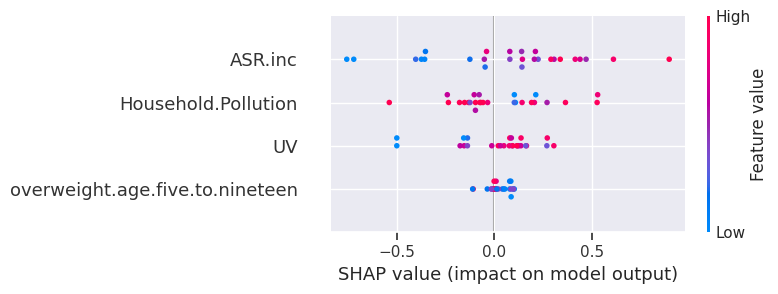

In [ ]:
#Regression Tree (ASR Mort)
explainer_mort_rt = shap.TreeExplainer(best_rt_model2)

#calculate shap values. This is what we will plot.
#Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values_mort_rt = explainer_mort_rt.shap_values(x2_test)

#make plot
shap.summary_plot(shap_values_mort_rt, x2_test)

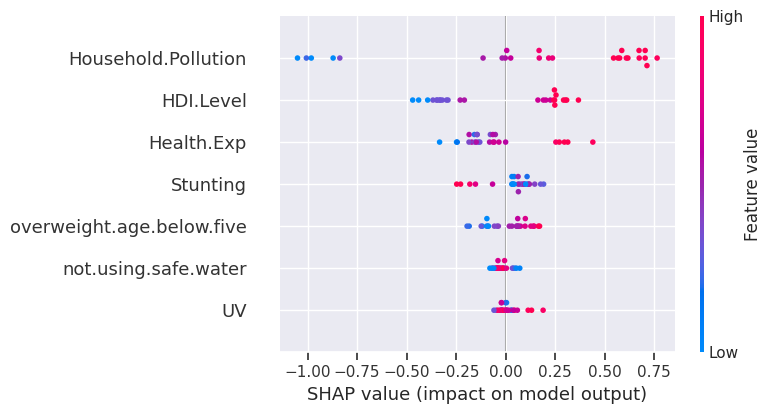

In [ ]:
#Random Forest (ASR Inc)
explainer_inc_rf = shap.TreeExplainer(best_rf_model1)

#calculate shap values. This is what we will plot.
#Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values_inc_rf = explainer_inc_rf.shap_values(x1_test)

#make plot
shap.summary_plot(shap_values_inc_rf, x1_test)

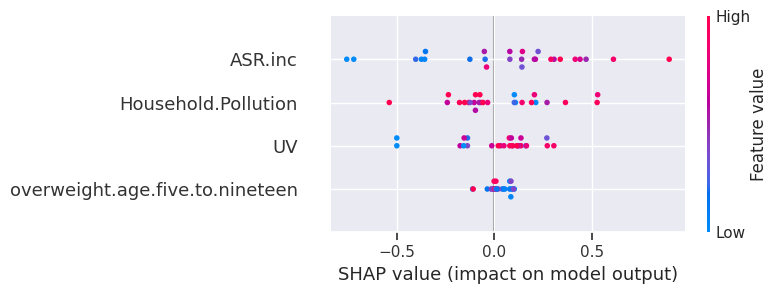

In [ ]:
#Random Forest (ASR Mort)
explainer_mort_rf = shap.TreeExplainer(best_rf_model2)

#calculate shap values. This is what we will plot.
#Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values_mort_rf = explainer_mort_rt.shap_values(x2_test)

#make plot
shap.summary_plot(shap_values_mort_rf, x2_test)

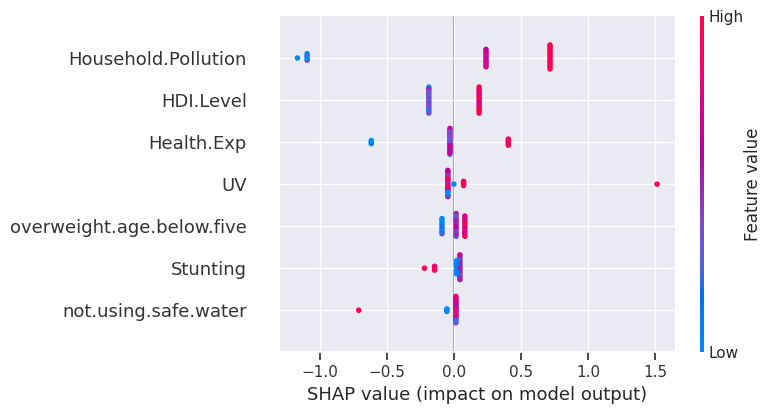

In [ ]:
#XGBoost
explainer = shap.TreeExplainer(best_xgb_model1)

#calculate shap values. This is what we will plot.
#Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values1 = explainer.shap_values(x1_test)

#make plot
shap.summary_plot(shap_values1, x1_test)

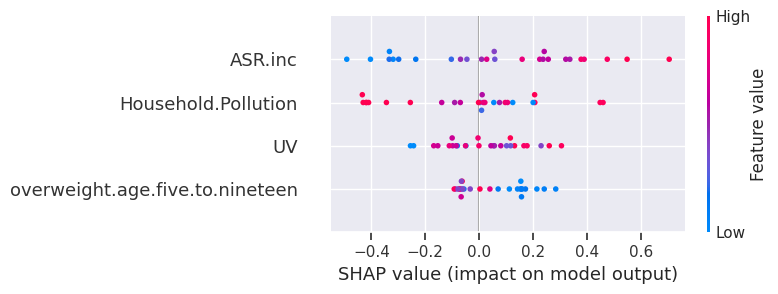

In [ ]:
explainer = shap.TreeExplainer(best_xgb_model2)

#calculate shap values. This is what we will plot.
#Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values2 = explainer.shap_values(x2_test)

#make plot
shap.summary_plot(shap_values2, x2_test)